<a href="https://colab.research.google.com/github/AnimalRacer3/CS370-Projects/blob/main/take_at_home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 1 (Take Home) - 40 points

## PS 1.A - 20 points

In [this video](https://www.youtube.com/watch?v=ho6JXE3EbZ8) the author explains how to extract various visualizations of what CNNs learn. [Your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/cnn/cnn-example-architectures/visualizing-what-convnets-learn.html) also covers the topic.

Using the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), train a ResNet-50 based CNN on the classification task of $K=9$ classes (filter out the class `ship`) and create the following visualizations for first, middle and last blocks of ResNet-50. You are free to select a class to showcase such visualizations.

* Visualizing intermediate convnet outputs (“intermediate activations”). This is useful to understand how successive convnet layers transform their input.

* Visualizing convnets filters. This is useful to understand precisely what visual pattern or concept each filter in a convnet is receptive to.

* Visualizing heatmaps of class activation in an image. This is useful to understand which part of an image where identified as belonging to a given class, and thus allows to localize objects in images.


In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
import numpy as np
import math
tf.compat.v1.disable_eager_execution()

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

def remove_outcome_type(class_to_exclude):
  global X_train, y_train, X_test, y_test

  excluded_class_index = np.where(y_train == class_to_exclude)[0]
  excluded_class_index_test = np.where(y_test == class_to_exclude)[0]

  indices_to_keep = np.where(y_train != class_to_exclude)[0]
  X_train = X_train[indices_to_keep]
  y_train = y_train[indices_to_keep]
  indices_to_keep_test = np.where(y_test != class_to_exclude)[0]
  X_test = X_test[indices_to_keep_test]
  y_test = y_test[indices_to_keep_test]

  y_train[y_train > class_to_exclude] -= 1
  y_test[y_test > class_to_exclude] -= 1

  return X_train, y_train, X_test, y_test, excluded_class_index, excluded_class_index_test

# 8 is ships
ship_class = 8
X_train_base = X_train
y_train_base = y_train
X_test_base = X_test
y_test_base = y_test
X_train, y_train, X_test, y_test, excluded_class_index, excluded_class_index_test = remove_outcome_type(ship_class)
'''
If you want more accurate results and have the available extra RAM I suggest using this uncommented code that
increases the size of the images and increases the accuracy of the AI by about 20%

target_size = (96, 96)

def resize_images(images, target_size):
  num_images, _, _, num_channels = images.shape
  resized_images = np.zeros((num_images, target_size[0], target_size[1], num_channels), dtype = np.uint8)

  for i in range(num_images):
    for channel in range(num_channels):
      resized_images[i, :, :, channel] = zoom(images[i, :, :, channel],
                                             (target_size[0]/images.shape[1], target_size[1] / images.shape[2]),
                                             order = 3)
  return resized_images

enlargens the images
X_train = resize_images(X_train, target_size)
X_test = resize_images(X_test, target_size)
'''
print(X_train.shape)
print(X_test.shape)

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

y_train_base = y_train_base.reshape(-1,)
y_test_base = y_test_base.reshape(-1,)

X_train = X_train / 255
X_test = X_test / 255

X_train_base = X_train_base / 255
X_test_base = X_test_base / 255

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "truck"]

def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(45000, 32, 32, 3)
(9000, 32, 32, 3)


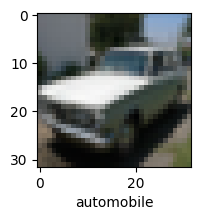

In [ ]:
# Shows the image I use for everything in PS 1.A
img_index = excluded_class_index[3]
plot_sample(X_train, y_train, img_index)

In [ ]:
# Shows an deer. if ships weren't removed this would be a ship
img_index_test = excluded_class_index_test[3]
plot_sample(X_test, y_test, img_index_test)

In [ ]:
epochs = 10

base_model = ResNet50(weights = 'imagenet', include_top=False)

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)

output = Dense(len(np.unique(y_train)), activation='softmax')(x)

model = Model(inputs = base_model.input, outputs = output)

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = epochs)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Instructions for updating:
Colocations handled automatically by placer.


Train on 45000 samples
Epoch 1/10
45000/45000 [==============================] - 187s 4ms/sample - loss: 1.4836 - accuracy: 0.4927
Epoch 2/10
45000/45000 [==============================] - 168s 4ms/sample - loss: 1.2680 - accuracy: 0.5506
Epoch 3/10
45000/45000 [==============================] - 167s 4ms/sample - loss: 1.2491 - accuracy: 0.5627
Epoch 4/10
45000/45000 [==============================] - 167s 4ms/sample - loss: 1.1313 - accuracy: 0.6136
Epoch 5/10
45000/45000 [==============================] - 166s 4ms/sample - loss: 0.9923 - accuracy: 0.6596
Epoch 6/10
45000/45000 [==============================] - 166s 4ms/sample - loss: 0.8820 - accuracy: 0.6987
Epoch 7/10
45000/45000 [==============================] - 165s 4ms/sample - loss: 0.7619 - accuracy: 0.7393
Epoch 8/10
45000/45000 [==============================] - 166s 4ms/sample - loss: 0.6876 - accuracy: 0.7691
Epoch 9/10
45000/45000 [==============================] - 165s 4ms/sample - loss: 0.6686 - accuracy: 0.7791
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test loss: 1.4672876799371508
Test accuracy: 0.5472222


53


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


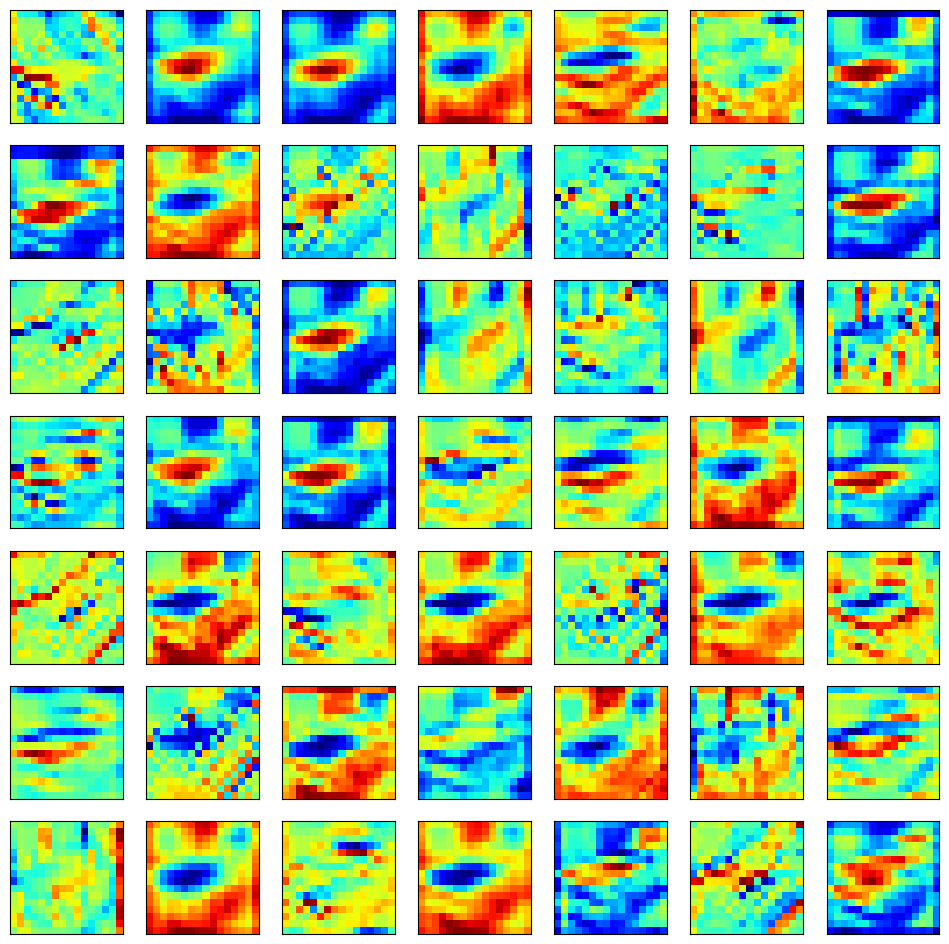

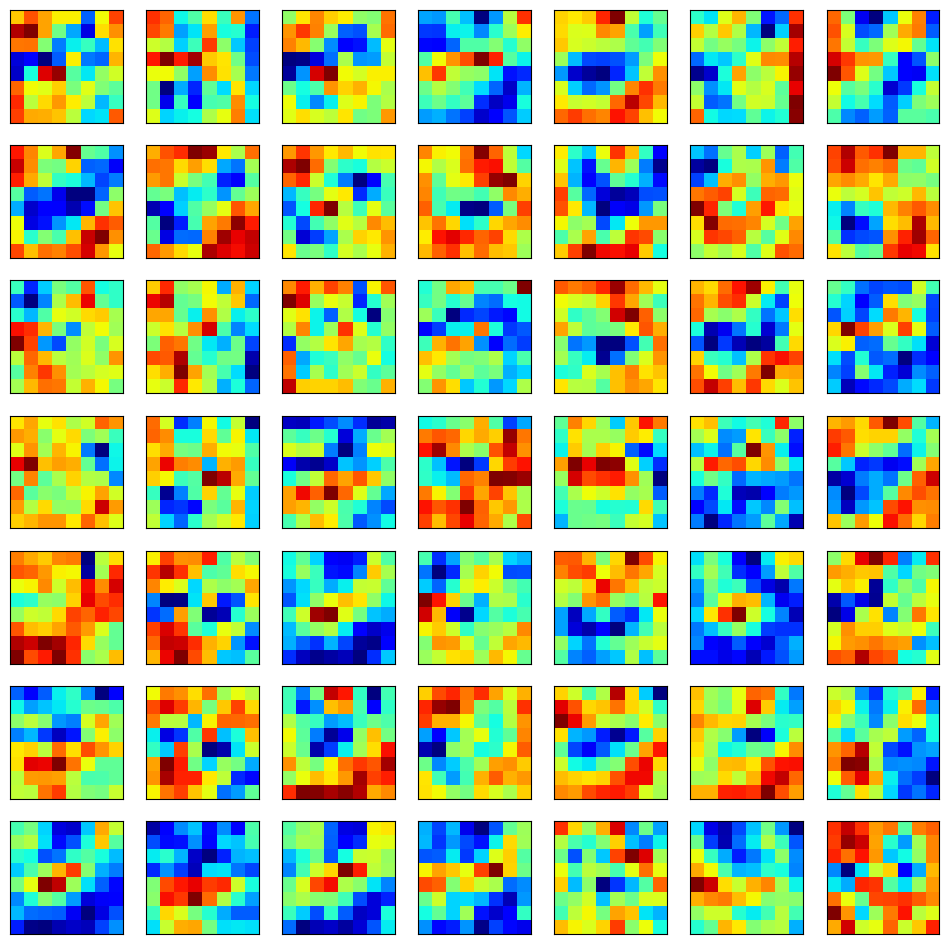

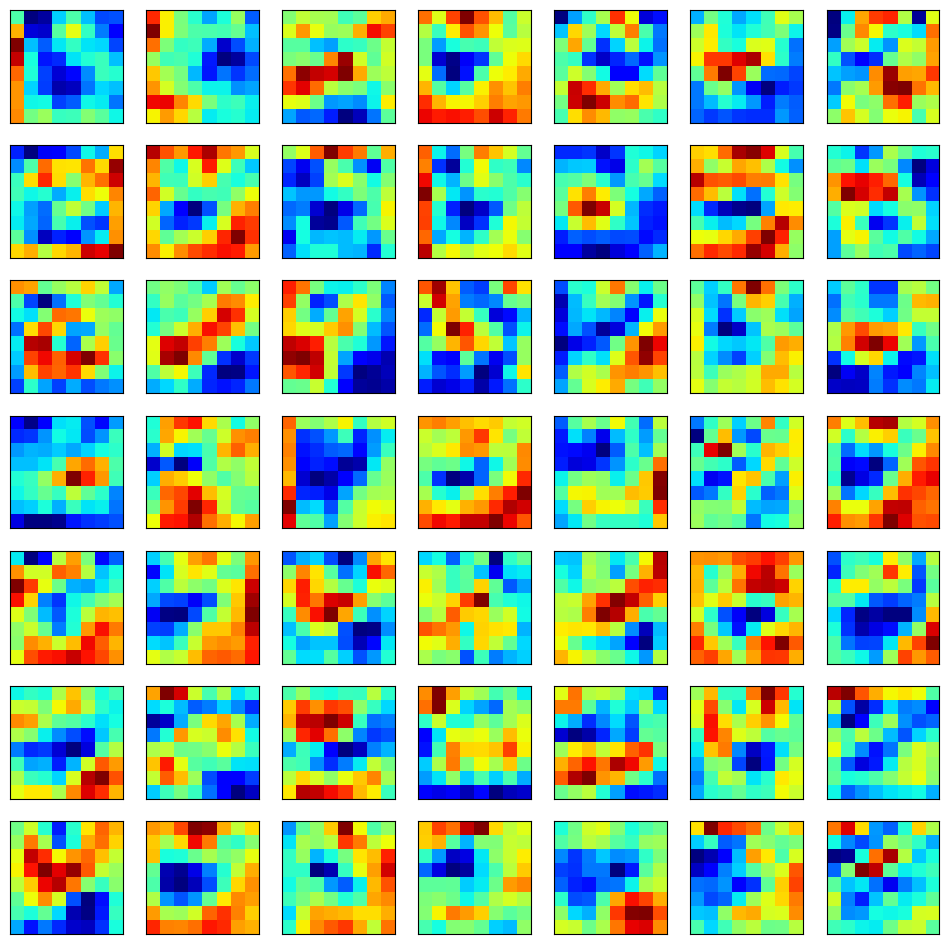

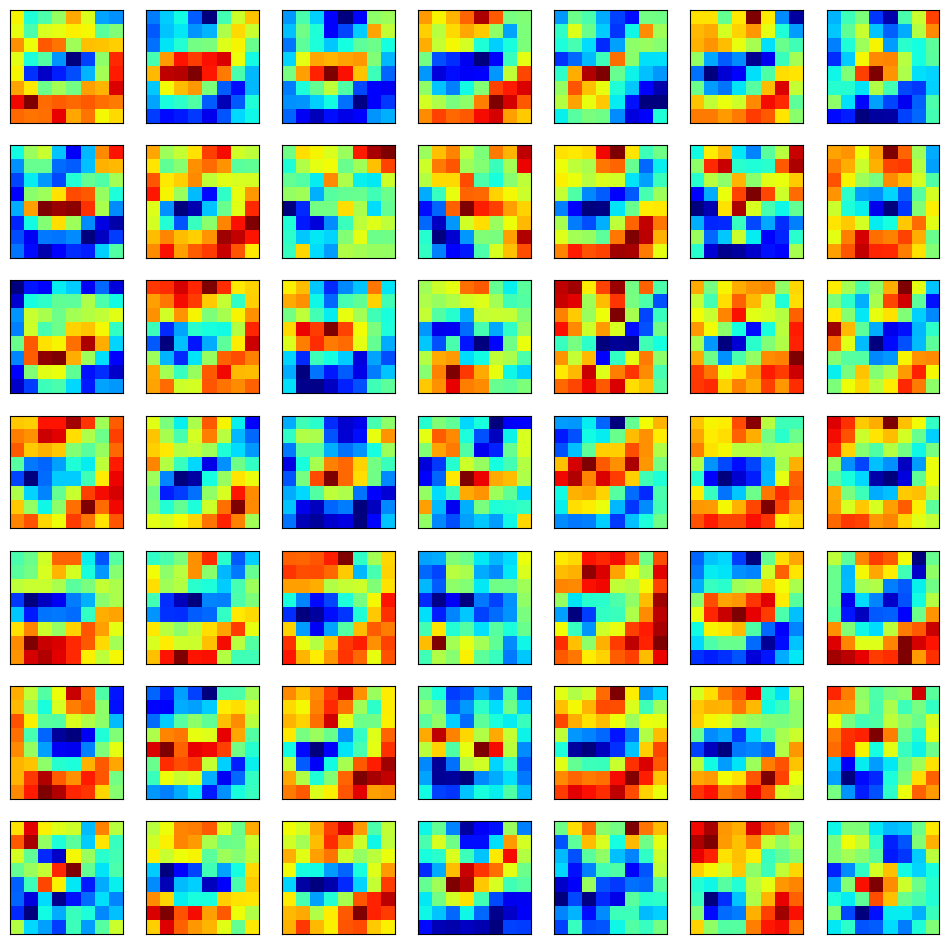

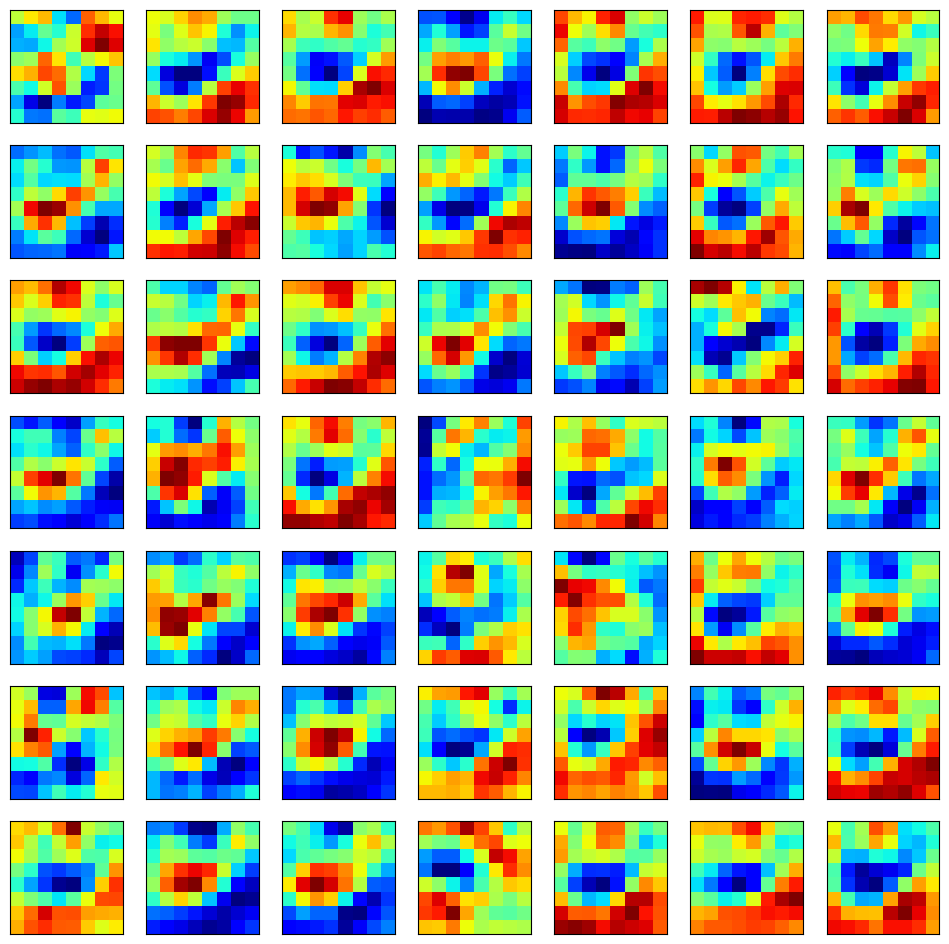

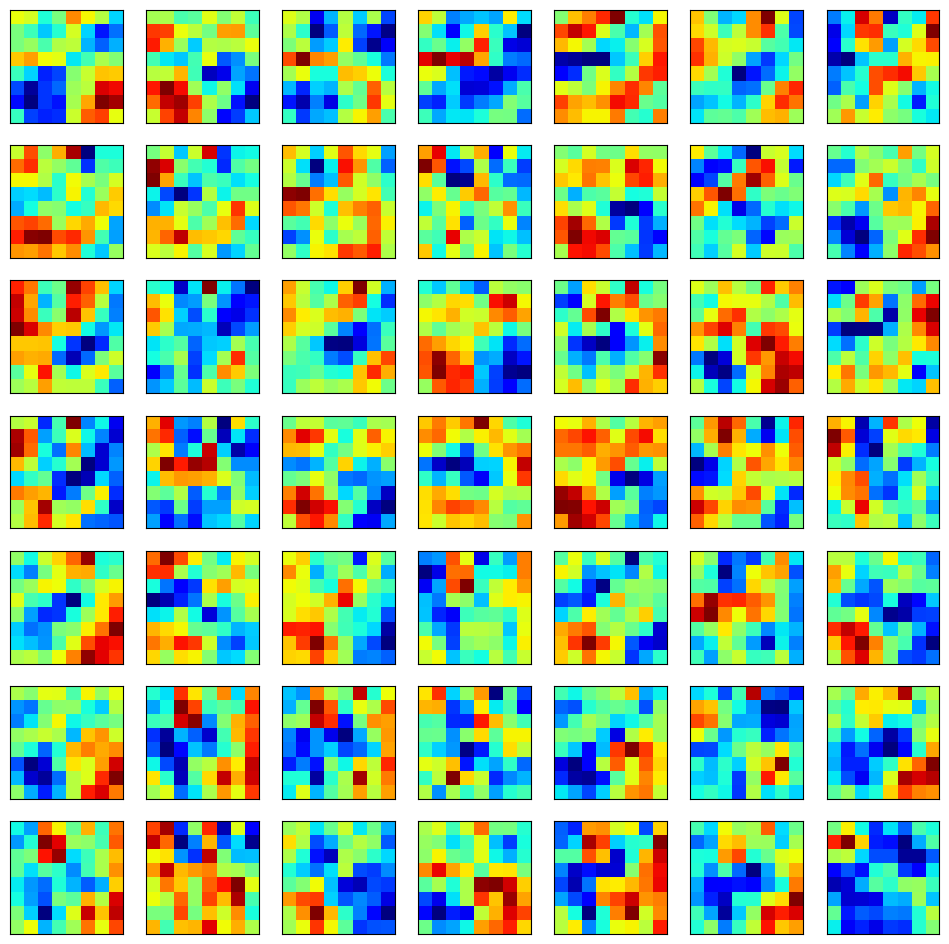

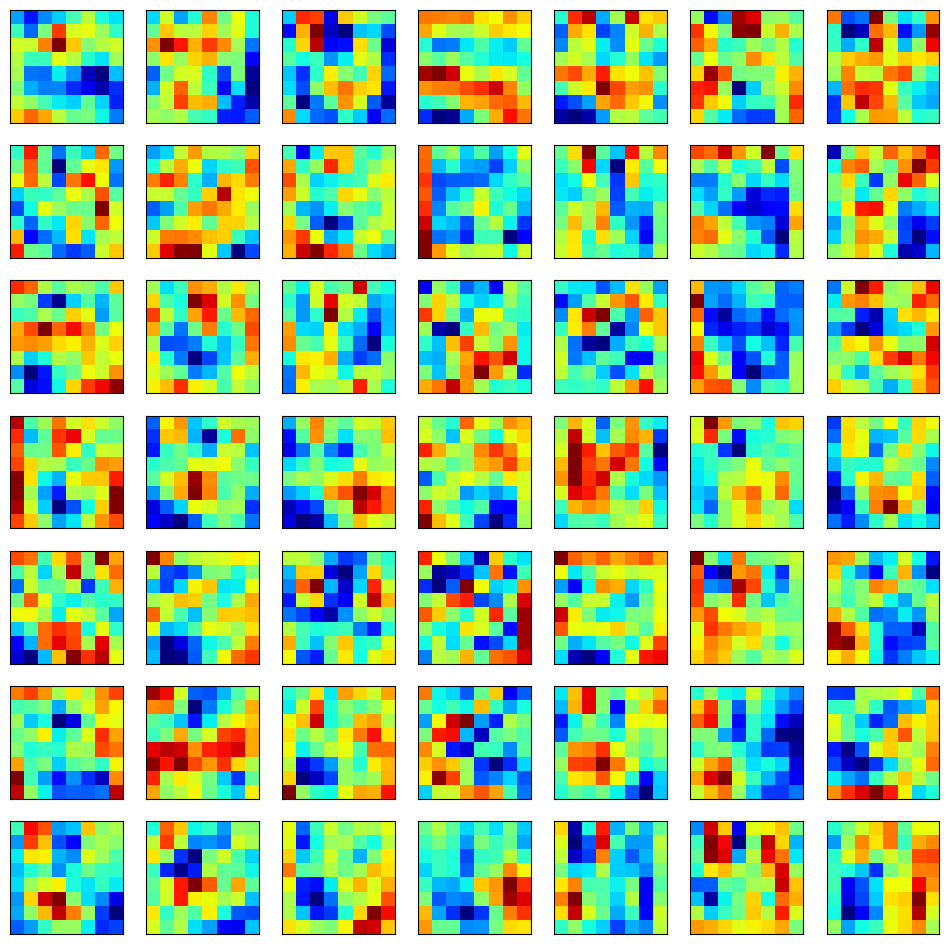

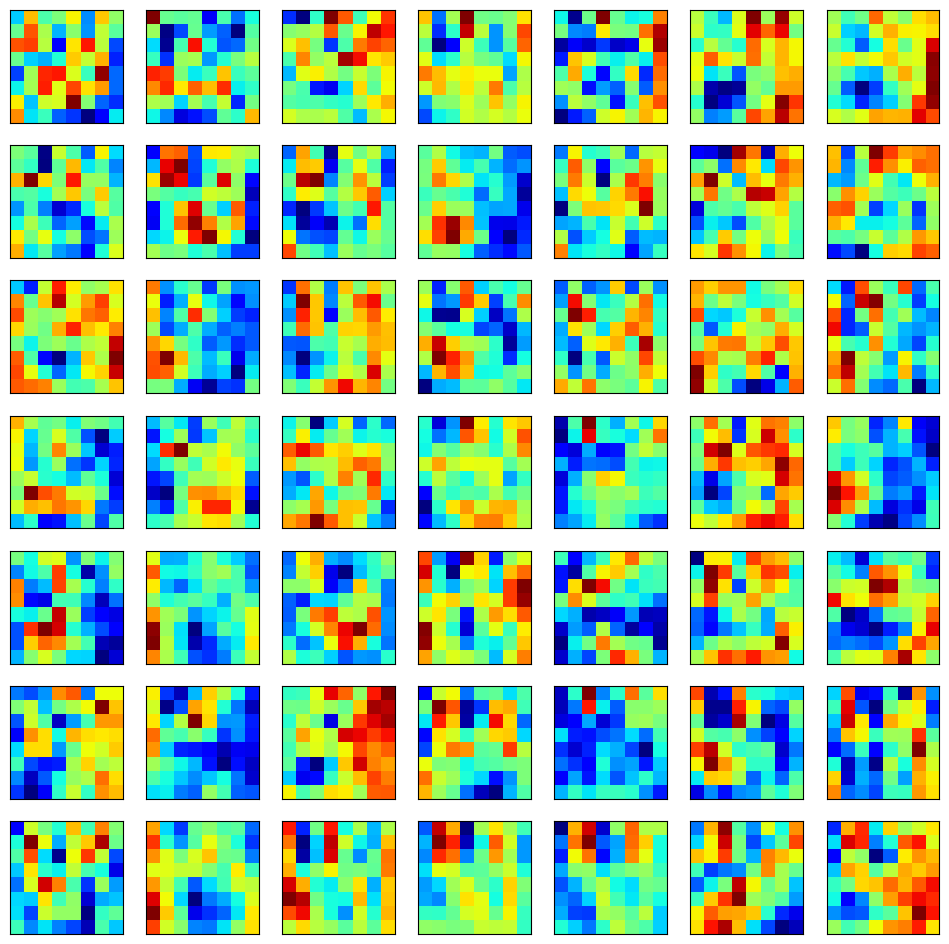

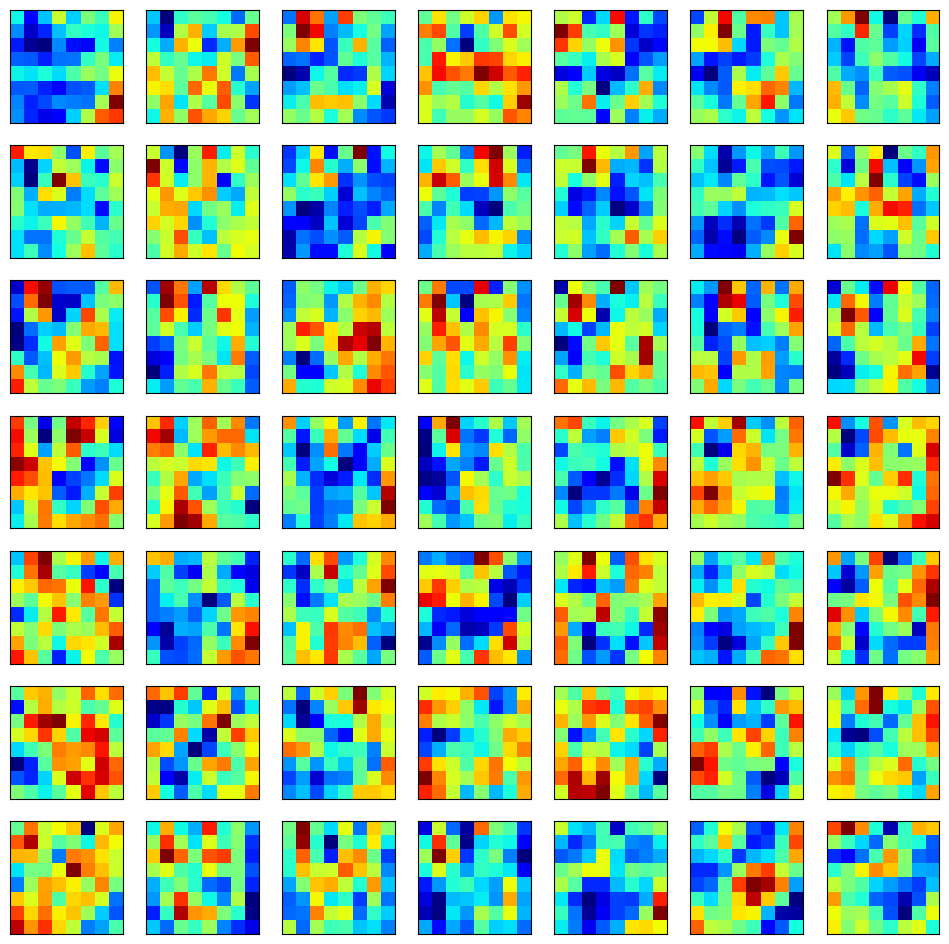

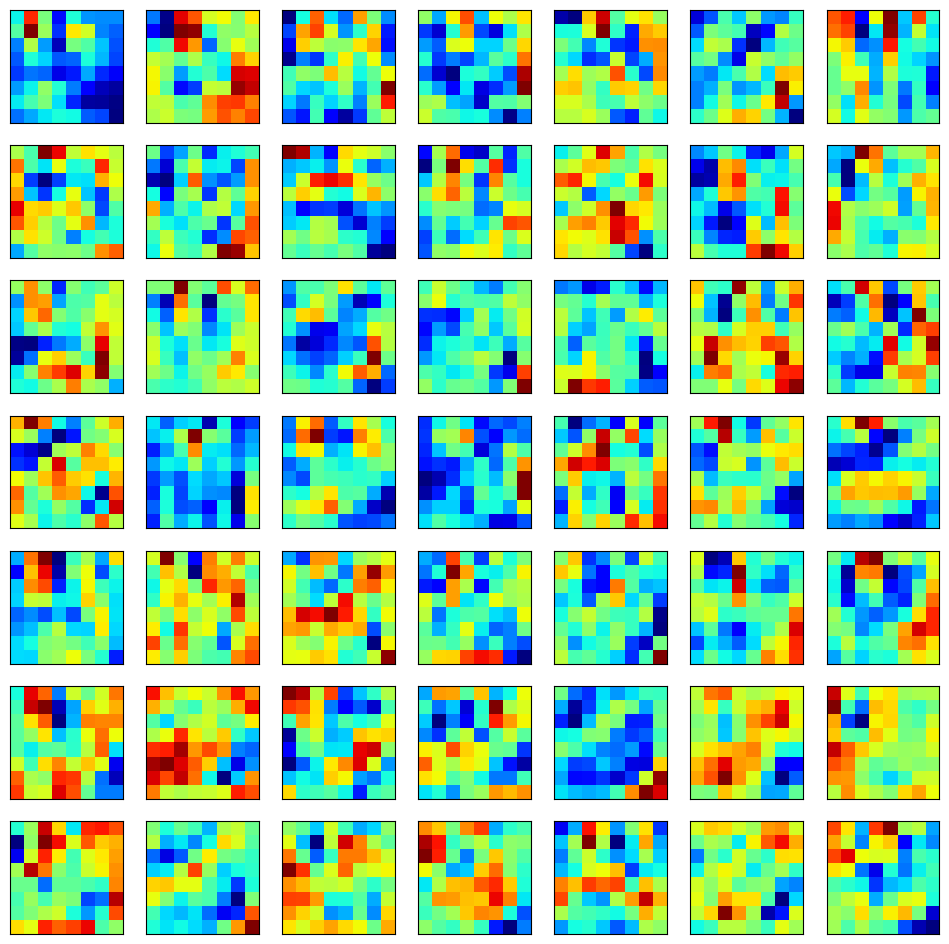

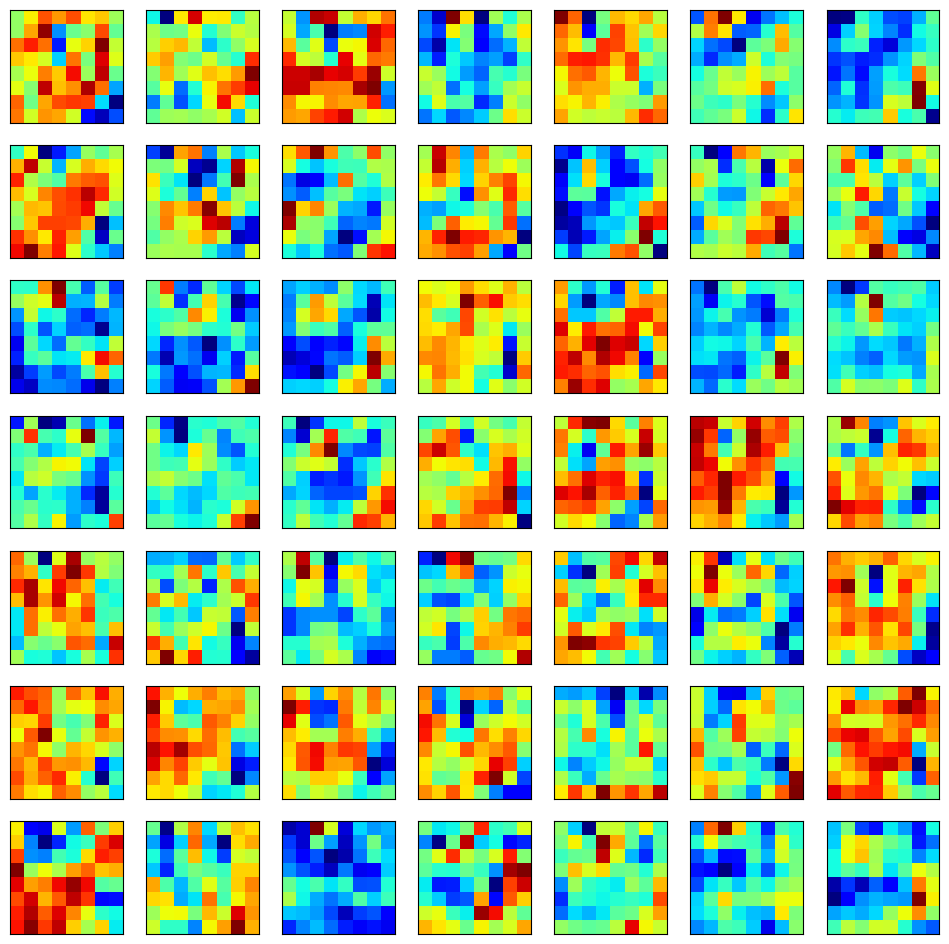

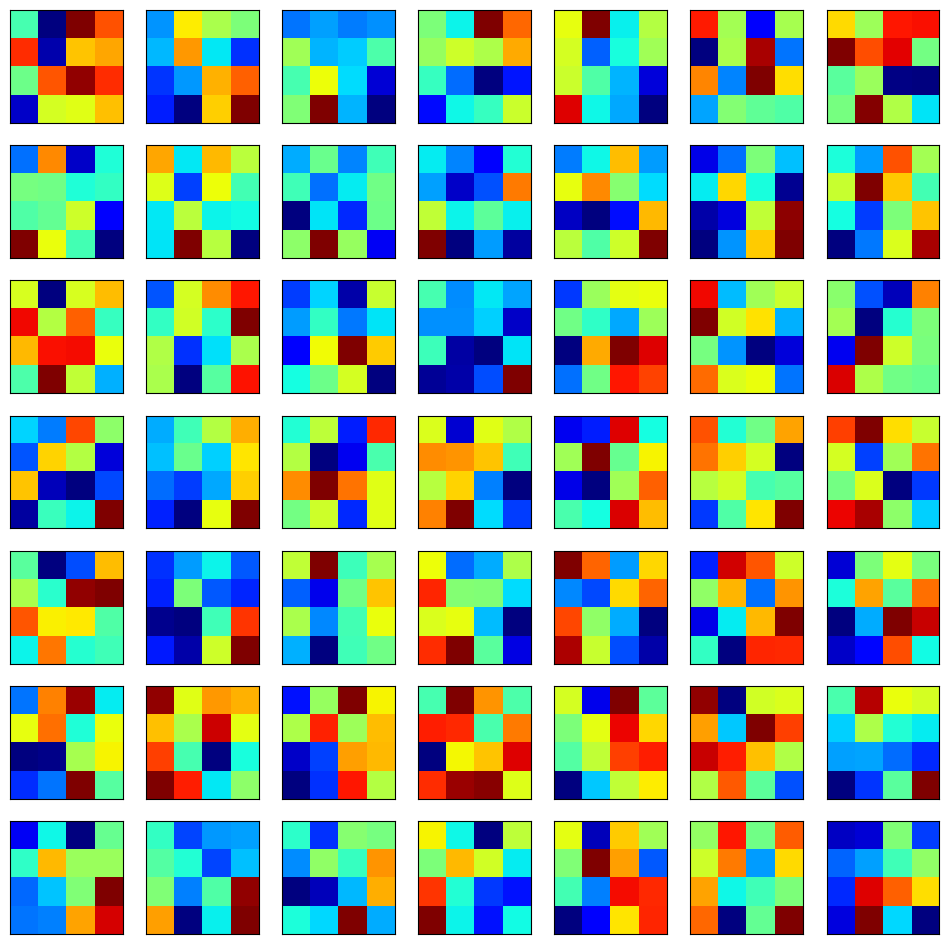

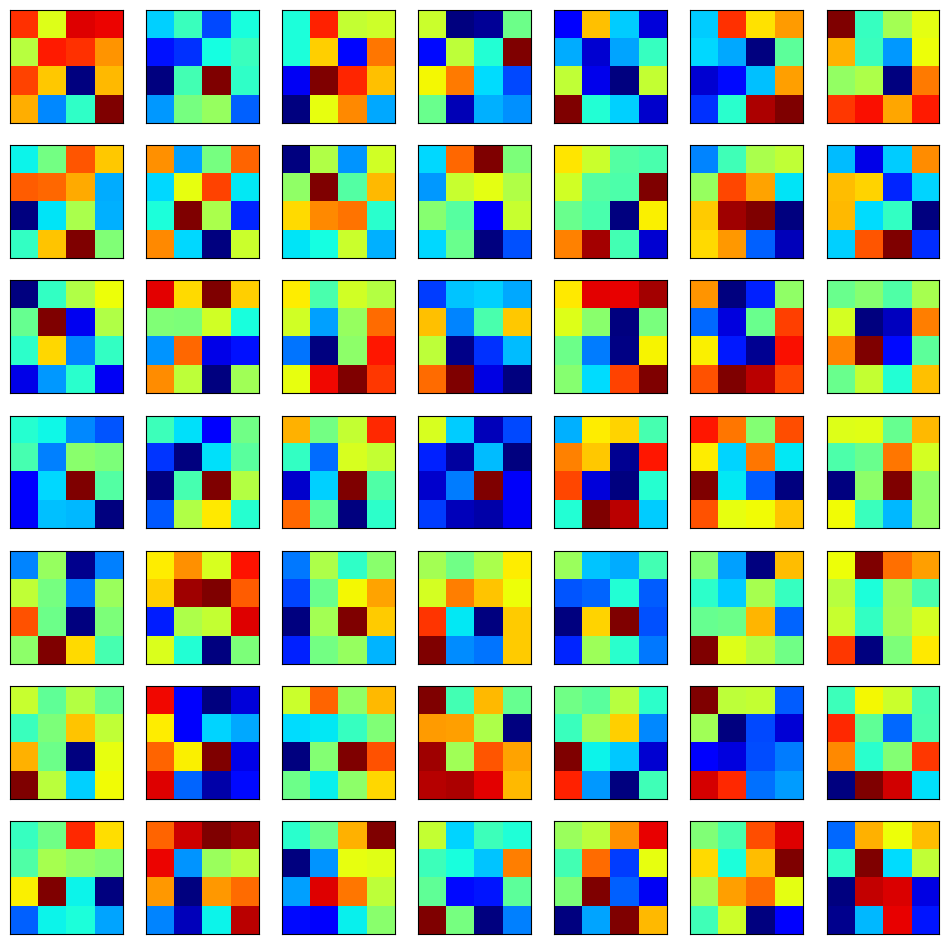

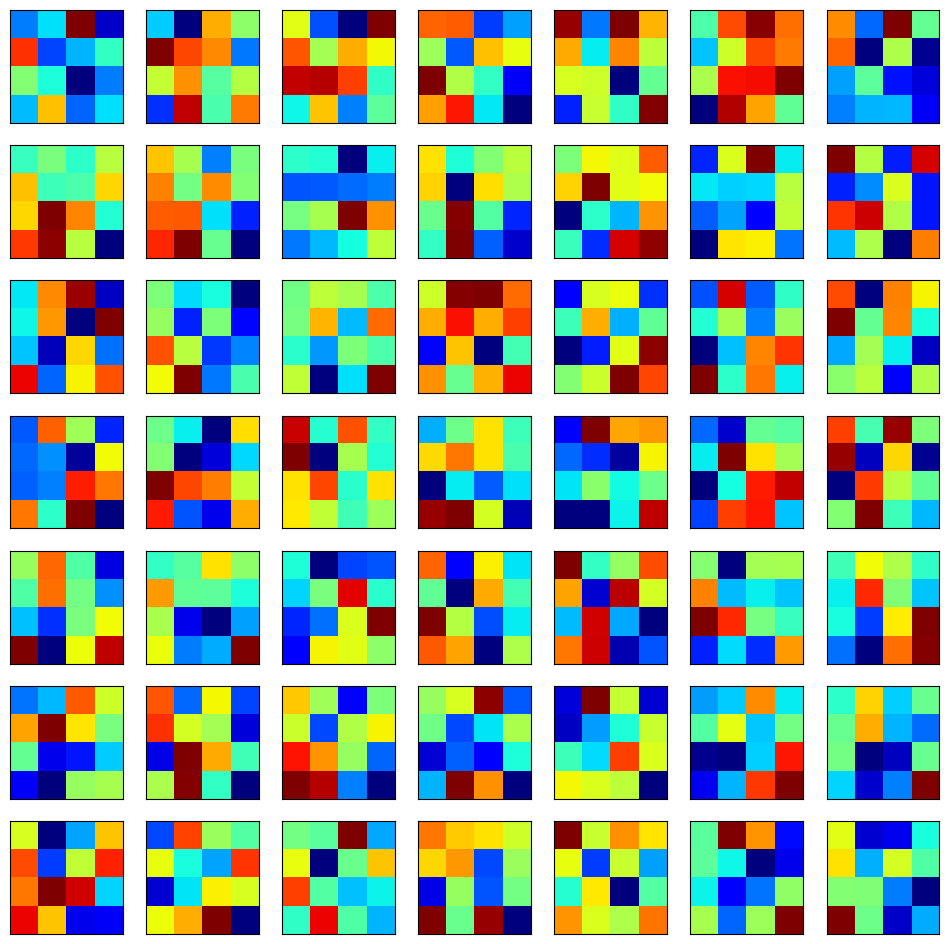

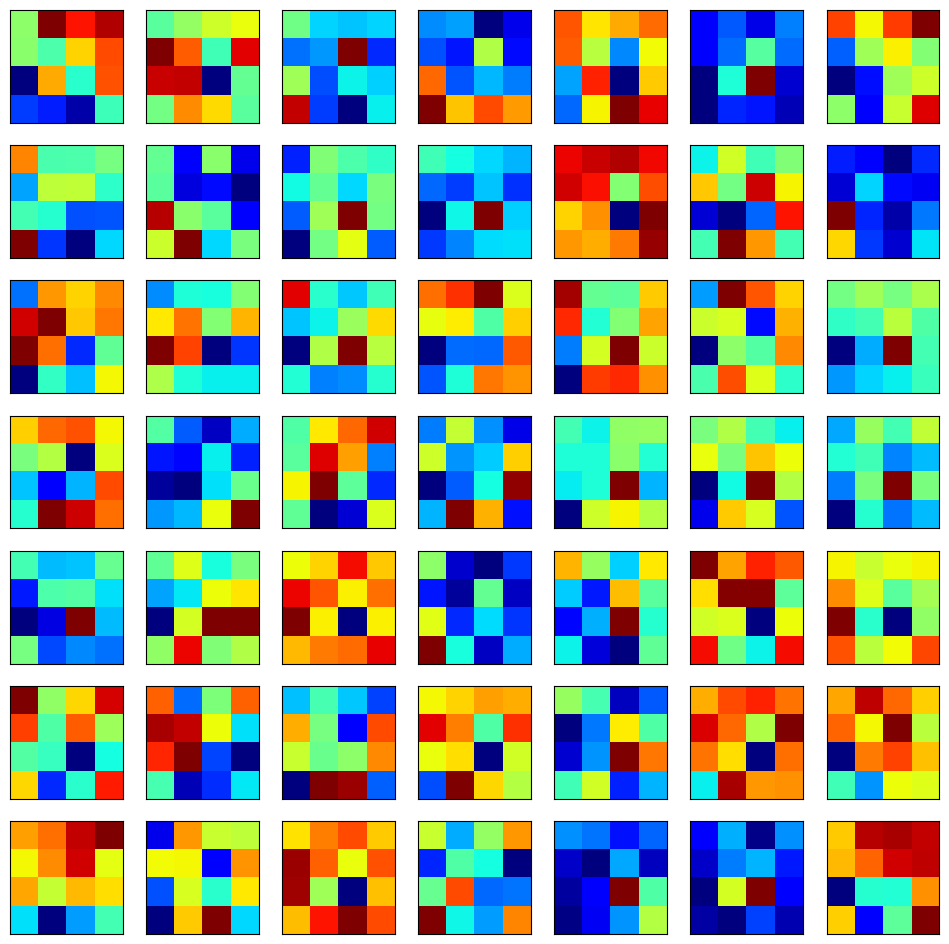

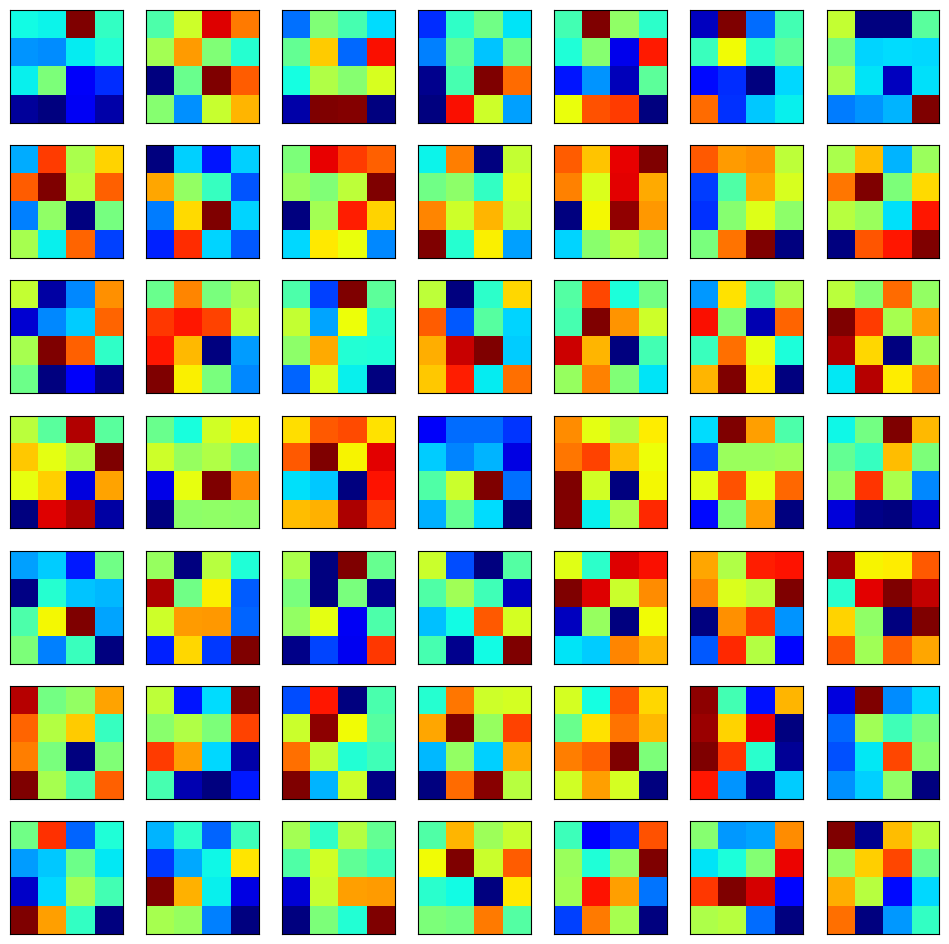

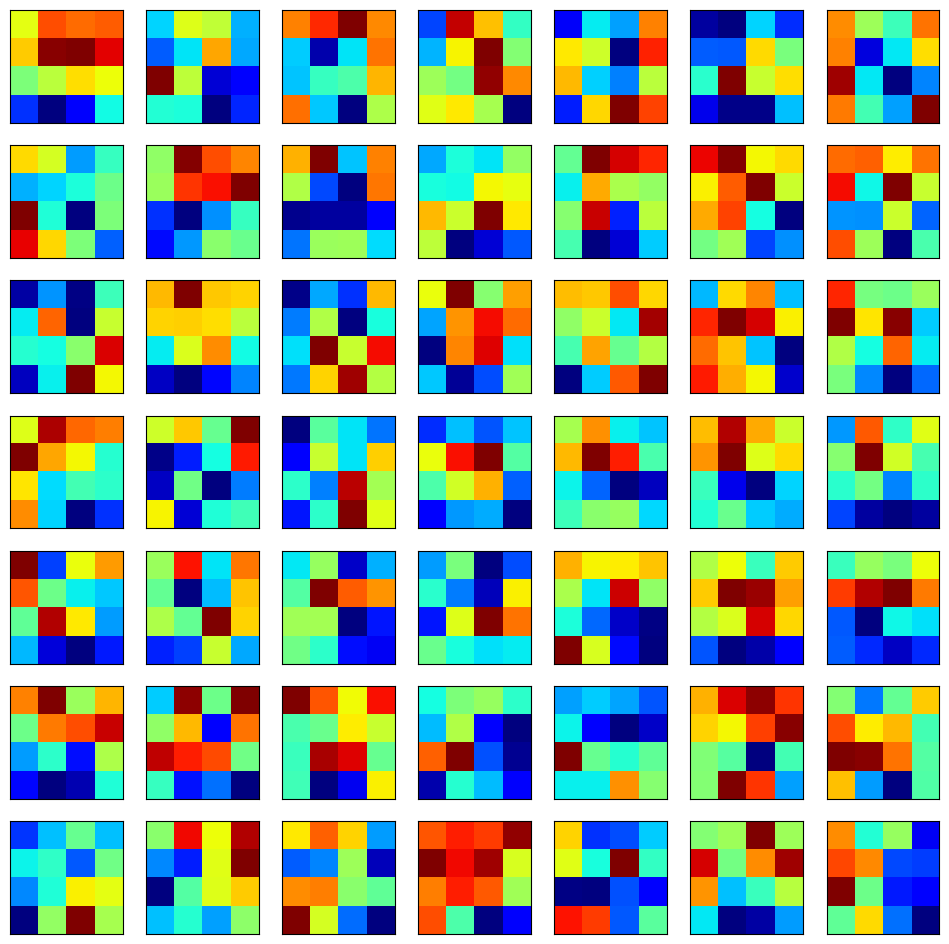

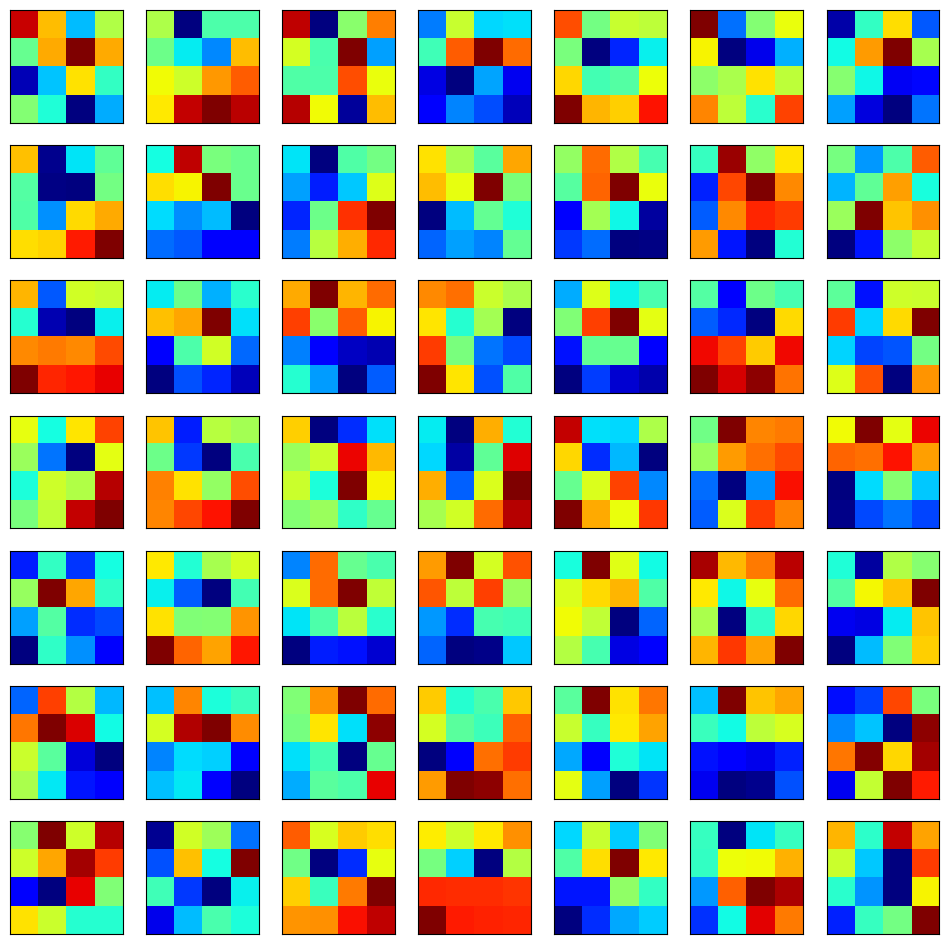

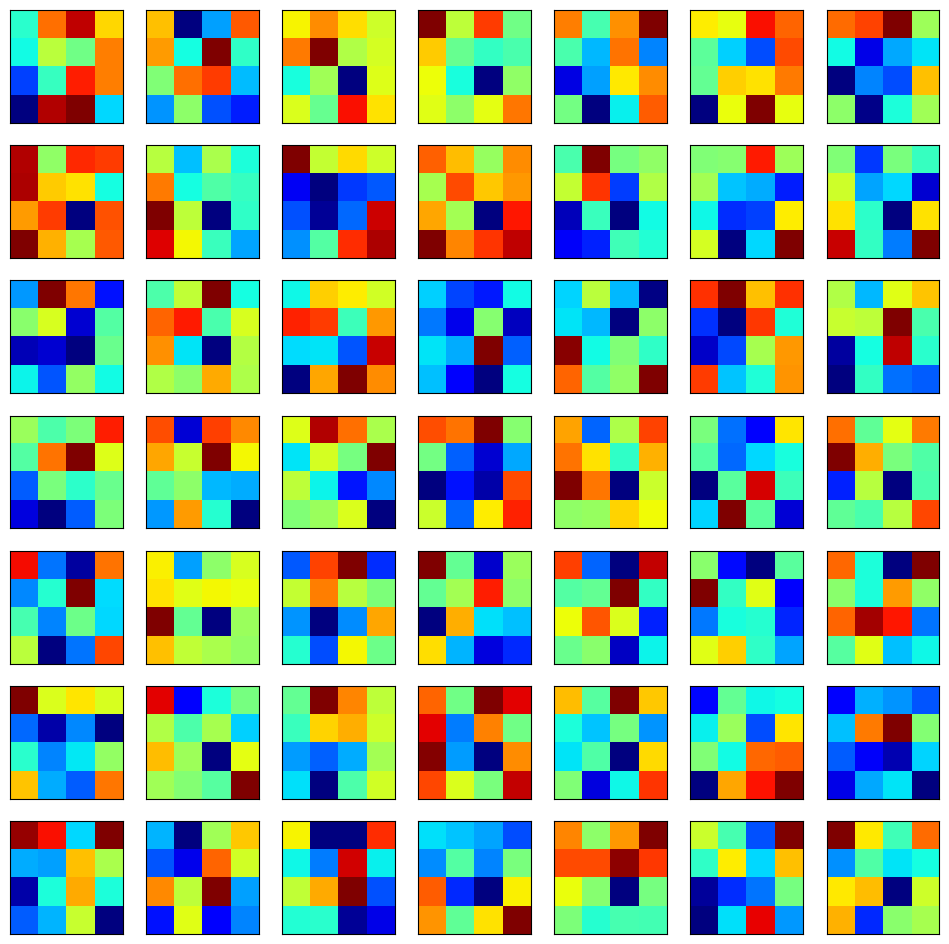

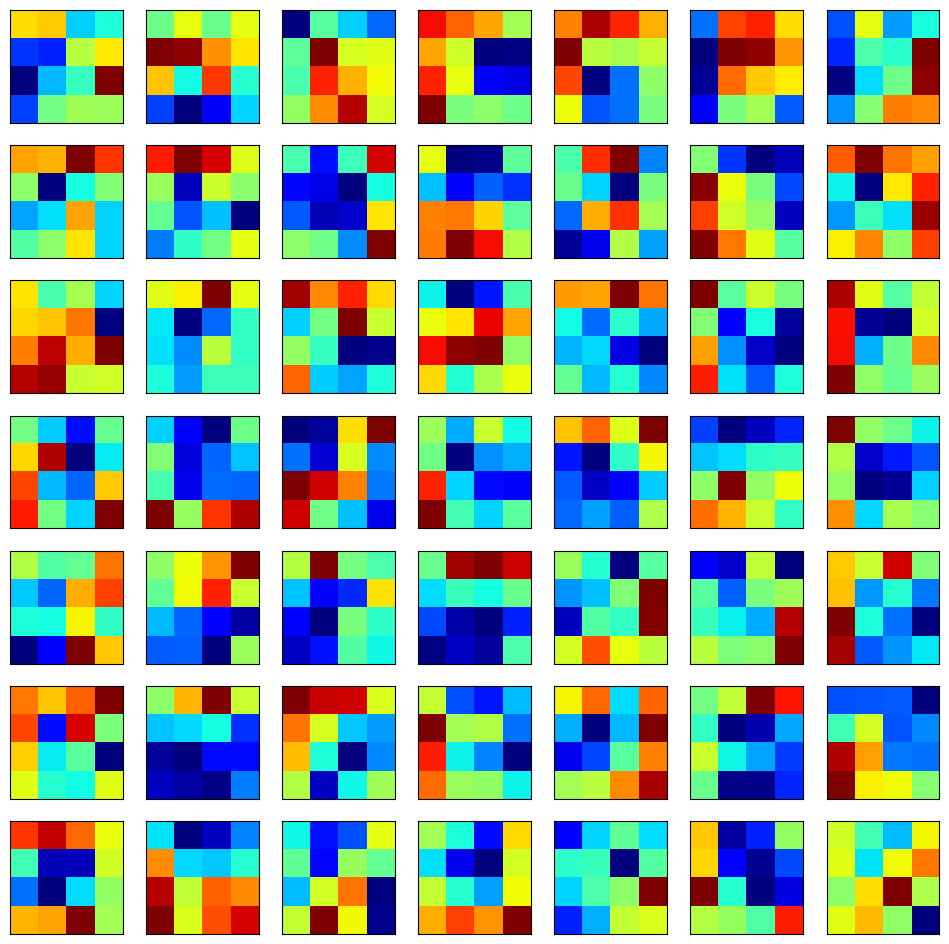

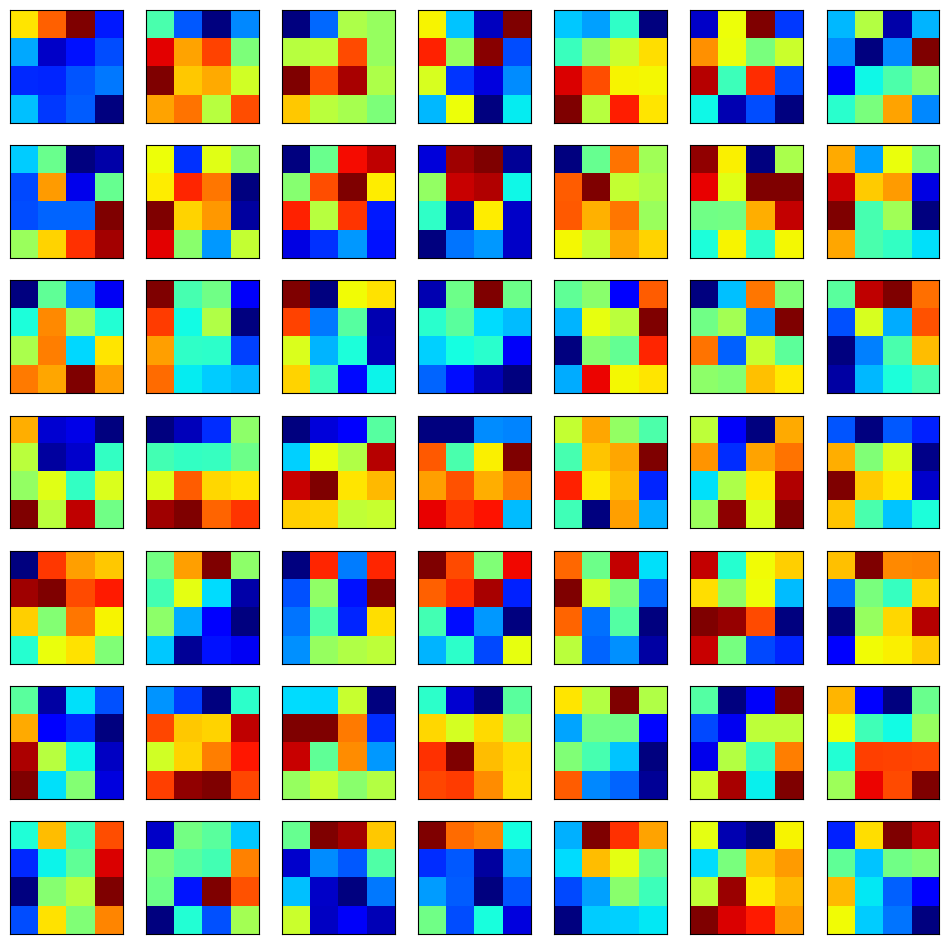

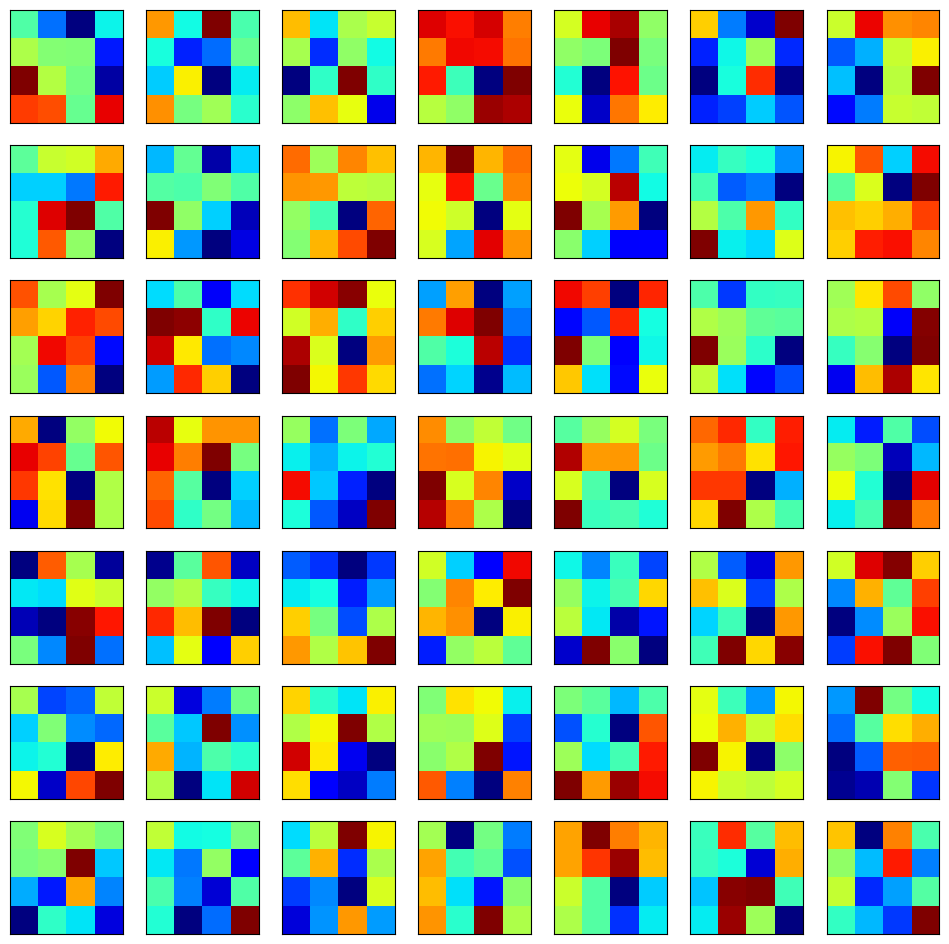

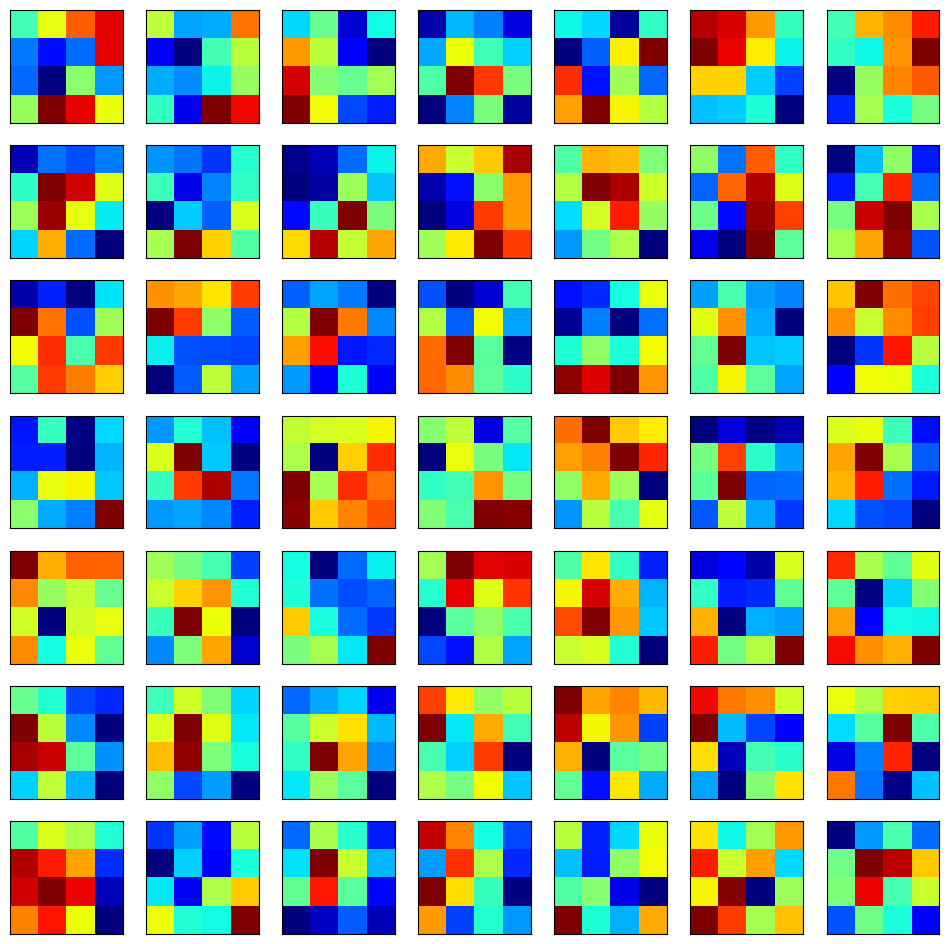

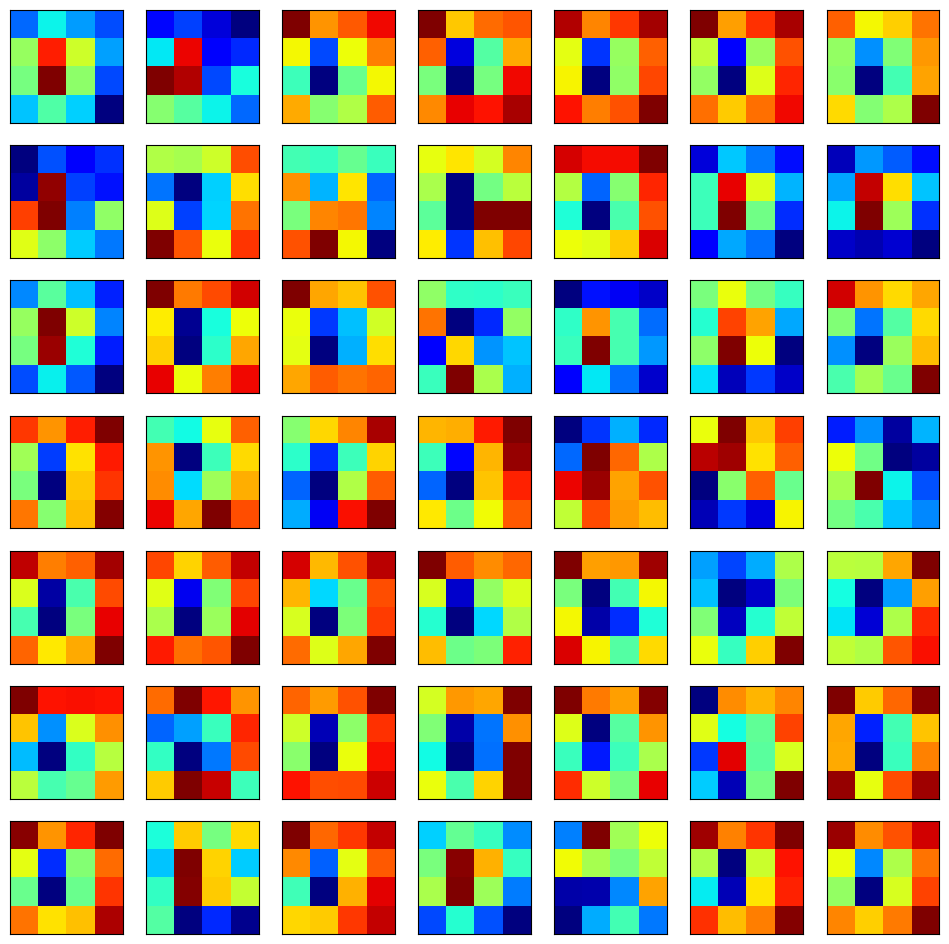

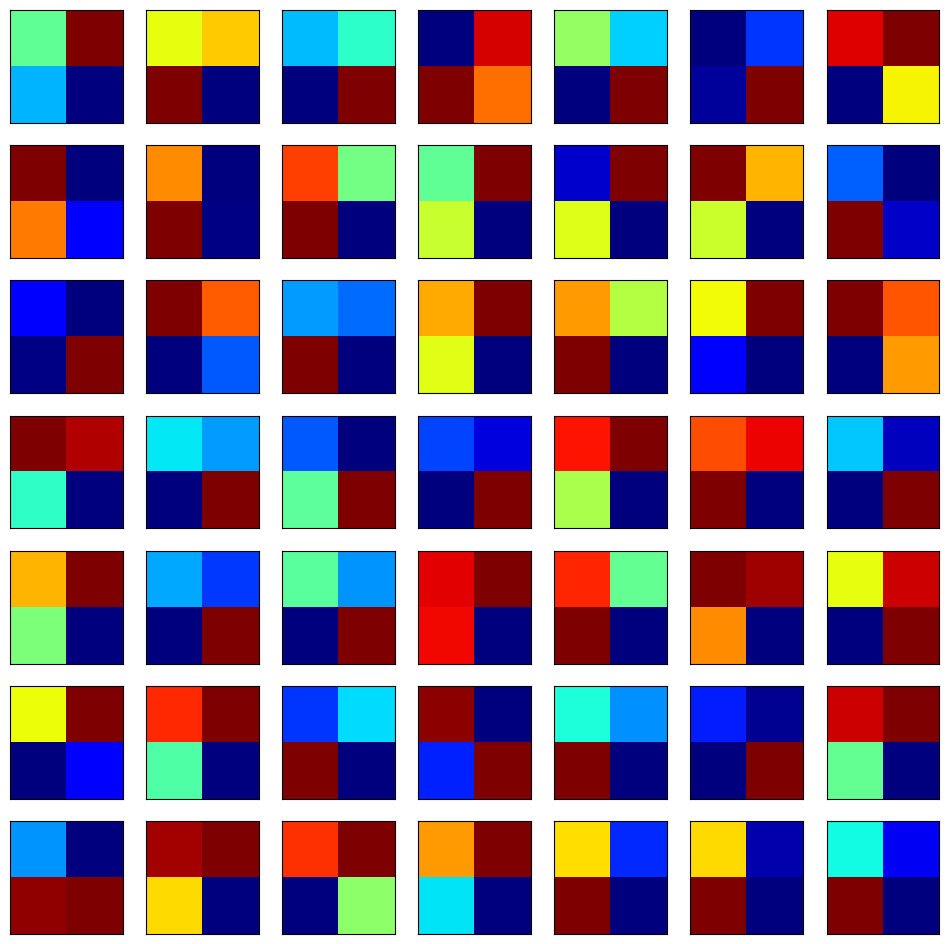

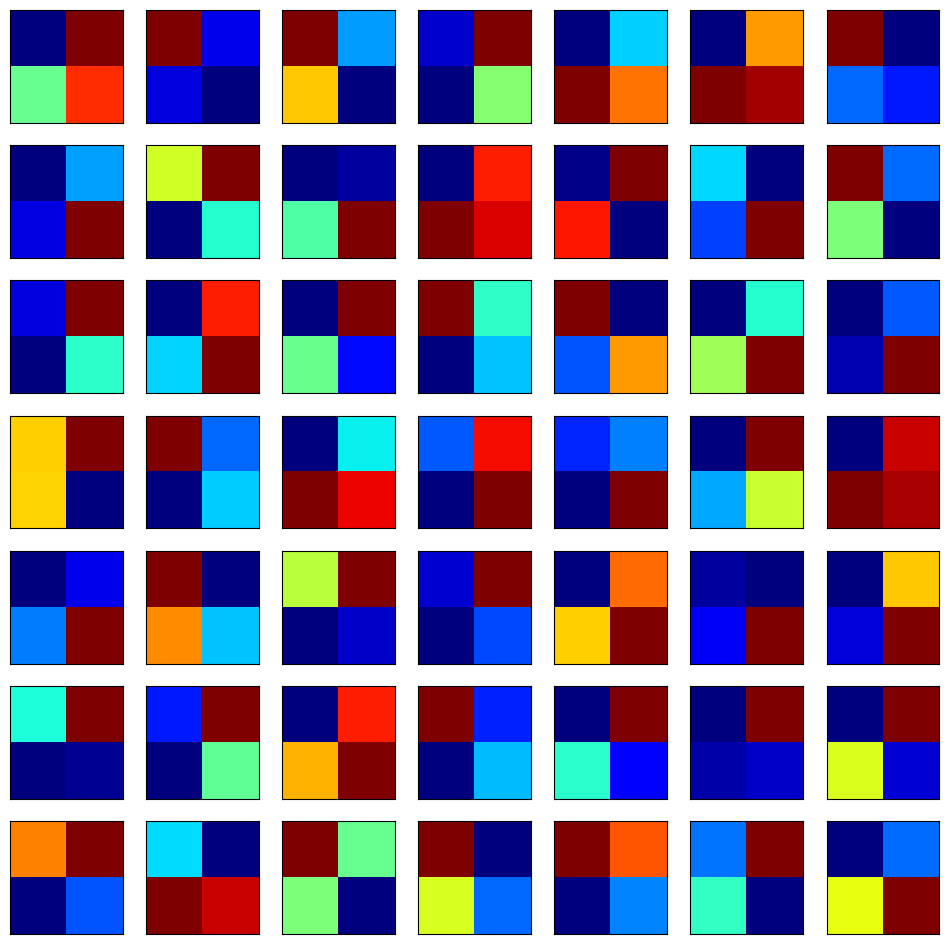

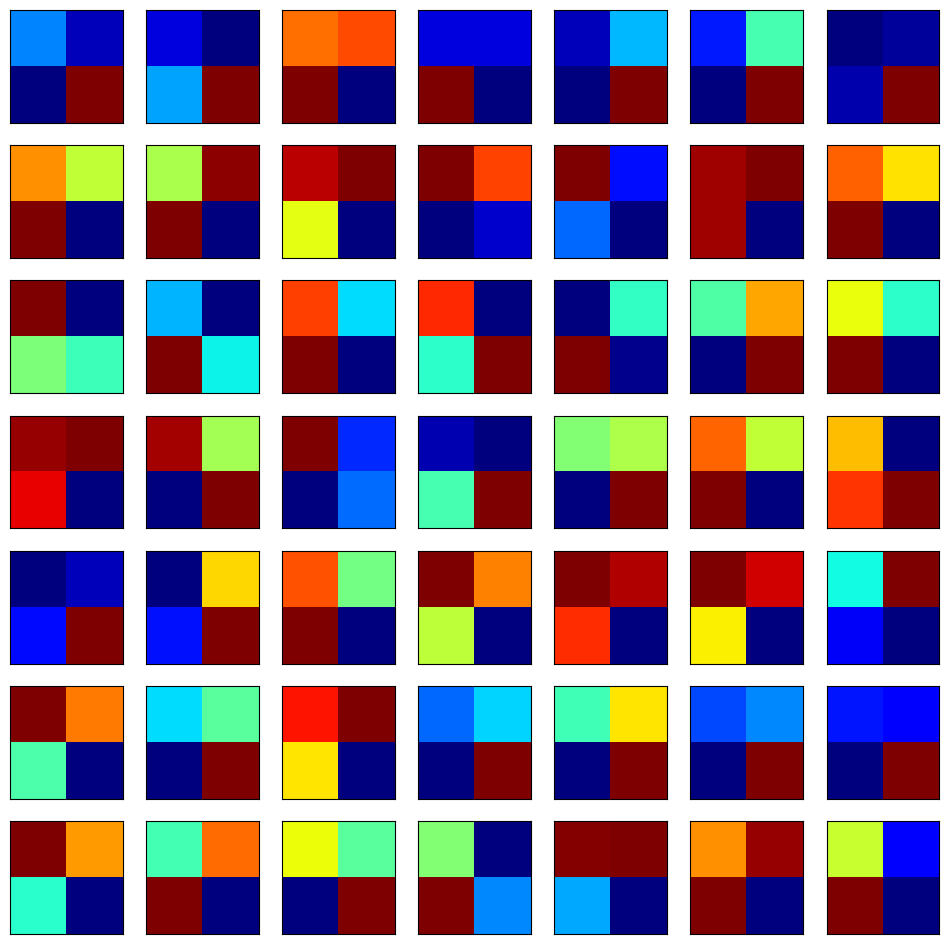

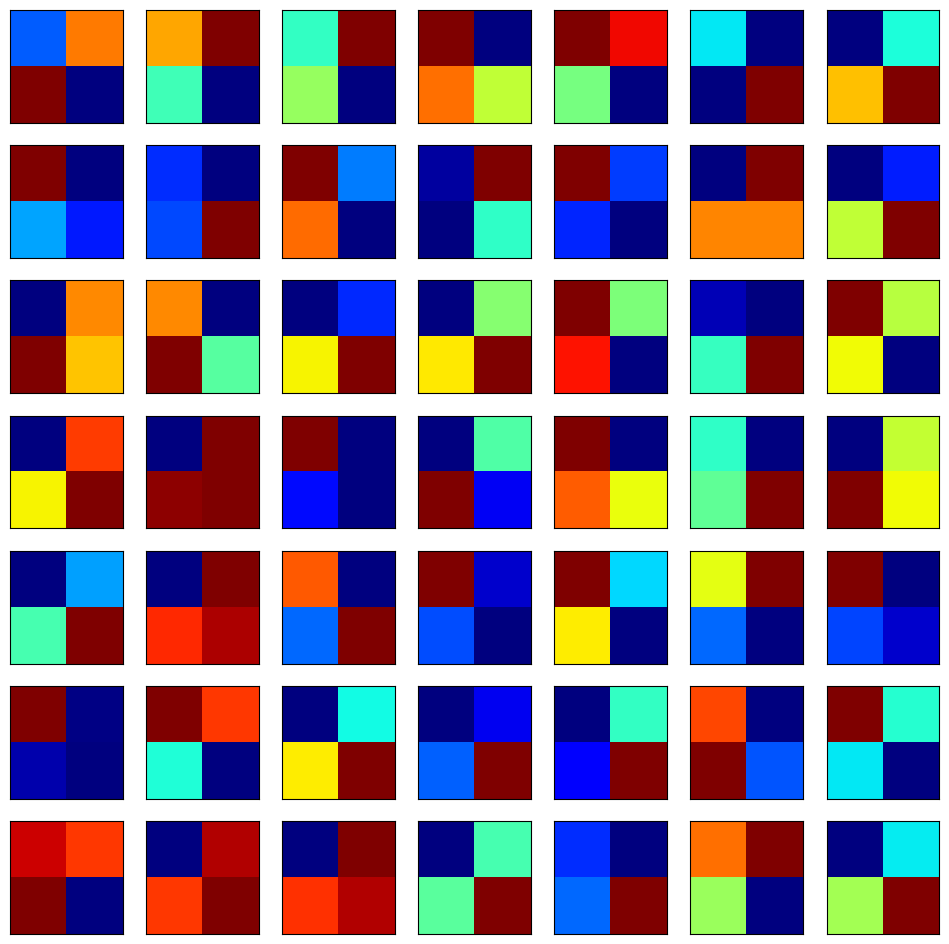

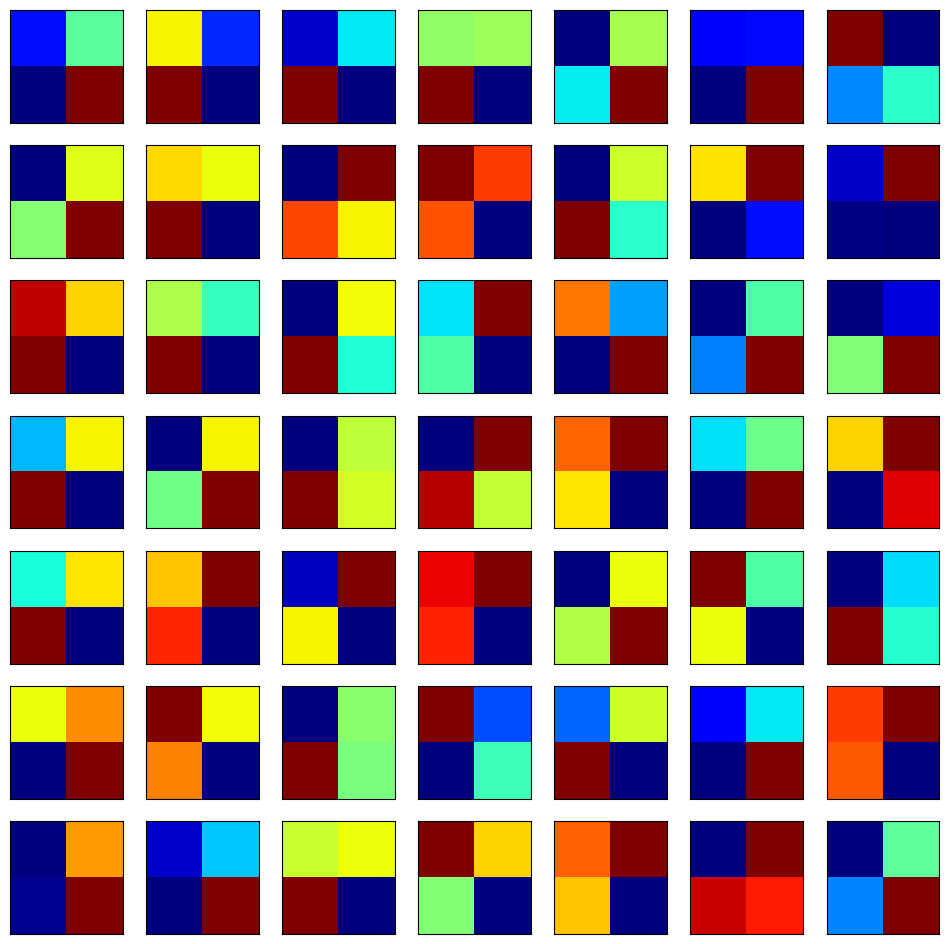

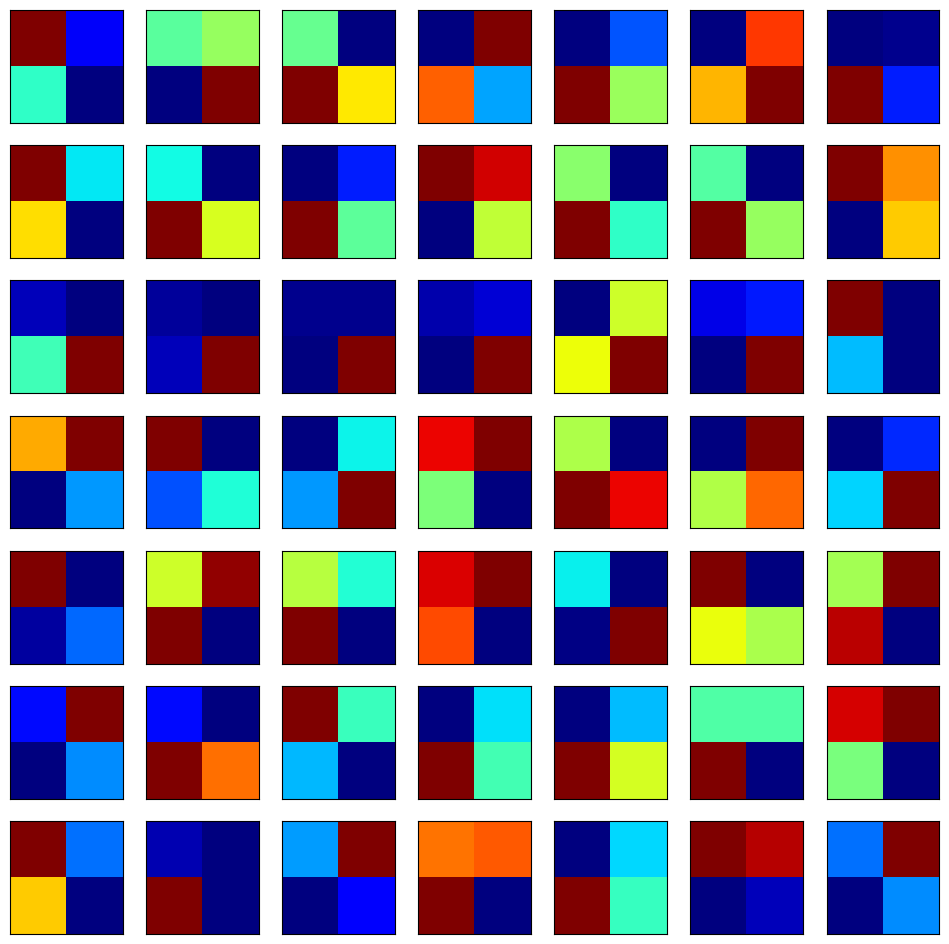

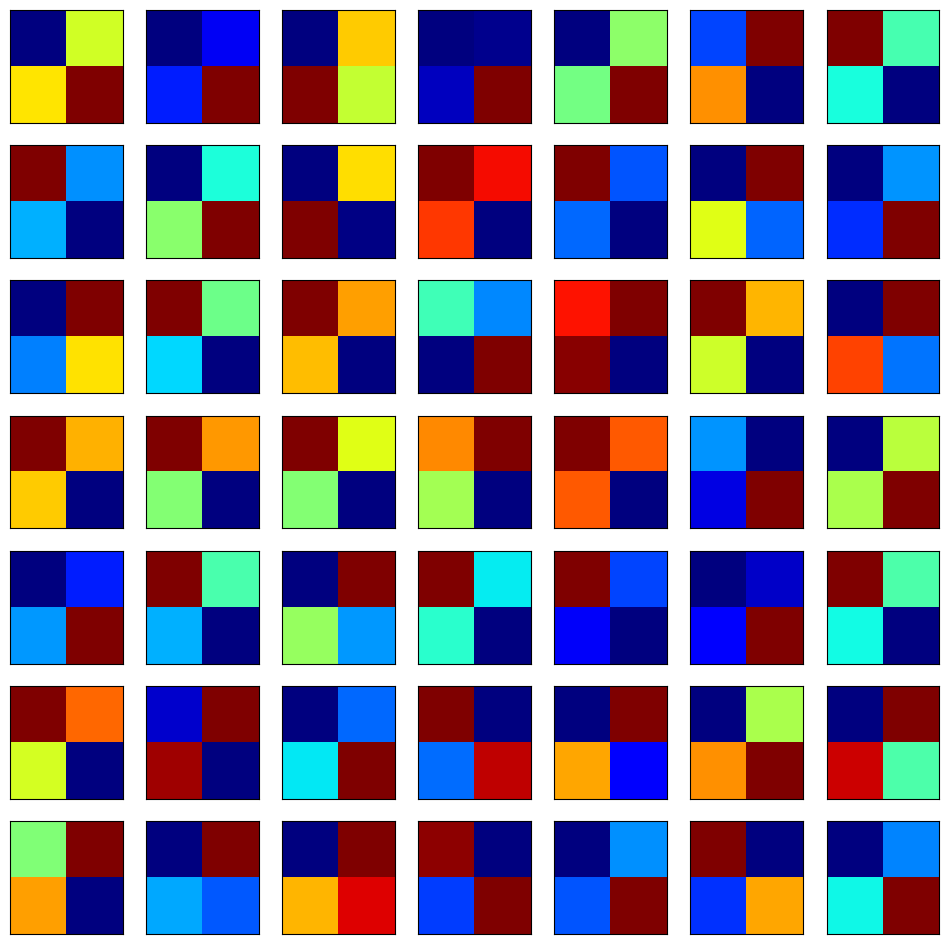

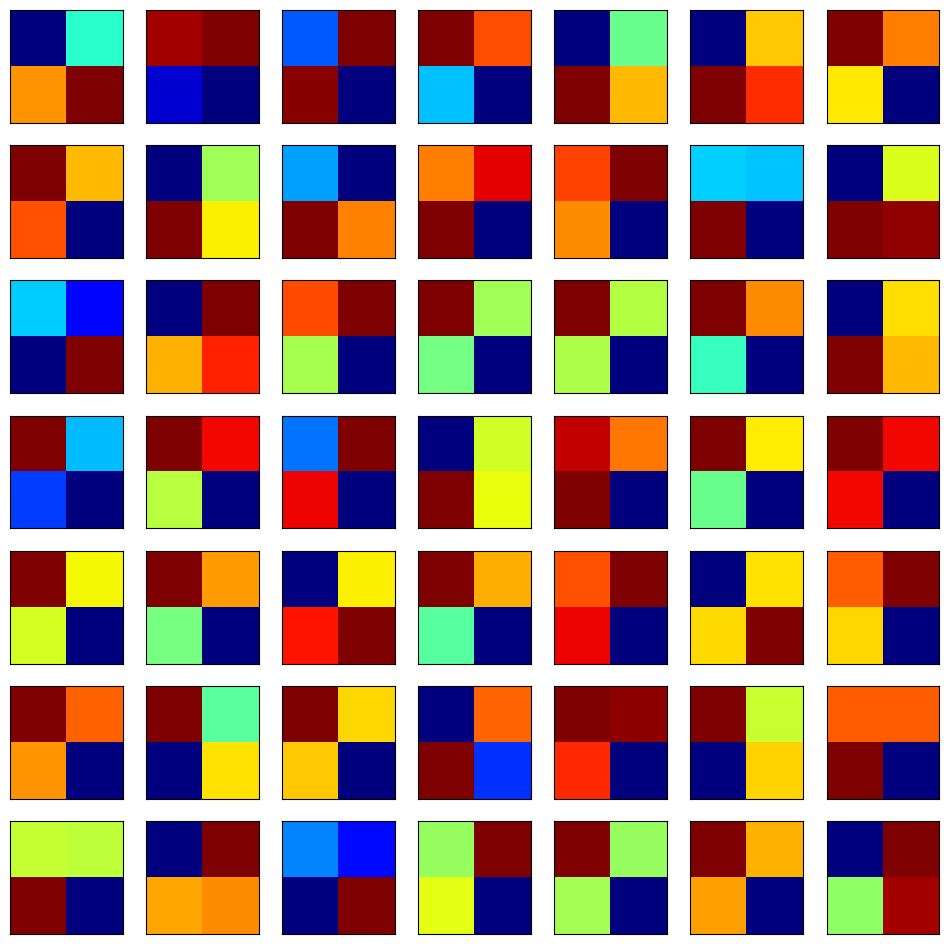

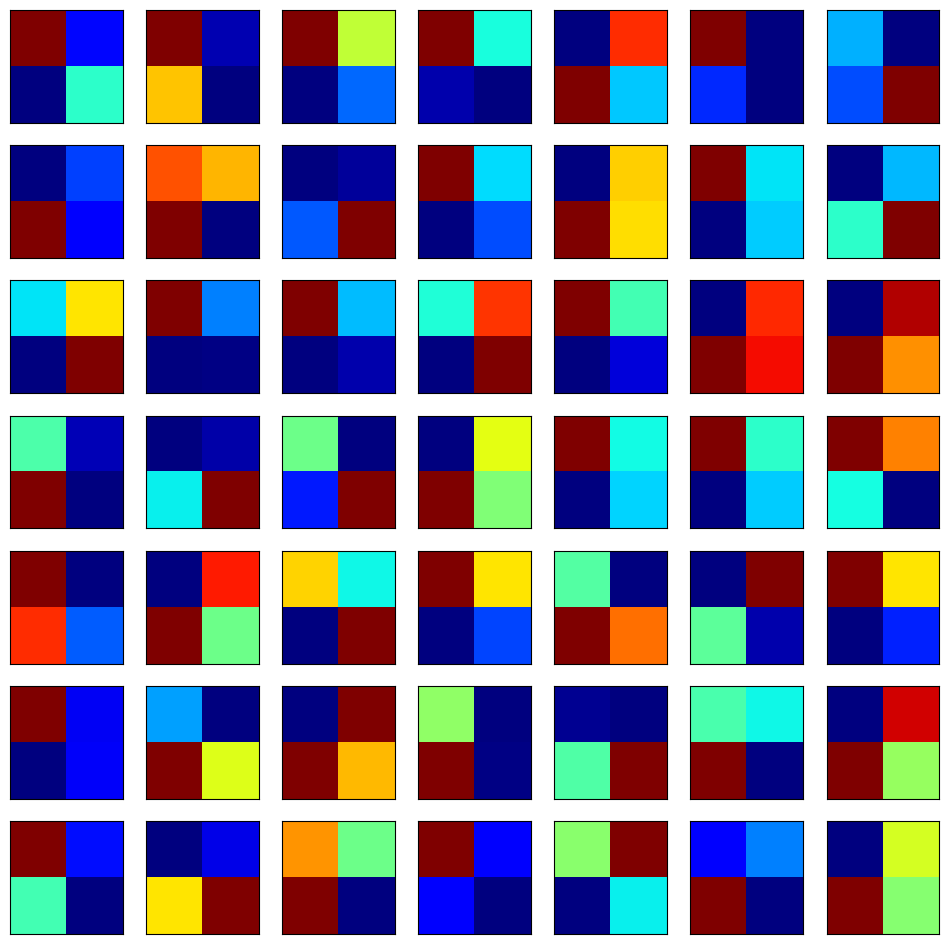

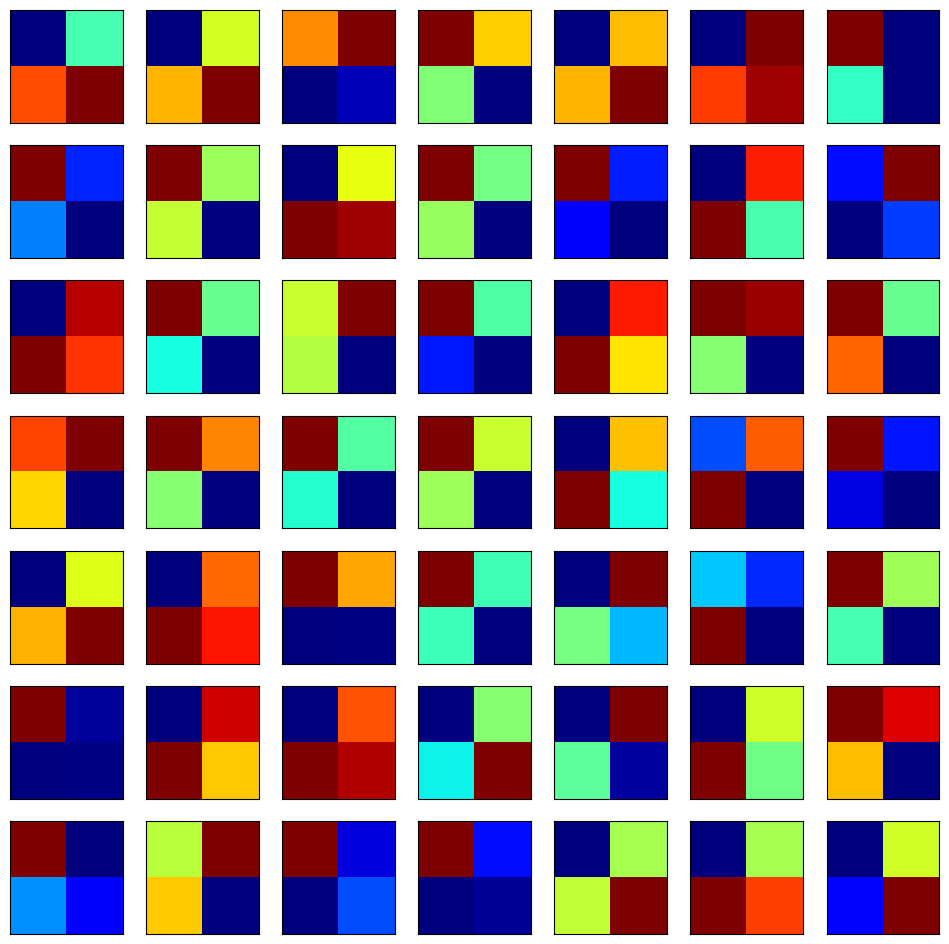

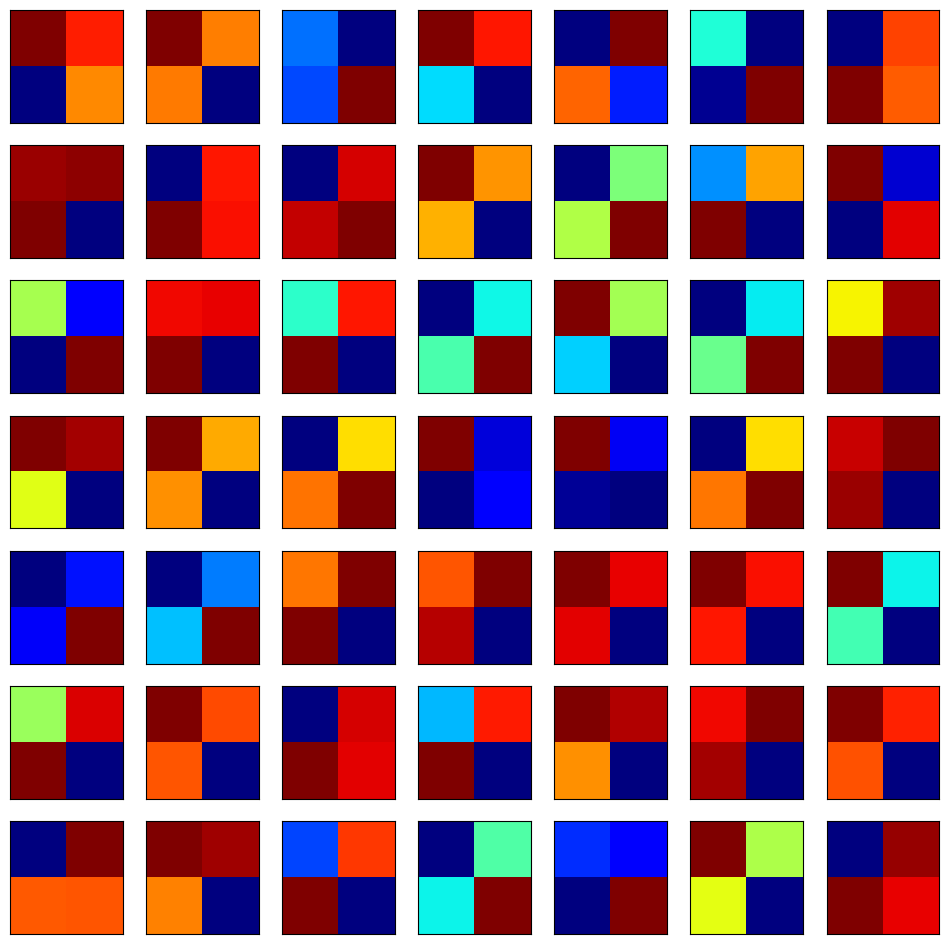

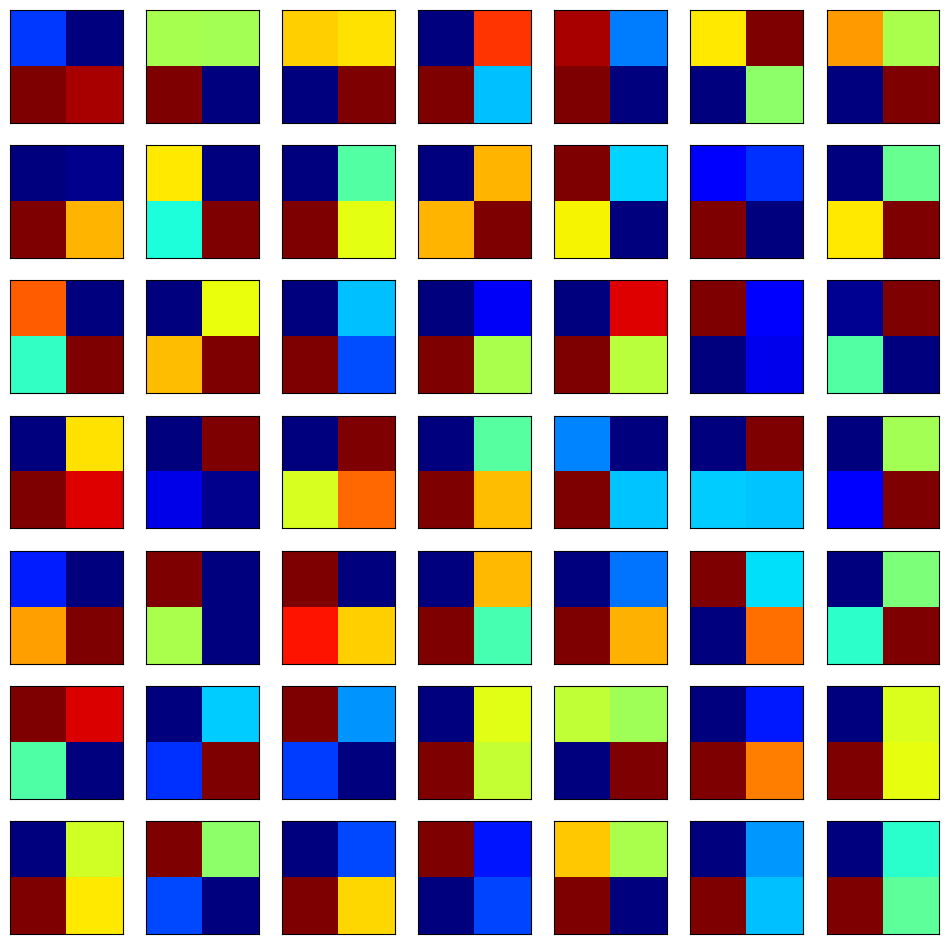

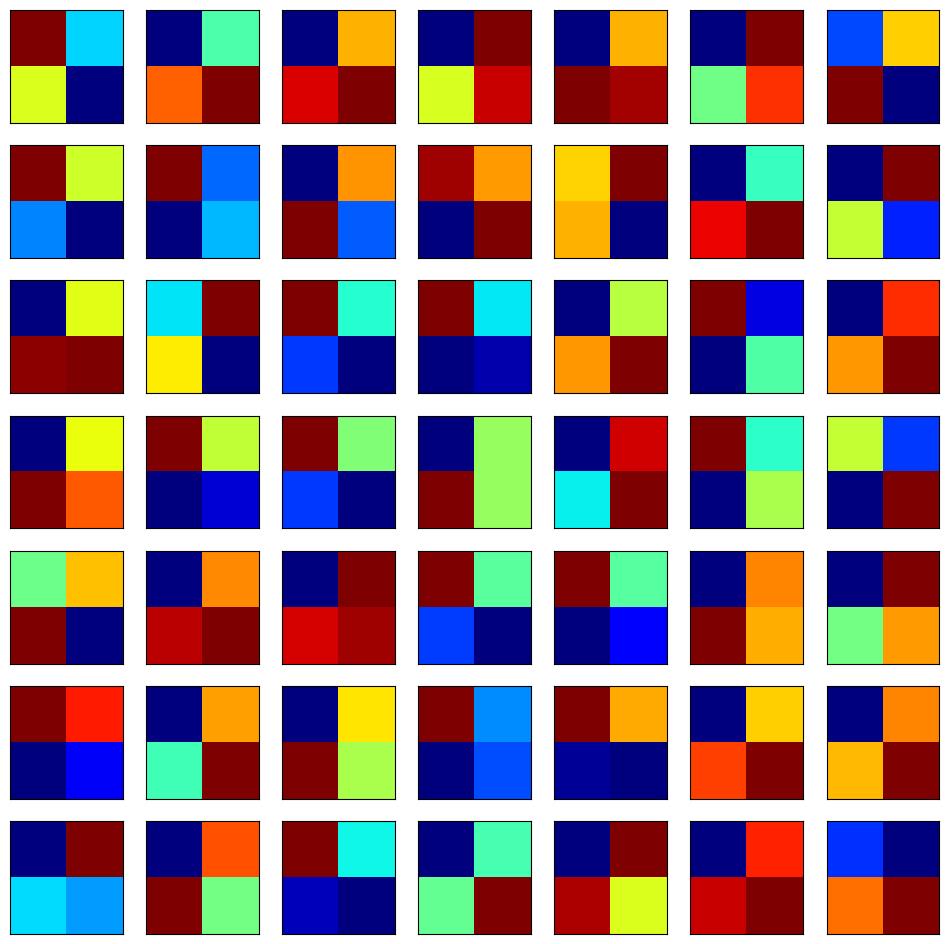

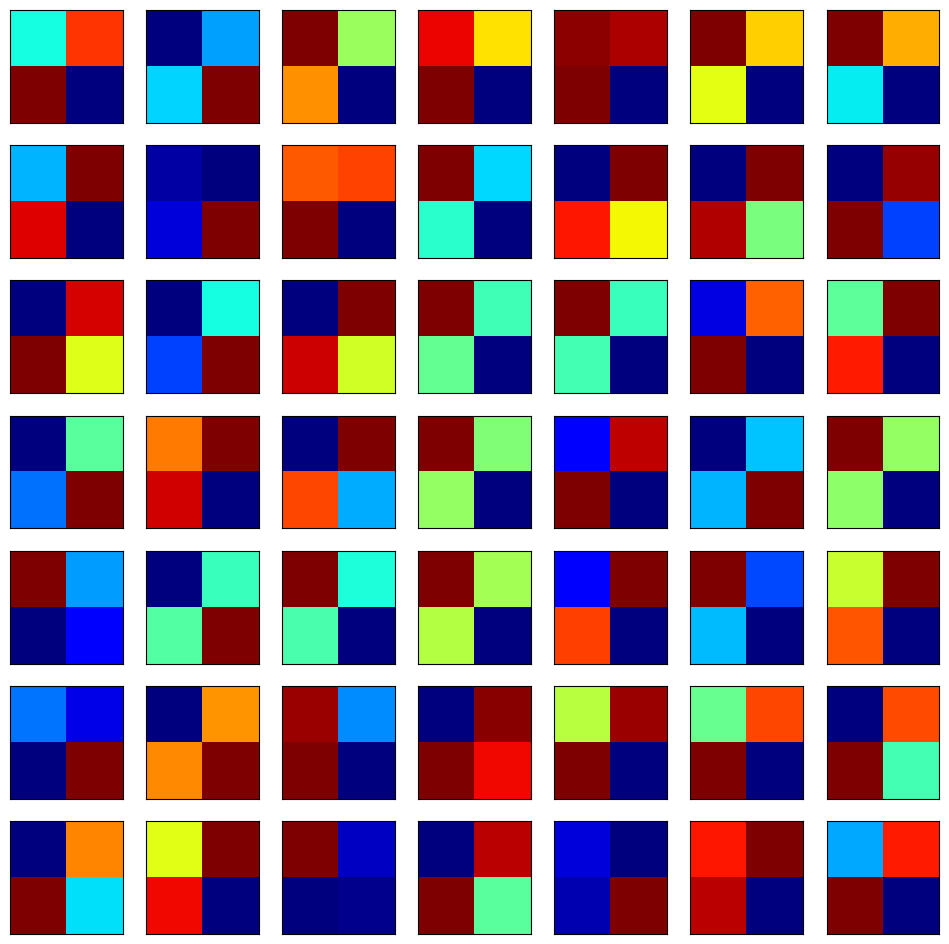

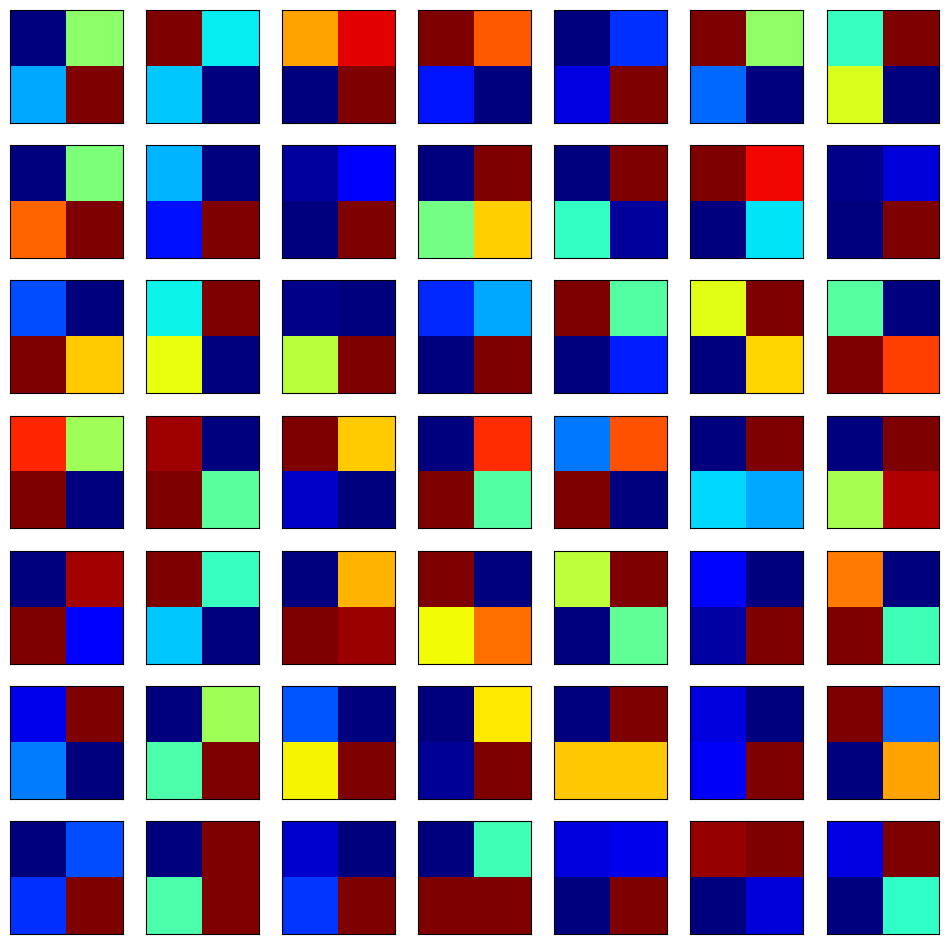

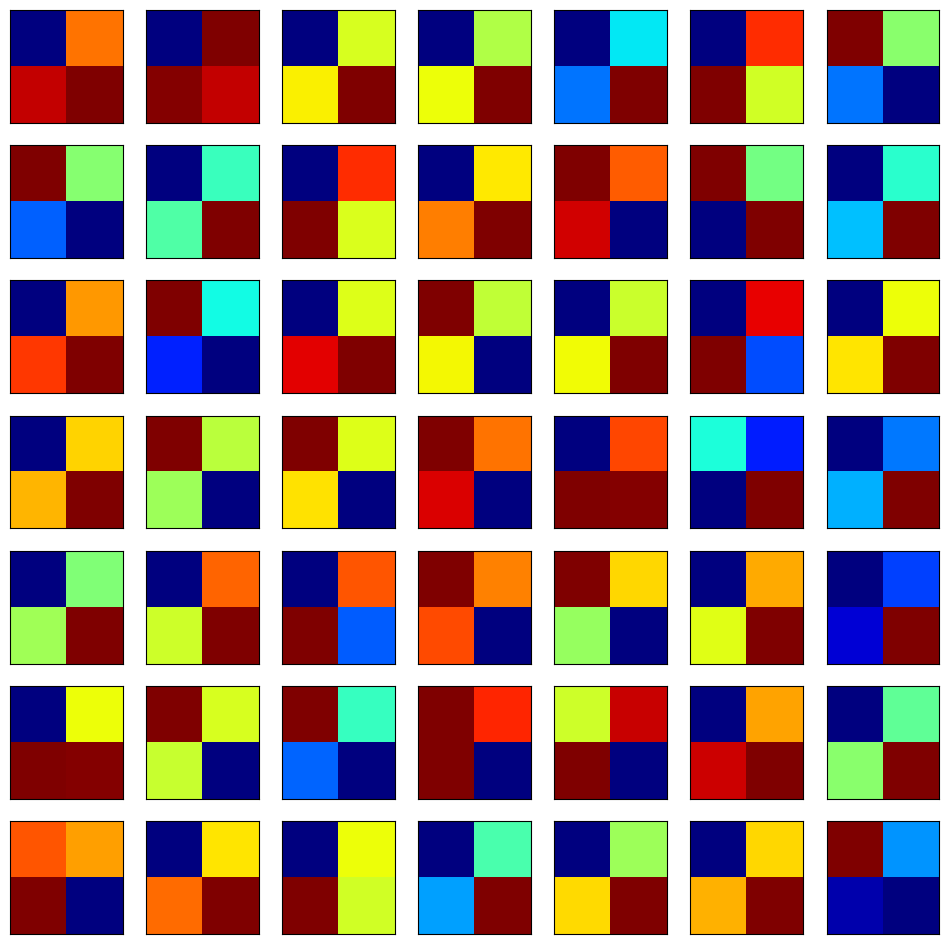

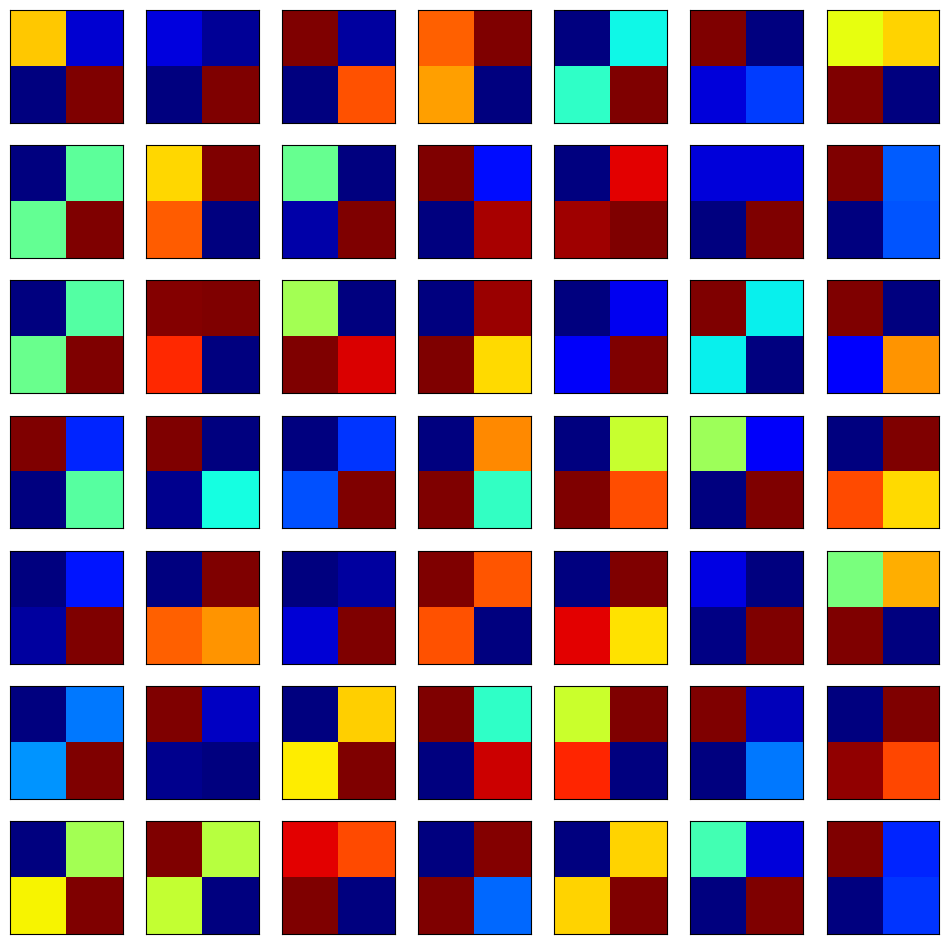

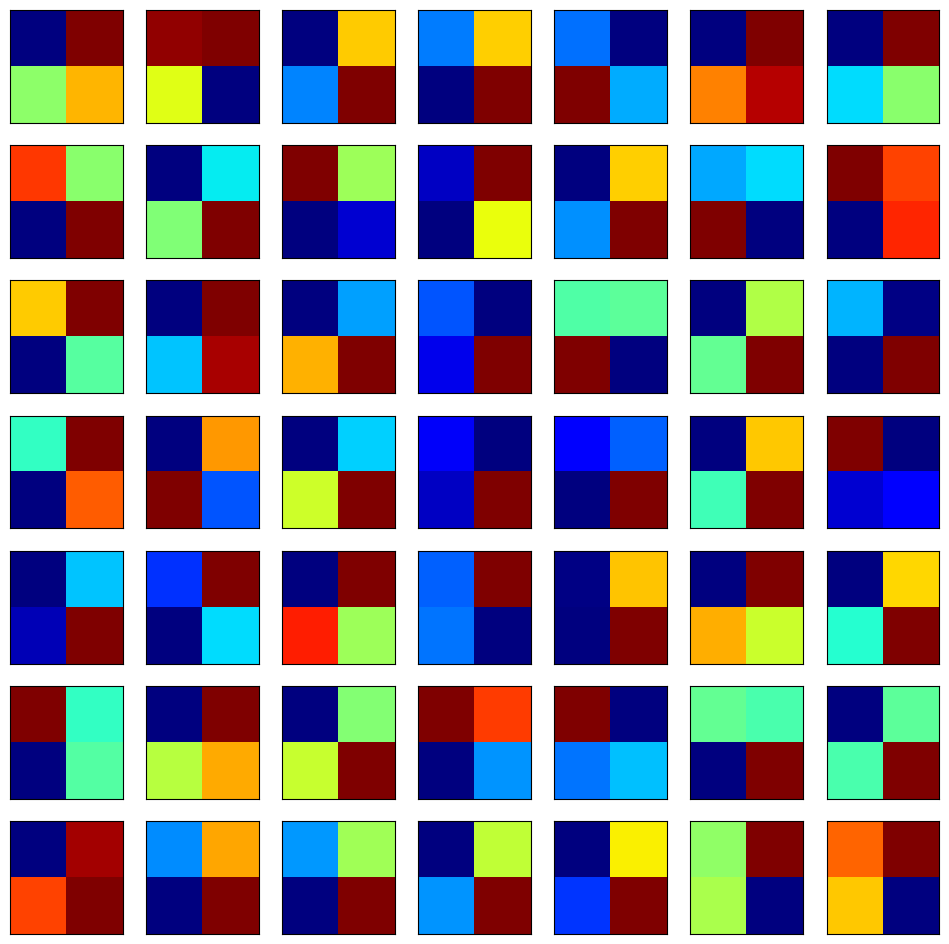

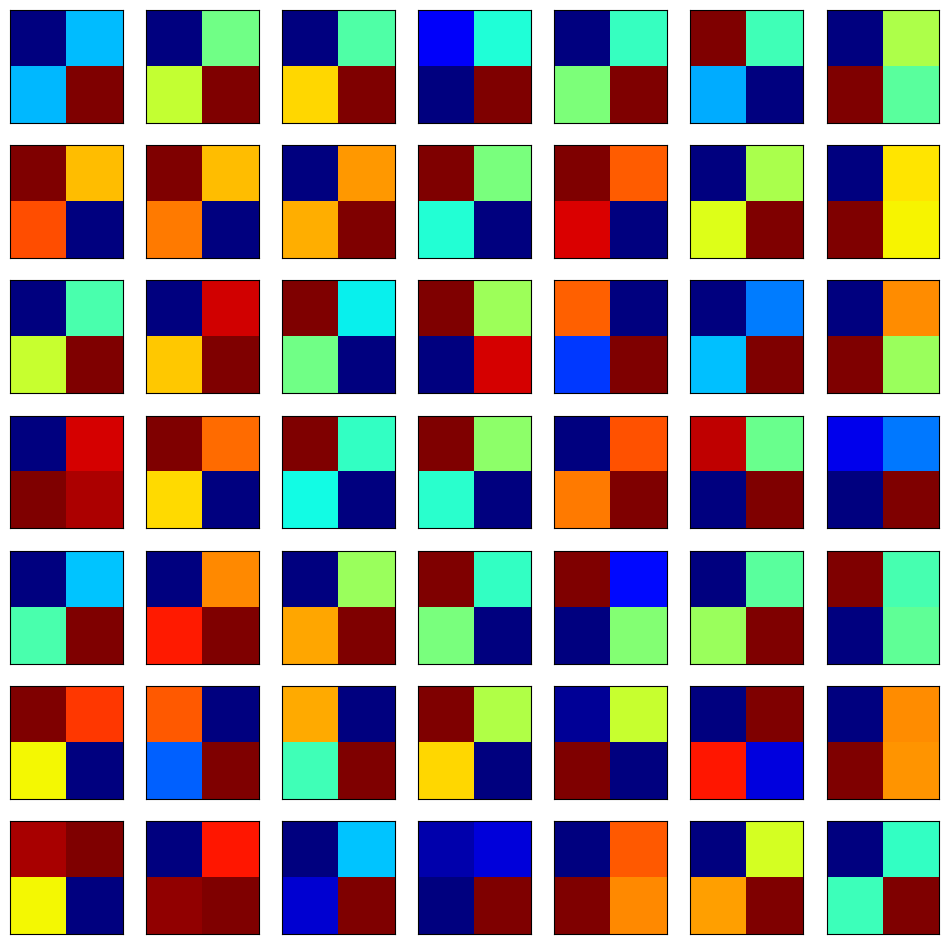

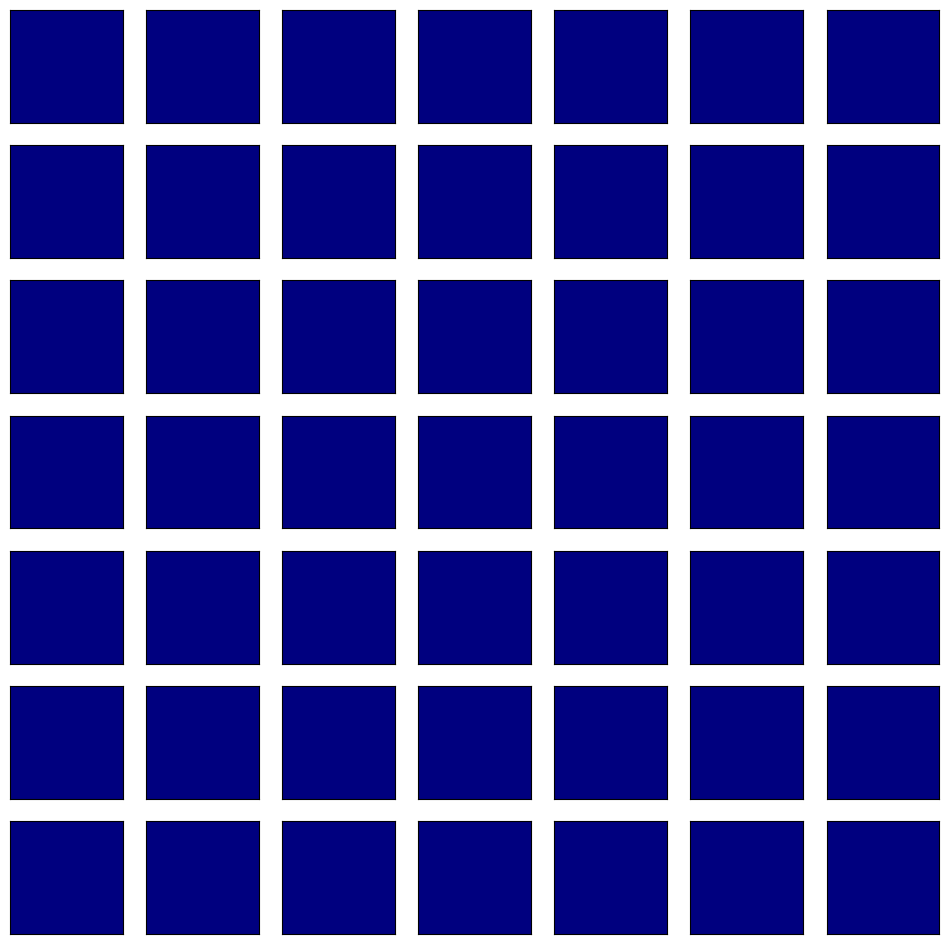

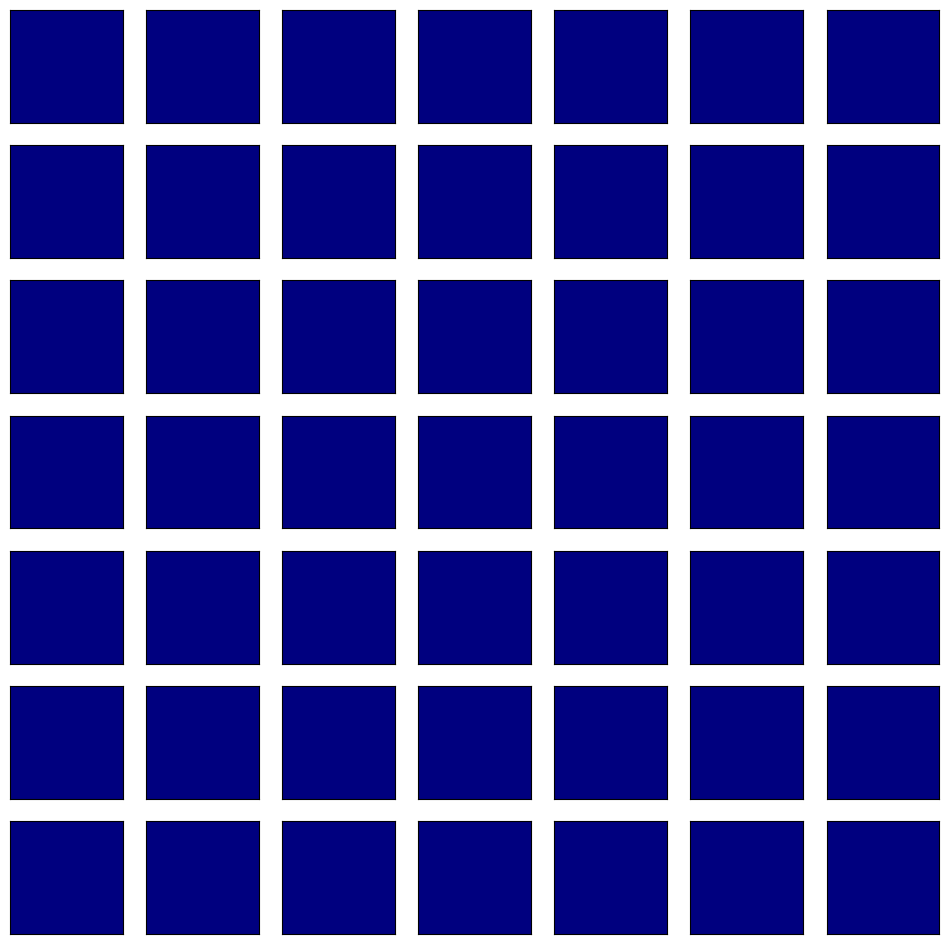

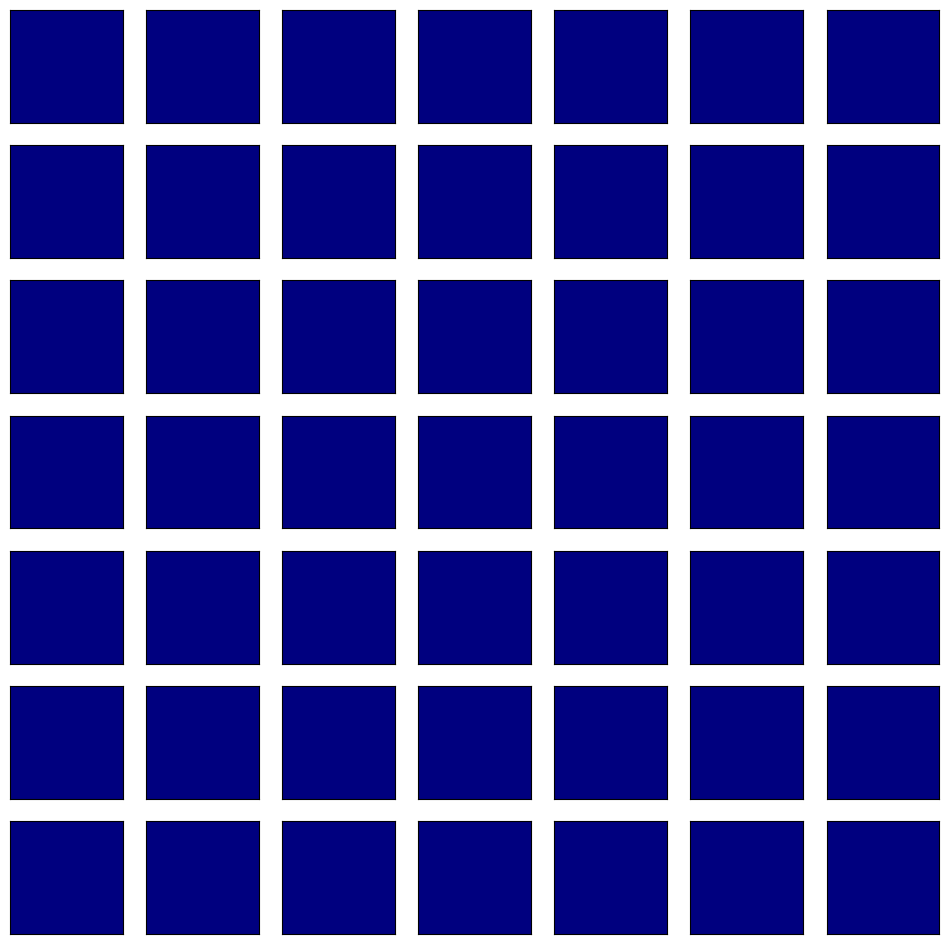

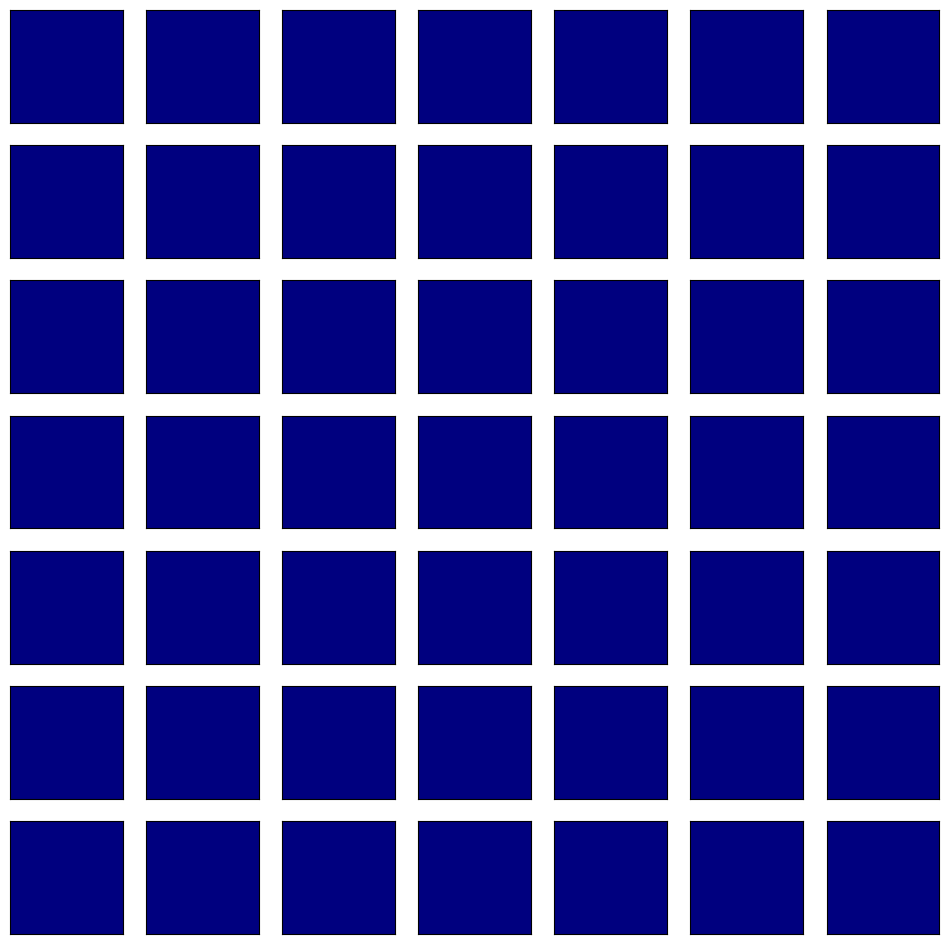

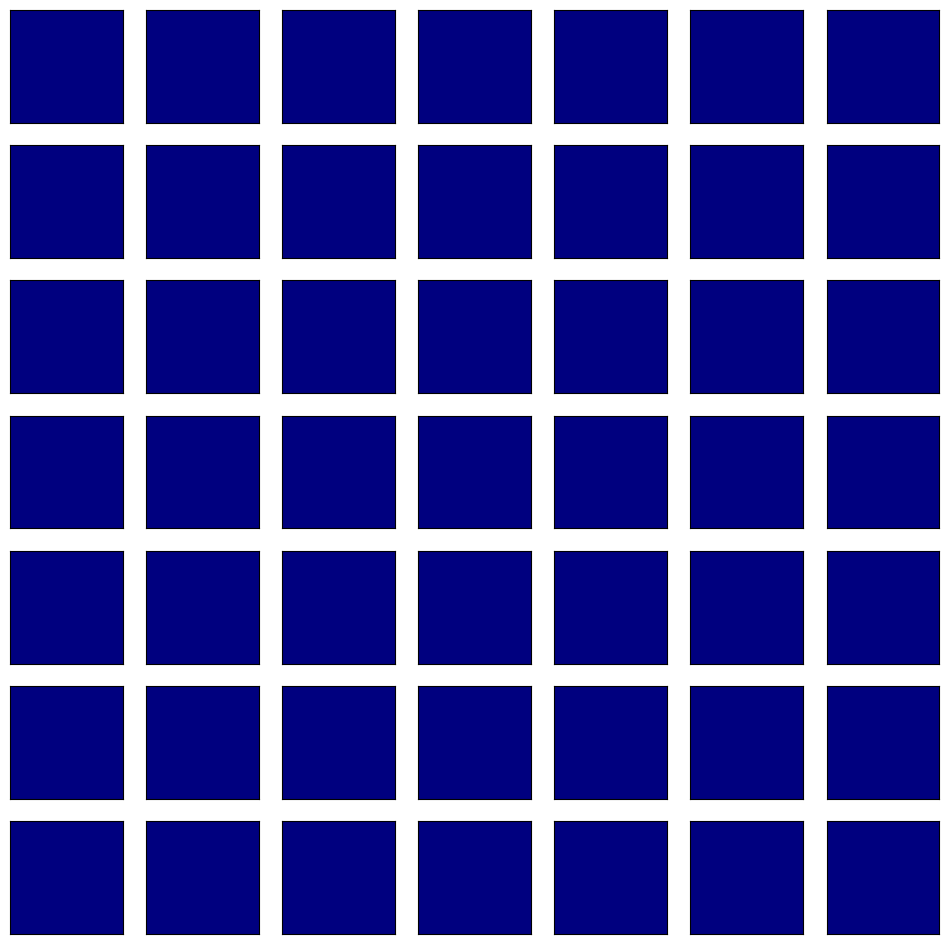

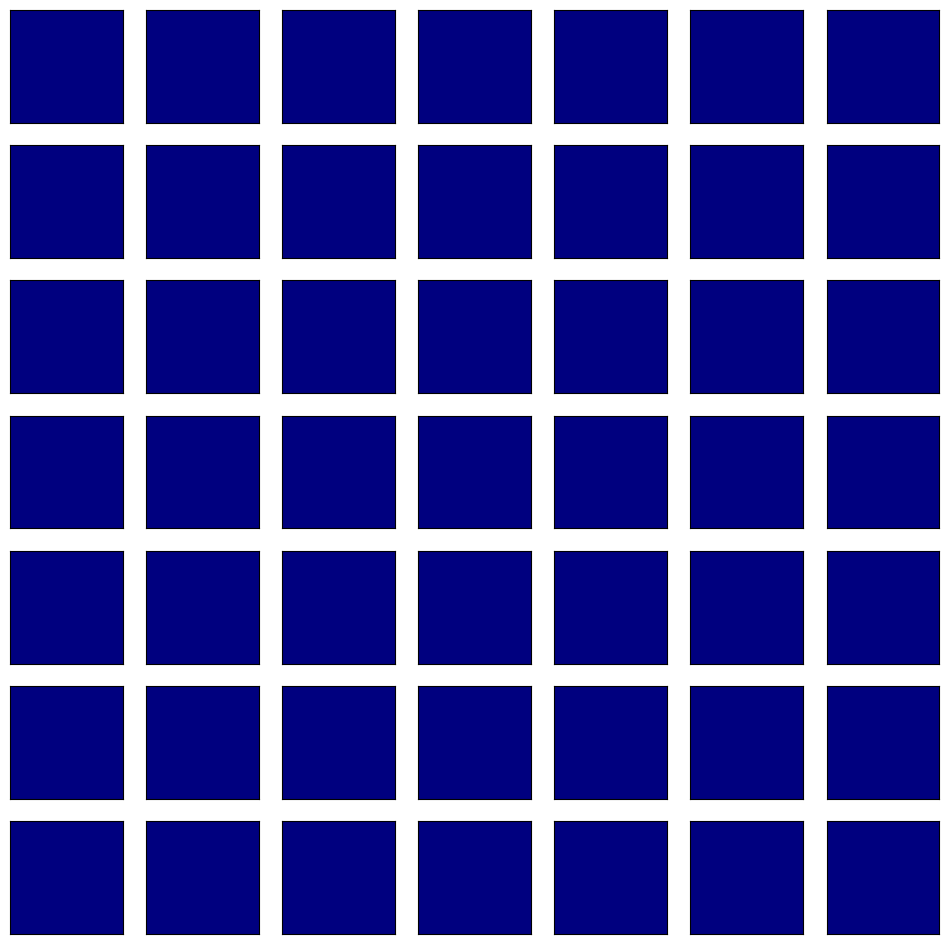

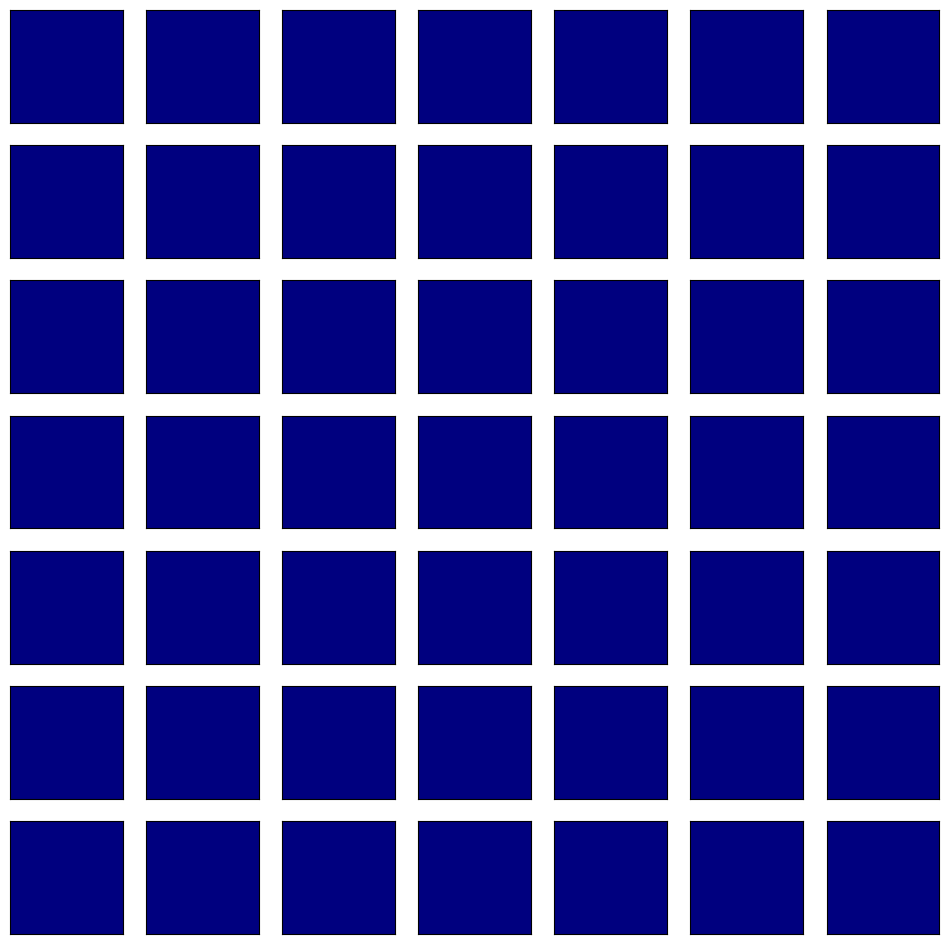

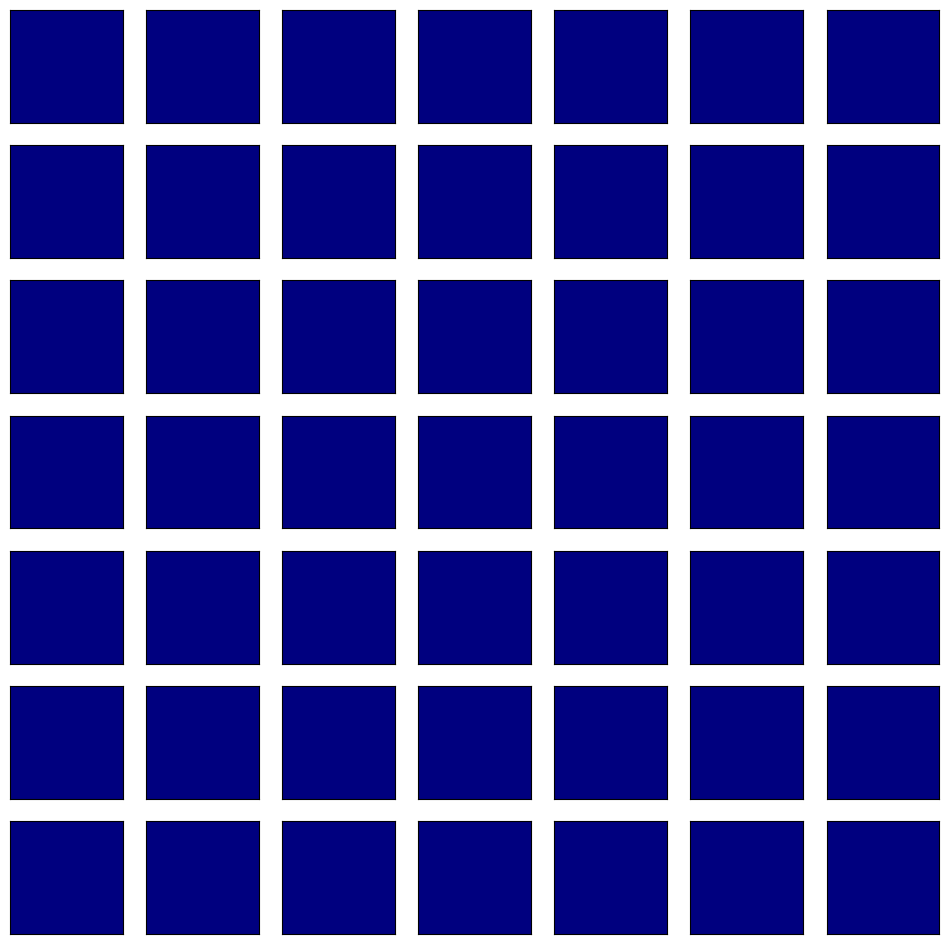

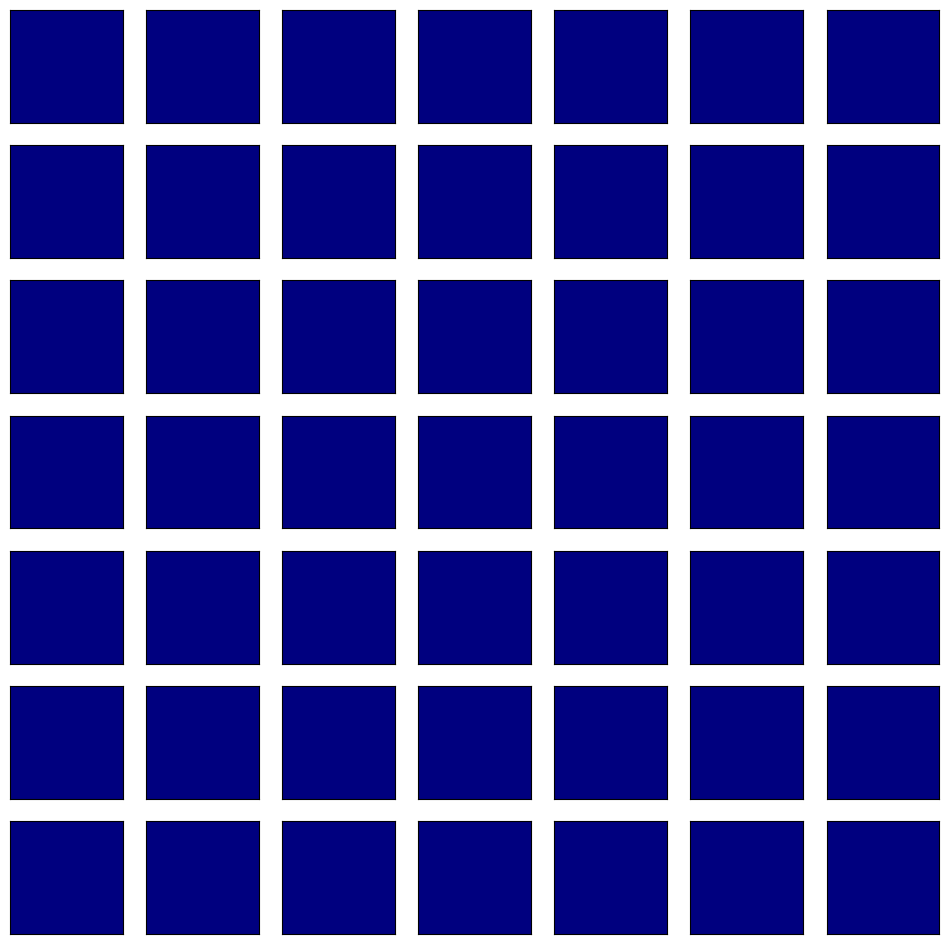

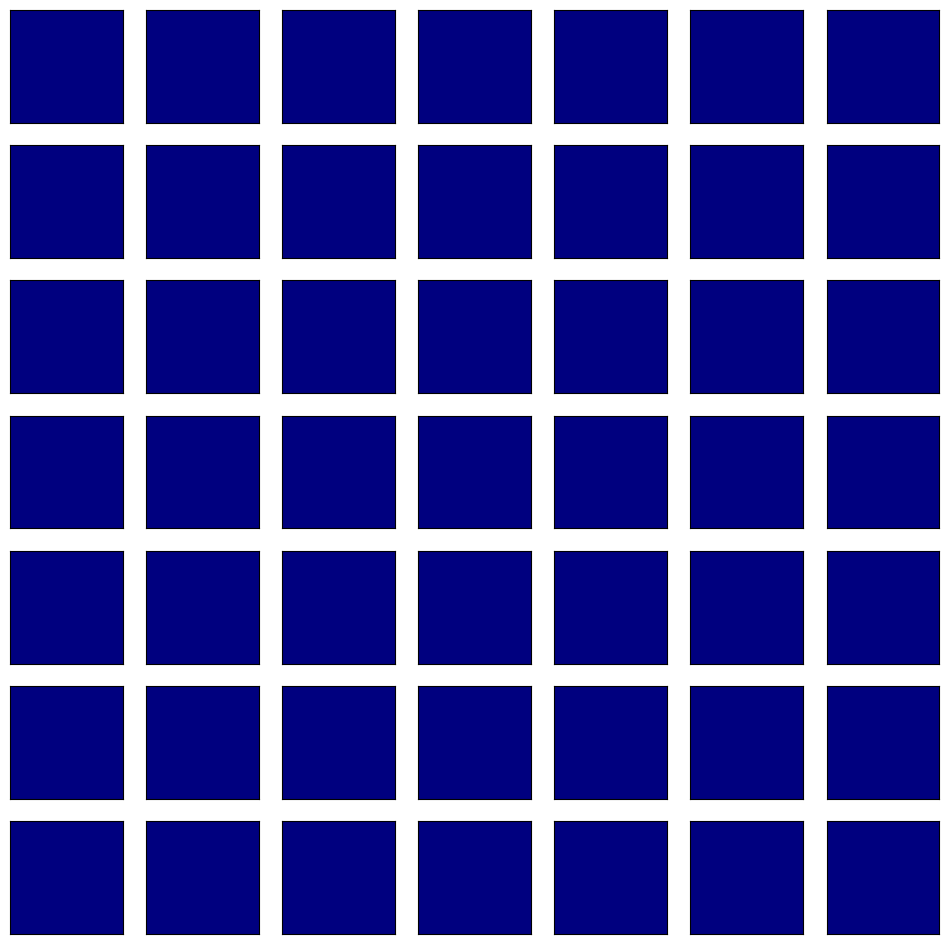

In [ ]:
conv_layer_index = []

for i, layer in enumerate(model.layers):
  if 'Conv2D' in layer.__class__.__name__ or 'Convolution2D' in layer.__class__.__name__:
    conv_layer_index.append(i)

print(len(conv_layer_index))

# Broad Feature Maps
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs = model.inputs, outputs = outputs)

img = np.expand_dims(X_train[img_index], axis=0)

feature_output = model_short.predict(img)

rows = int(math.sqrt(len(conv_layer_index)))
columns = rows

for ftr in feature_output:
  fig = plt.figure(figsize = (12, 12))
  for i in range(1, columns*rows+1):
    fig = plt.subplot(rows, columns, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(ftr[0, :, :, i-1], cmap = 'jet')

  plt.show()

In [ ]:
# Refined Feature Maps

def visualize_activation(model, layer_index, x, img_index, plt_title, max_channel = 4):
  layer_model = Model(inputs=model.inputs, outputs=model.layers[conv_layer_index[layer_index]].output)

  img = np.expand_dims(x[img_index], axis=0)

  layer_activations = layer_model.predict(img)

  num_channels = min(layer_activations.shape[-1], max_channel)

  if num_channels < 4:
    num_rows = 2
  else:
    num_rows = int(math.sqrt(num_channels))
  num_cols = num_rows

  fig, _ = plt.subplots(num_rows, num_cols, figsize=(15, 15))

  plt.xticks([])
  plt.yticks([])

  for channel_index in range(num_channels):
    plt.subplot(num_rows, num_cols, channel_index+1)
    plt.imshow(layer_activations[0, :, :, channel_index], cmap='jet')

  fig.suptitle(f"{plt_title} - Conv Layer {layer_index} - Visualize Activation", fontsize=16)
  plt.show()

def visualize_filter_channels(model, layer_index, filter_index, filter_size, plt_title, max_channel = 4):
  layer = model.layers[conv_layer_index[layer_index]]

  if 'conv' not in layer.name:
    print("The specified layer is not a convolutional layer.")
    return

  if not layer.get_weights():
    print("No weights found in the specified layer.")
    return

  filters, _ = layer.get_weights()
  selected_filter = filters[:, :, :, filter_index]

  filters -= filters.min()
  filters /= filters.max()

  num_channels = min(selected_filter.shape[-1], max_channel)

  if num_channels < 4:
    num_rows = 2
  else:
    num_rows = int(math.sqrt(num_channels))
  num_cols = num_rows

  fig, _ = plt.subplots(num_rows, num_cols, figsize=(15, 15))

  plt.xticks([])
  plt.yticks([])

  for channel_index in range(num_channels):
    plt.subplot(num_rows, num_cols, channel_index+1)
    plt.imshow(selected_filter[:, :, channel_index], cmap='jet')

  fig.suptitle(f"{plt_title} - Conv Layer {layer_index} - Visualize Filter", fontsize=16)
  plt.show()

def get_num_filters(model, layer_index):
  layer = model.layers[conv_layer_index[layer_index]]

  if 'conv' not in layer.name:
    return 0
  weights = layer.get_weights()
  if not weights:
    return 0
  filters, _ = weights
  return filters.shape[-1]-1

def get_filter_size(model, layer_index):
  layer = model.layers[conv_layer_index[layer_index]]

  if 'conv' not in layer.name:
    return None
  weights = layer.get_weights()
  if not weights:
    return None
  filters, _ = weights
  return filters.shape[:2]

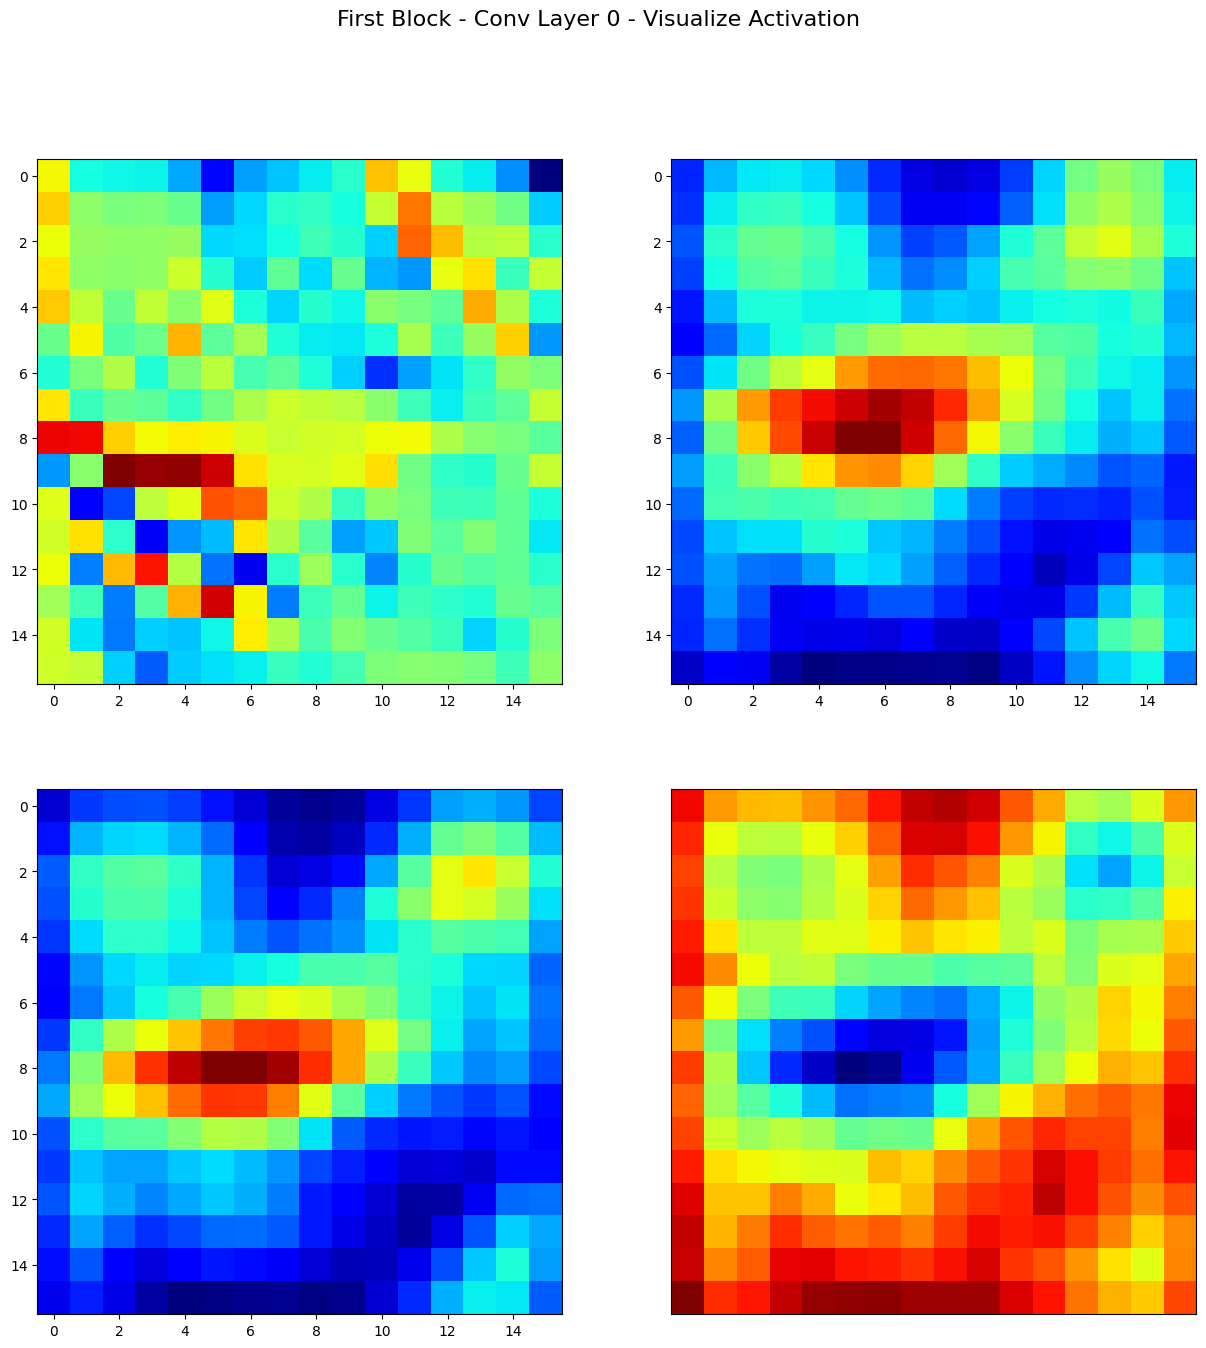

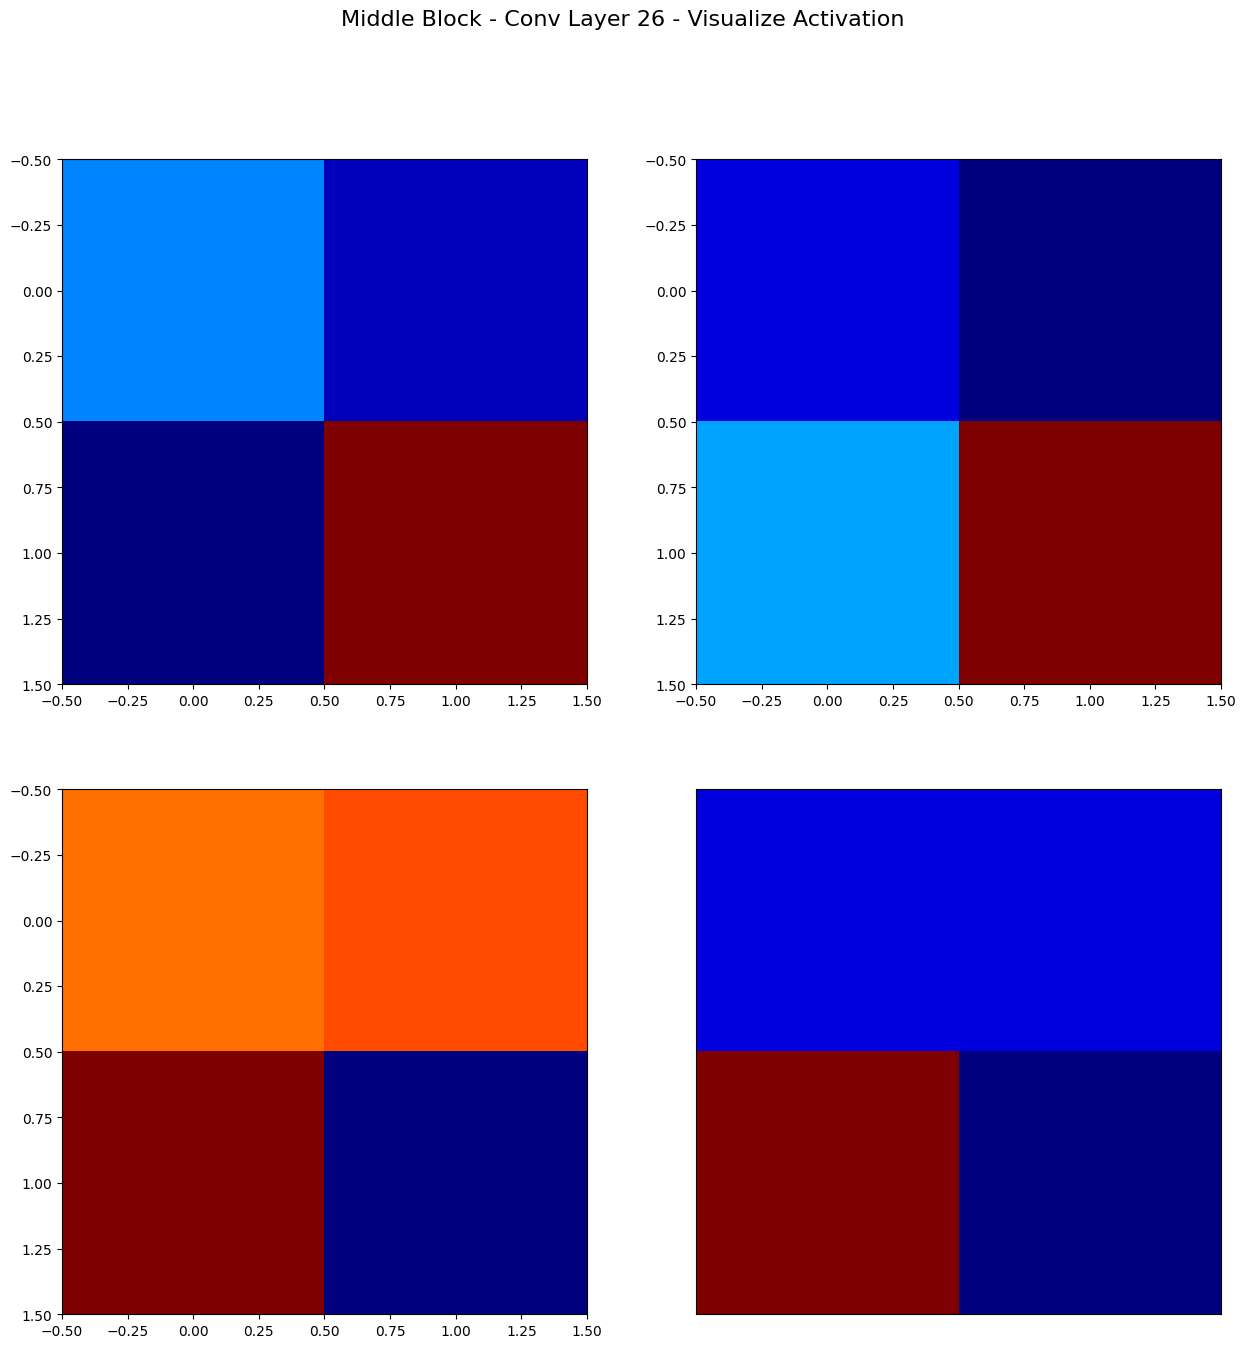

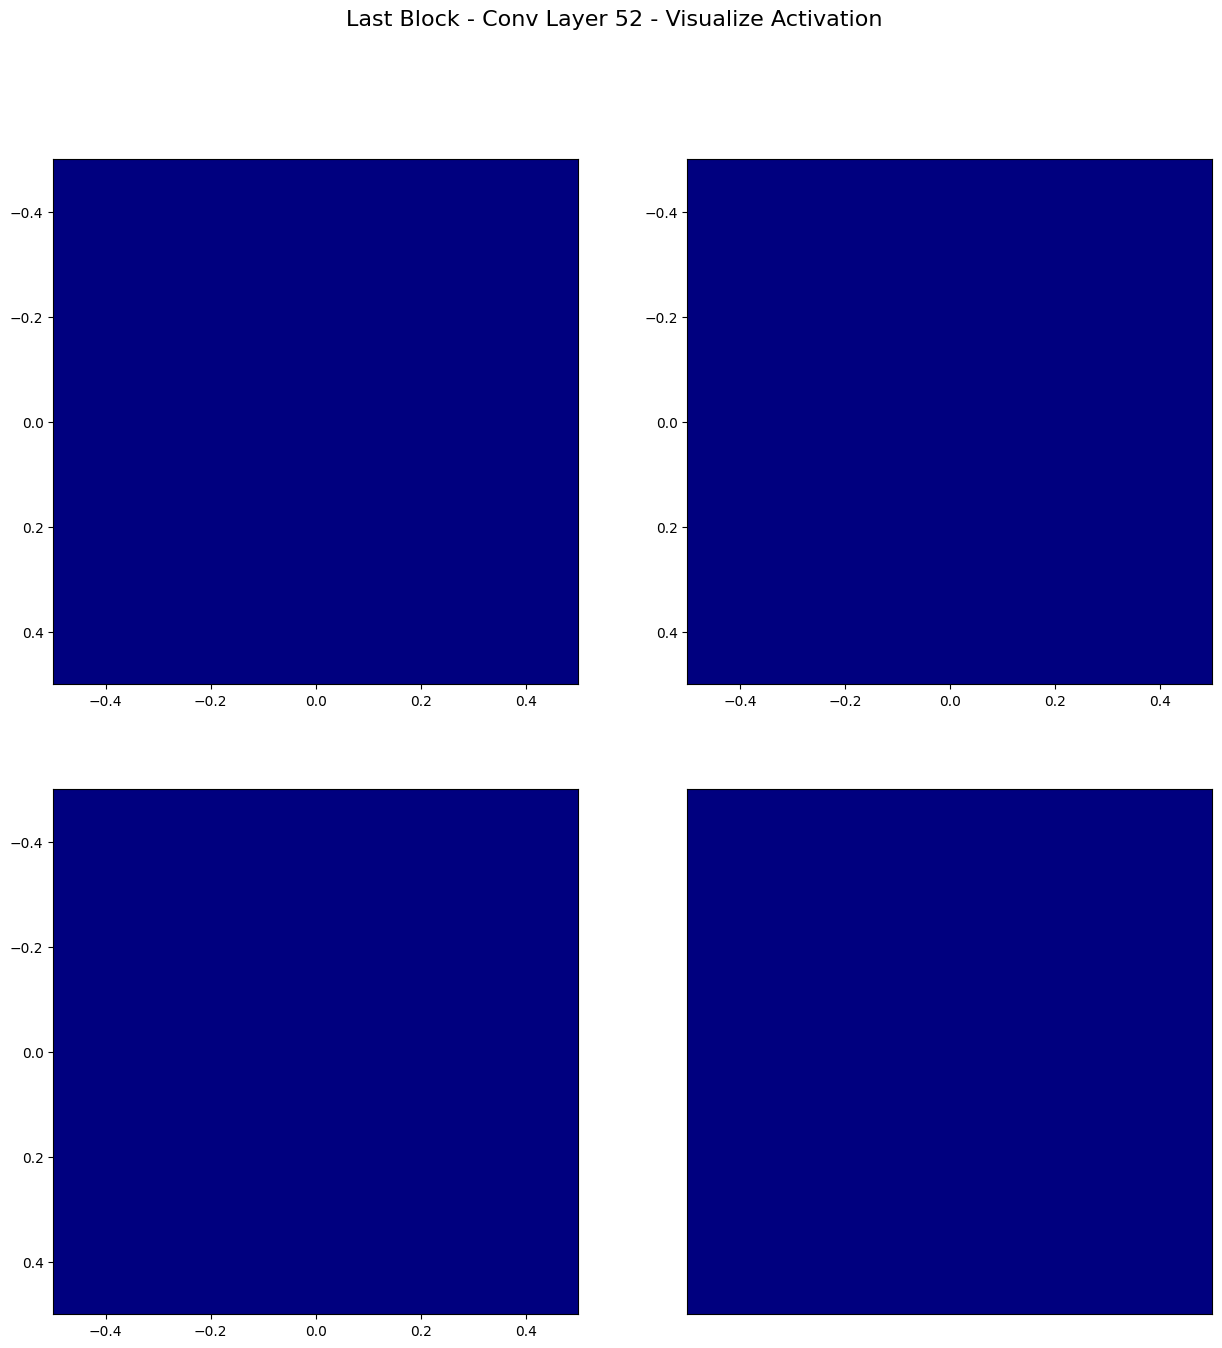

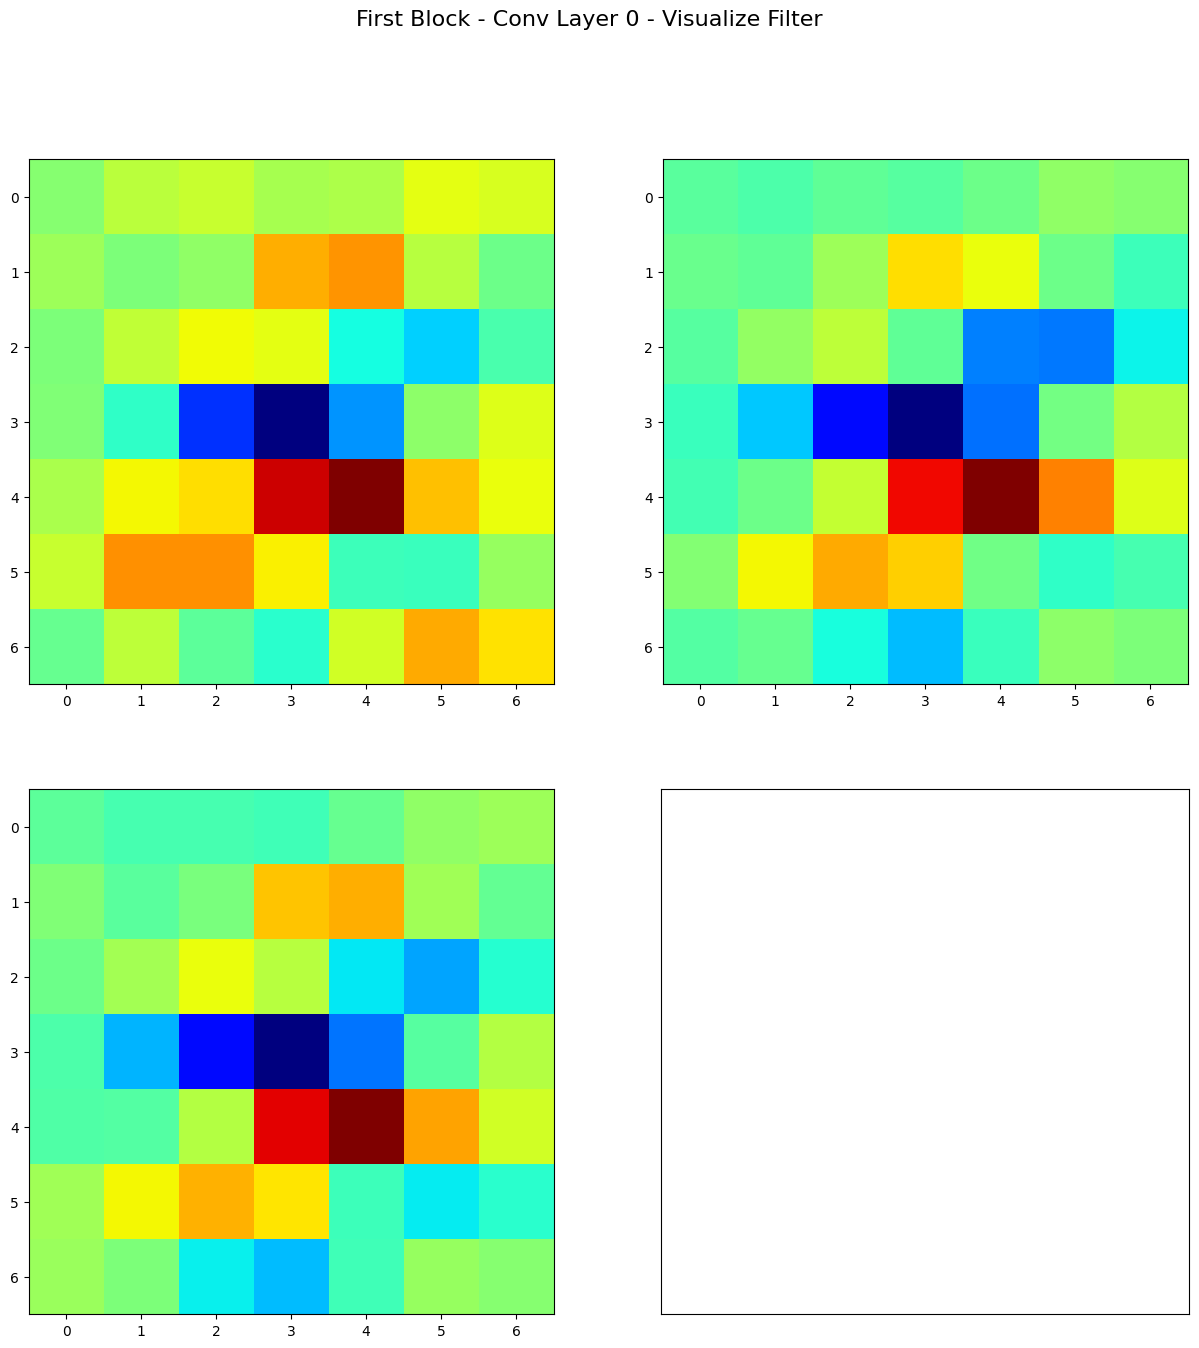

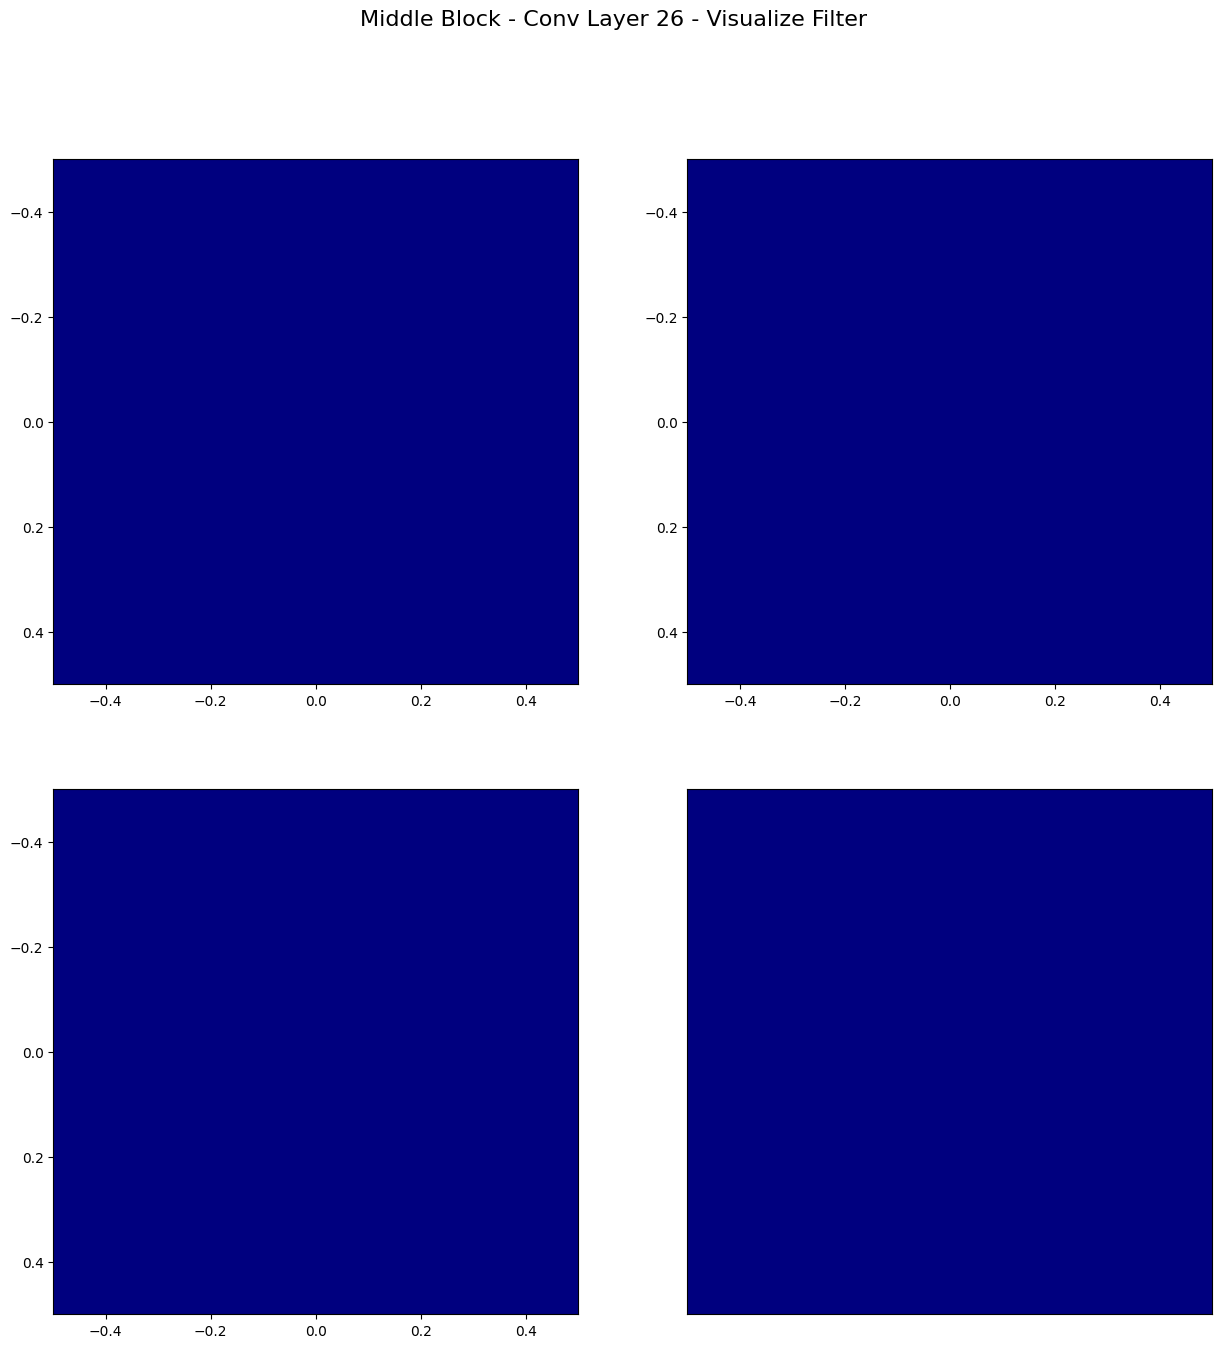

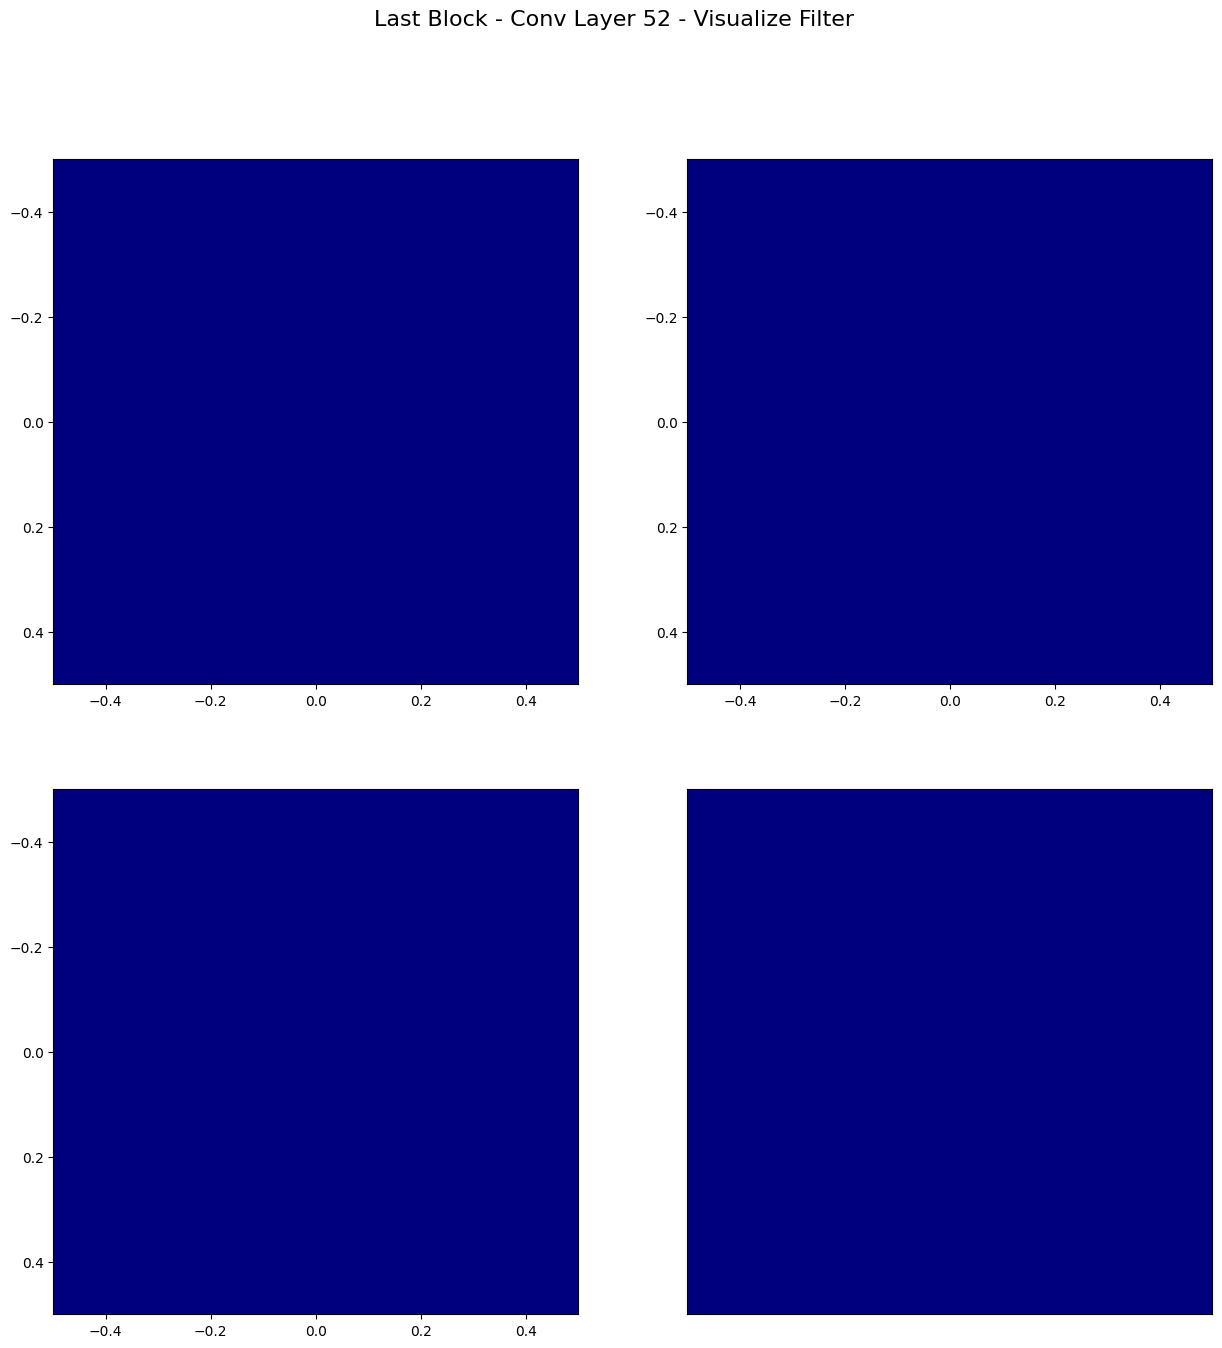

In [ ]:
first_layer = 0
mid_layer = len(conv_layer_index)//2
last_layer = len(conv_layer_index)-1

visualize_activation(model, first_layer, X_train, img_index, "First Block")
visualize_activation(model, mid_layer, X_train, img_index, "Middle Block")
visualize_activation(model, last_layer, X_train, img_index, "Last Block")

visualize_filter_channels(model, first_layer, get_num_filters(model, first_layer), get_filter_size(model, first_layer), "First Block")
visualize_filter_channels(model, mid_layer, get_num_filters(model, mid_layer), get_filter_size(model, mid_layer), "Middle Block")
visualize_filter_channels(model, last_layer, get_num_filters(model, last_layer), get_filter_size(model, last_layer), "Last Block")

In [ ]:
def generate_class_activation_heatmap(model, layer_index, x, img_index):
  img = np.expand_dims(x[img_index], axis=0)

  preds = model.predict(img)
  class_idx = np.argmax(preds[0])

  conv_layer = model.layers[conv_layer_index[layer_index]]
  grads = K.gradients(model.output[:, class_idx], conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img])

  for i in range(conv_layer.output_shape[-1]):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)

  max_value = np.max(heatmap)
  if max_value != 0:
    heatmap /= max_value

  heatmap = np.nan_to_num(heatmap)

  heatmap_min = np.min(heatmap)
  heatmap_max = np.max(heatmap)

  if heatmap_max != heatmap_min:
    heatmap = (heatmap - heatmap_min) / (heatmap_max - heatmap_min)

  return heatmap

def show_heatmap(heatmap, x, img_index, title, max_channel = 4):
  img = x[img_index]

  if np.isnan(heatmap).any() or np.isinf(heatmap).any():
    print("WARNING: NaN or inf values found in heatmap.")
    heatmap = np.nan_to_num(heatmap)

  plt.figure(figsize = (8, 8))

  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)
  plt.imshow(heatmap, cmap='jet', alpha = 0.5)

  plt.title(f"{title} - Heatmap", fontsize=16)
  plt.show()

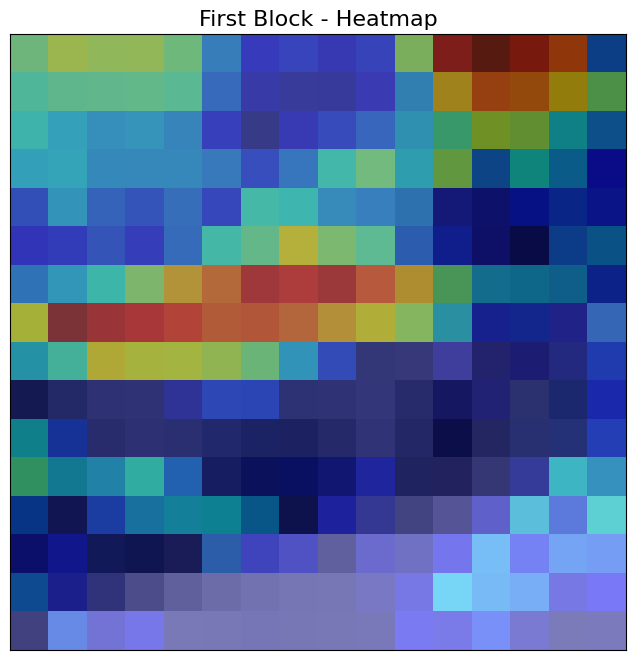

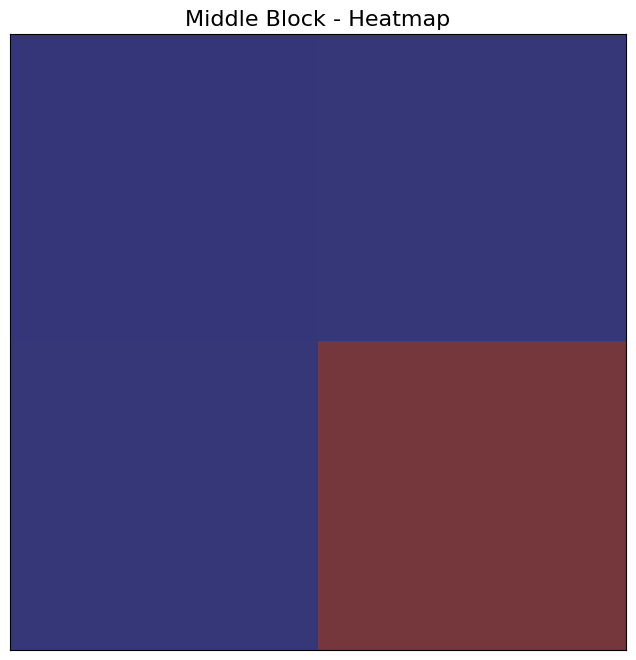

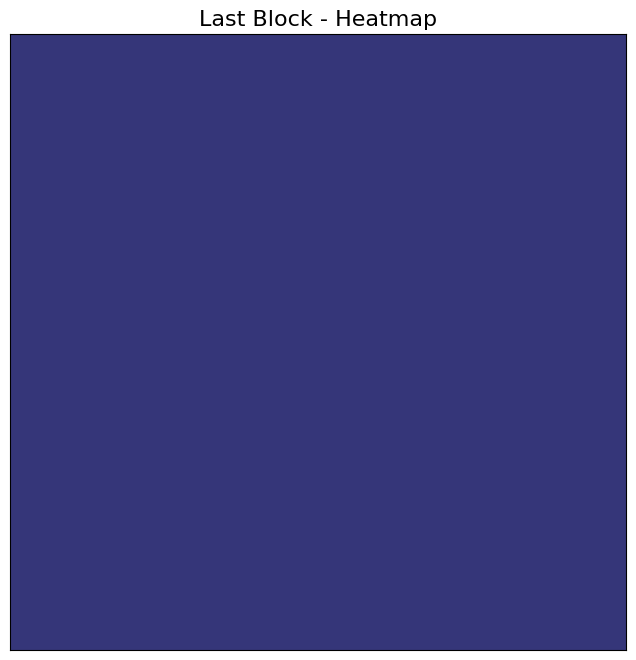

In [ ]:
heatmap_first = generate_class_activation_heatmap(model, first_layer, X_train,  img_index)
heatmap_mid = generate_class_activation_heatmap(model, mid_layer, X_train, img_index)
heatmap_last = generate_class_activation_heatmap(model, last_layer, X_train, img_index)

show_heatmap(heatmap_first, X_train, img_index, "First Block")
show_heatmap(heatmap_mid, X_train, img_index, "Middle Block")
show_heatmap(heatmap_last, X_train, img_index, "Last Block")

In [ ]:
'''

Creates a custom CNN

# Convolutional NN
def add_conv(cnn, padding, filter_num, kernel_size, activation_type, img_size_x, img_size_y, first = False):
  rgb = 3
  if first:
    cnn.add(ZeroPadding2D(padding, input_shape = (img_size_x,img_size_y,rgb)))
  else:
    cnn.add(ZeroPadding2D(padding))
  cnn.add(Conv2D(filter_num, kernel_size = kernel_size, activation = activation_type))

def create_ann_layers(ann, dense_layer_count, dense_layer_size, possible_ans, activation_ans_type = 'sigmoid', activation_type = 'relu'):
  ann.add(Flatten())
  for i in range(dense_layer_count):
    ann.add(Dense(dense_layer_size, activation = activation_type))
    ann.add(Dropout(0.2))
  ann.add(Dense(possible_ans, activation = activation_ans_type))

def create_cnn_layers(cnn, loop_num, dense_layer_count, dense_layer_size, possible_ans, filter_num = 32,
                      activation_ans_type = 'softmax', img_size_x = 32, img_size_y = 32, padding = (1,1),
                      strides_size = (2,2), pooling_size = (2,2), kernel_size = (3,3), activation_type = 'relu'):
  for i in range(loop_num):
    if i == 0:
      add_conv(cnn, padding = padding, filter_num = filter_num, kernel_size = kernel_size, activation_type = activation_type, img_size_x = img_size_x, img_size_y = img_size_y, first = True)

    add_conv(cnn, padding = padding, filter_num = filter_num, kernel_size = kernel_size, activation_type = activation_type, img_size_x = img_size_x, img_size_y = img_size_y)

    if filter_num >= 128 and i < loop_num - 1:
      add_conv(cnn, padding = padding, filter_num = filter_num, kernel_size = kernel_size, activation_type = activation_type, img_size_x = img_size_x, img_size_y = img_size_y)

    cnn.add(MaxPooling2D(pool_size = pooling_size, strides = strides_size))
    filter_num *= 2

  create_ann_layers(cnn, dense_layer_count, dense_layer_size, possible_ans, activation_ans_type)

cnn = Sequential()
create_cnn_layers(cnn, loop_num = 3, dense_layer_count = 1, dense_layer_size = 64, possible_ans = len(np.unique(y_train)))

cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

cnn.fit(X_train, y_train, epochs = 10)

cnn.evaluate(X_test,y_test)
'''

"\n\nCreates a custom CNN\n\n# Convolutional NN\ndef add_conv(cnn, padding, filter_num, kernel_size, activation_type, img_size_x, img_size_y, first = False):\n  rgb = 3\n  if first:\n    cnn.add(ZeroPadding2D(padding, input_shape = (img_size_x,img_size_y,rgb)))\n  else:\n    cnn.add(ZeroPadding2D(padding))\n  cnn.add(Conv2D(filter_num, kernel_size = kernel_size, activation = activation_type))\n\ndef create_ann_layers(ann, dense_layer_count, dense_layer_size, possible_ans, activation_ans_type = 'sigmoid', activation_type = 'relu'):\n  ann.add(Flatten())\n  for i in range(dense_layer_count):\n    ann.add(Dense(dense_layer_size, activation = activation_type))\n    ann.add(Dropout(0.2))\n  ann.add(Dense(possible_ans, activation = activation_ans_type))\n\ndef create_cnn_layers(cnn, loop_num, dense_layer_count, dense_layer_size, possible_ans, filter_num = 32, \n                      activation_ans_type = 'softmax', img_size_x = 32, img_size_y = 32, padding = (1,1), \n                      st

## PS 1.B - 20 points

In [this notebook](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/transfer-learning/transfer_learning_tutorial.html) we showcase _transfer learning_ using a pre-trained CNN model.

Perform the fine-tunning and feature extraction methods of transfer learning using the same model as in PS-1A, for the class `ship`.

Repeat the visualization of PS-1.A before and after  transfer learning and write a conclusive summary as to the relative value of the two methods.

In [ ]:
y_train_binary = (y_train_base == ship_class).astype(int)
y_test_binary = (y_test_base == ship_class).astype(int)

binary_output = Dense(1, activation = 'sigmoid')(model.layers[-2].output)
model_PS1B = Model(inputs = model.inputs, outputs = binary_output)

model_PS1B.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

for layer in model_PS1B.layers[:2]:
  layer.trainable = False

model_PS1B.fit(X_train_base, y_train_binary, epochs = epochs)

loss, accuracy = model_PS1B.evaluate(X_test_base, y_test_binary)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

feature_extractor = Model(inputs = model_PS1B.input, outputs = model_PS1B.layers[-3].output)

features_train = feature_extractor.predict(X_train_base)
features_test = feature_extractor.predict(X_test_base)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 200s 4ms/sample - loss: 0.1453 - accuracy: 0.9454
Epoch 2/10
50000/50000 [==============================] - 189s 4ms/sample - loss: 0.0980 - accuracy: 0.9638
Epoch 3/10
50000/50000 [==============================] - 189s 4ms/sample - loss: 0.0822 - accuracy: 0.9705
Epoch 4/10
50000/50000 [==============================] - 189s 4ms/sample - loss: 0.0709 - accuracy: 0.9753
Epoch 5/10
50000/50000 [==============================] - 188s 4ms/sample - loss: 0.0586 - accuracy: 0.9792
Epoch 6/10
50000/50000 [==============================] - 189s 4ms/sample - loss: 0.0626 - accuracy: 0.9773
Epoch 7/10
50000/50000 [==============================] - 188s 4ms/sample - loss: 0.0389 - accuracy: 0.9859
Epoch 8/10
50000/50000 [==============================] - 187s 4ms/sample - loss: 0.0352 - accuracy: 0.9876
Epoch 9/10
50000/50000 [==============================] - 188s 4ms/sample - loss: 0.0315 - accuracy: 0.9887
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test loss: 0.1065285918224603
Test accuracy: 0.9695


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


53


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


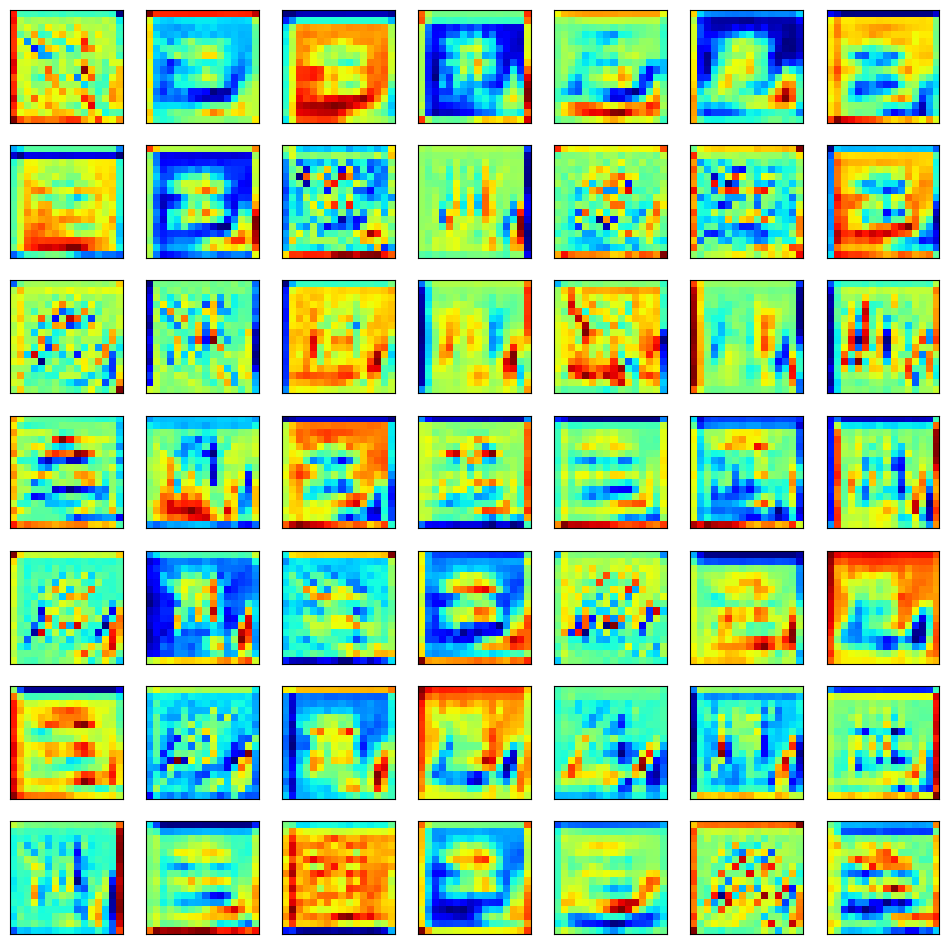

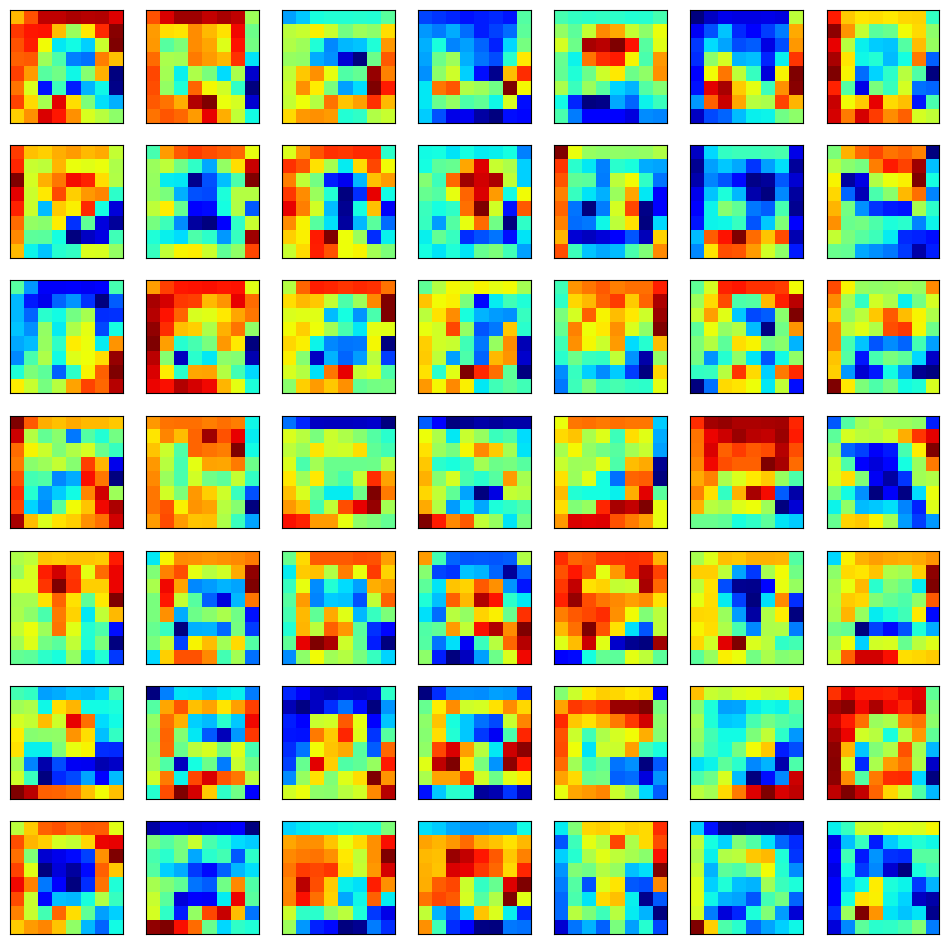

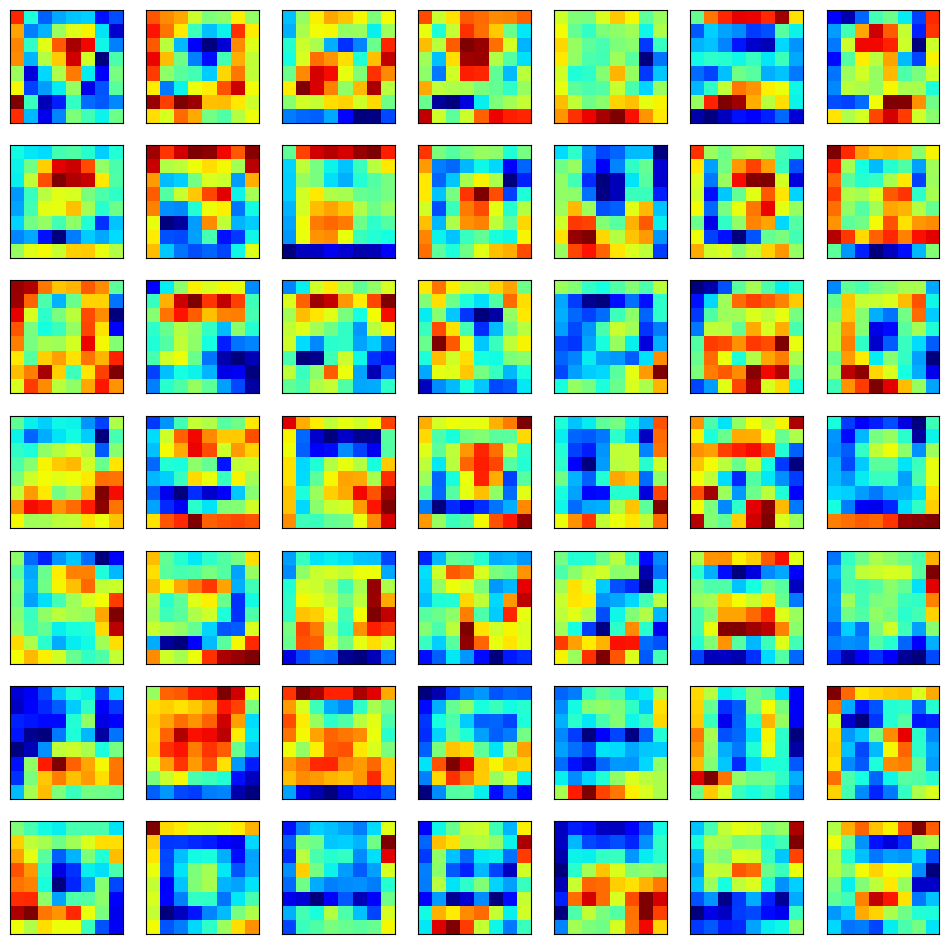

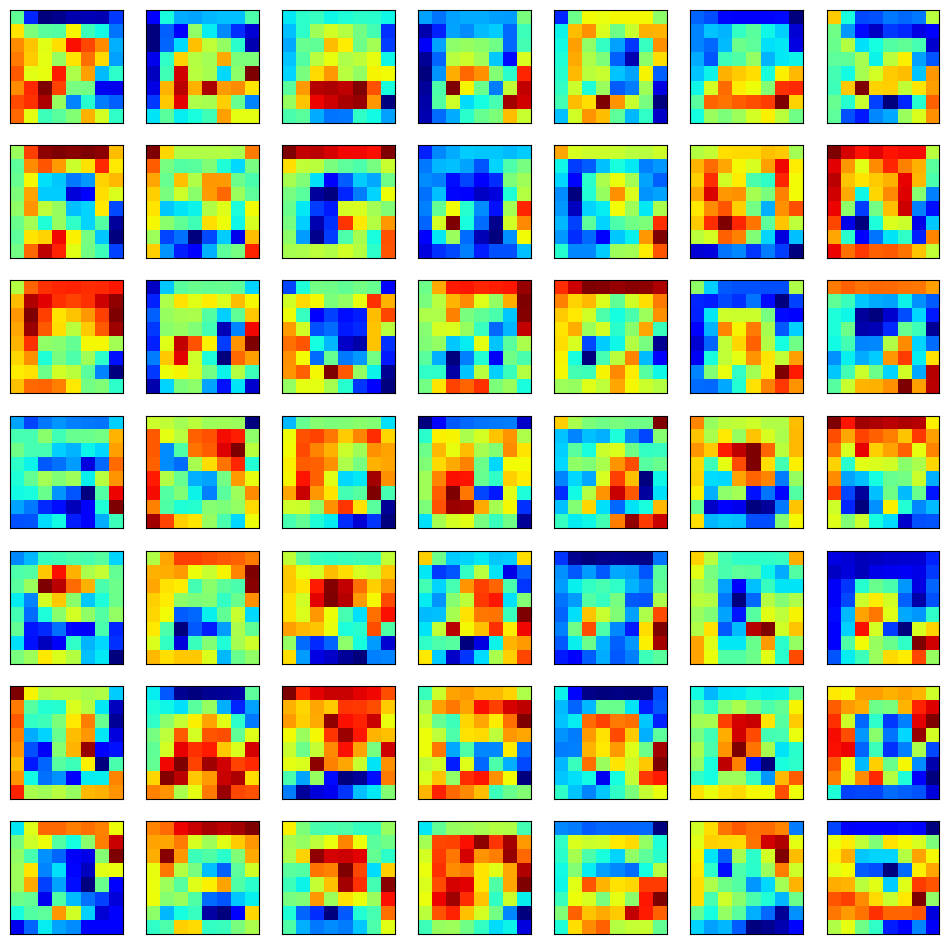

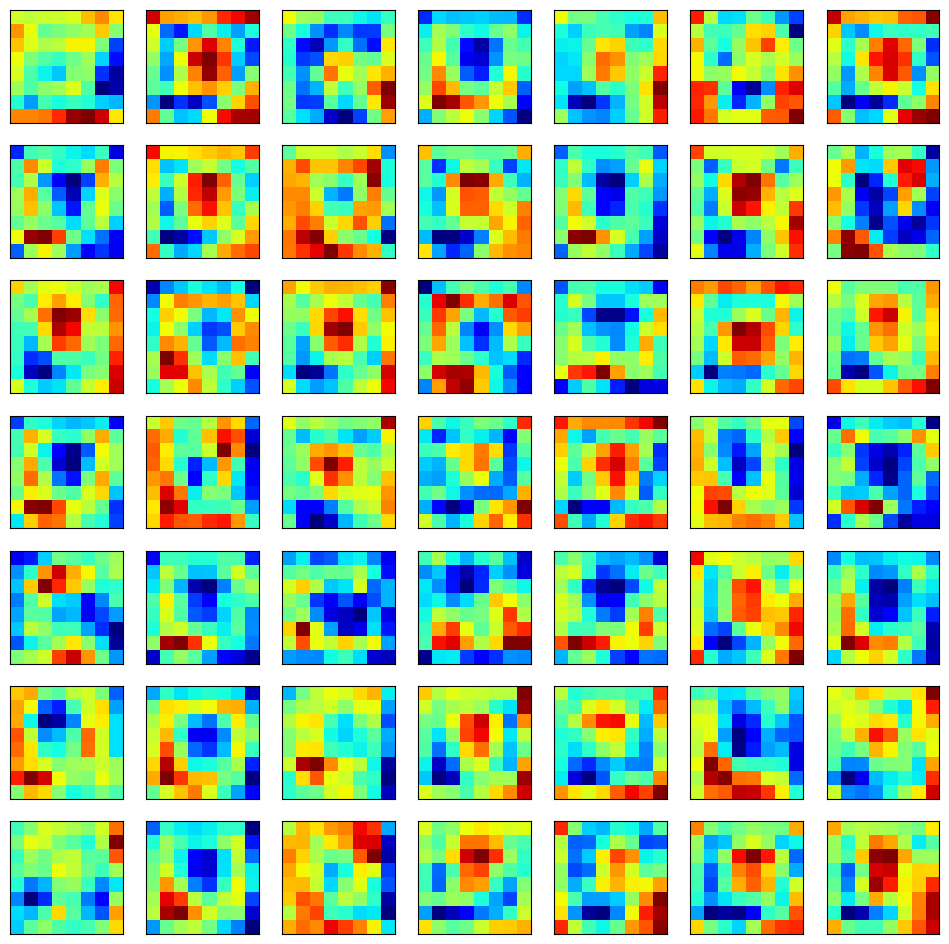

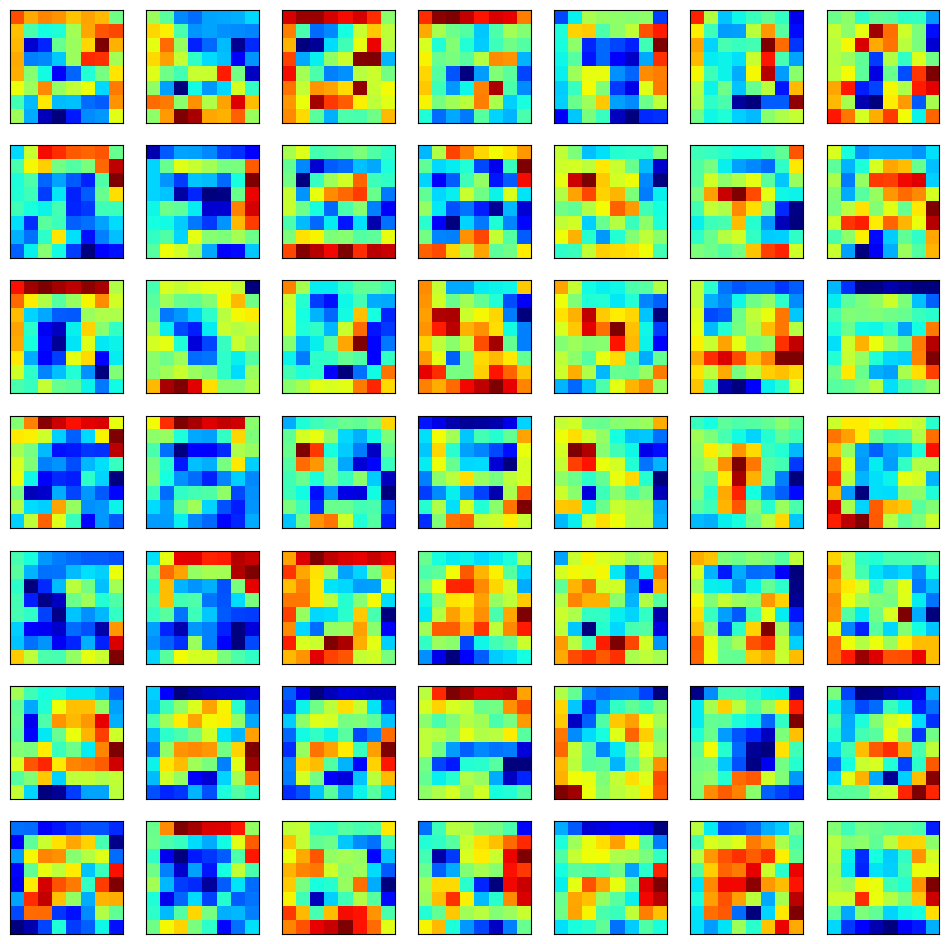

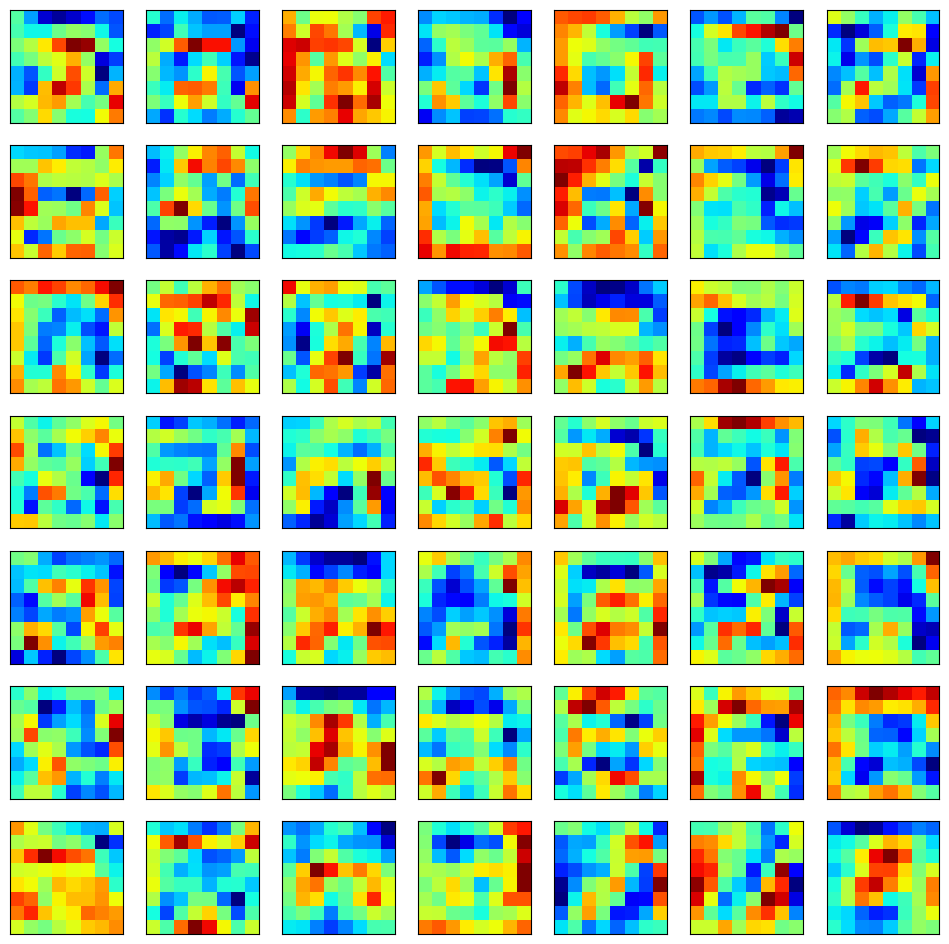

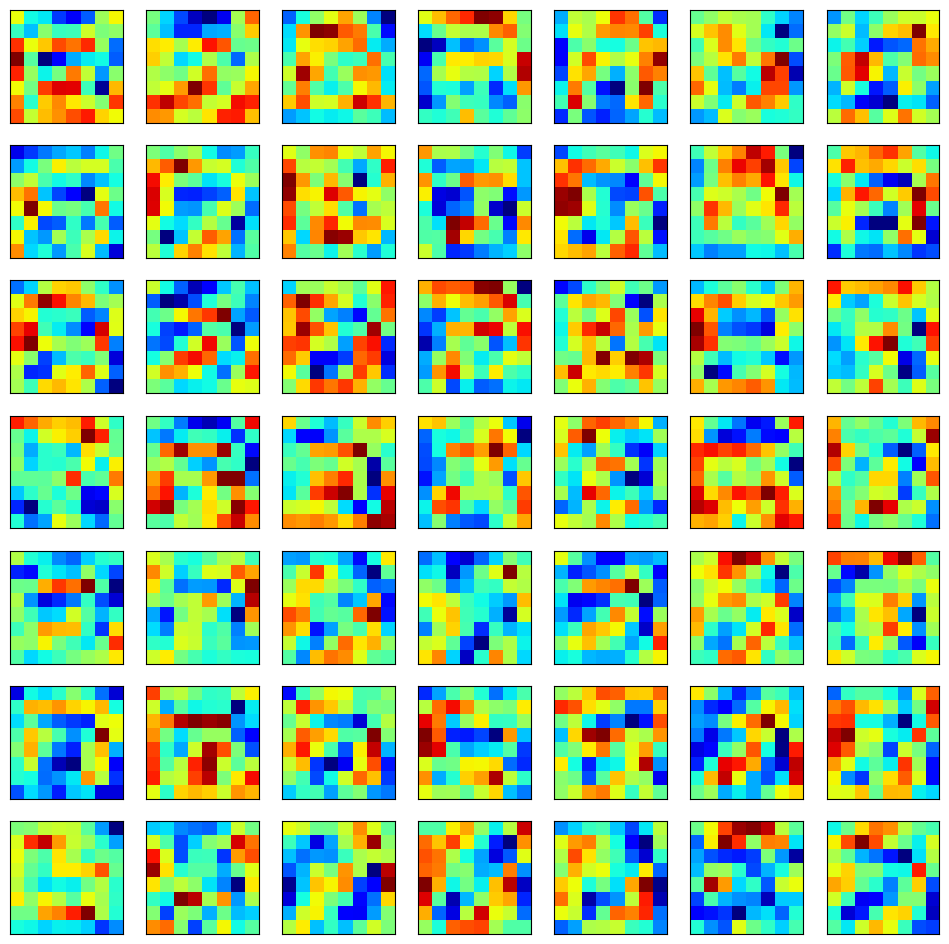

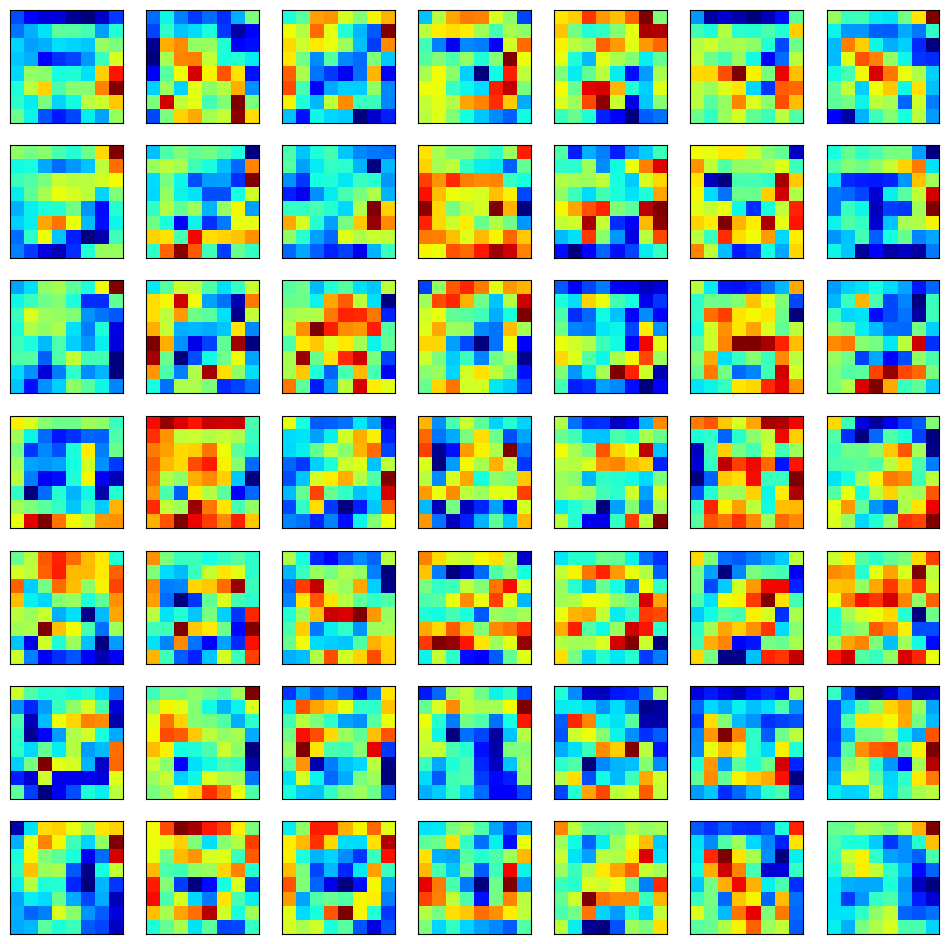

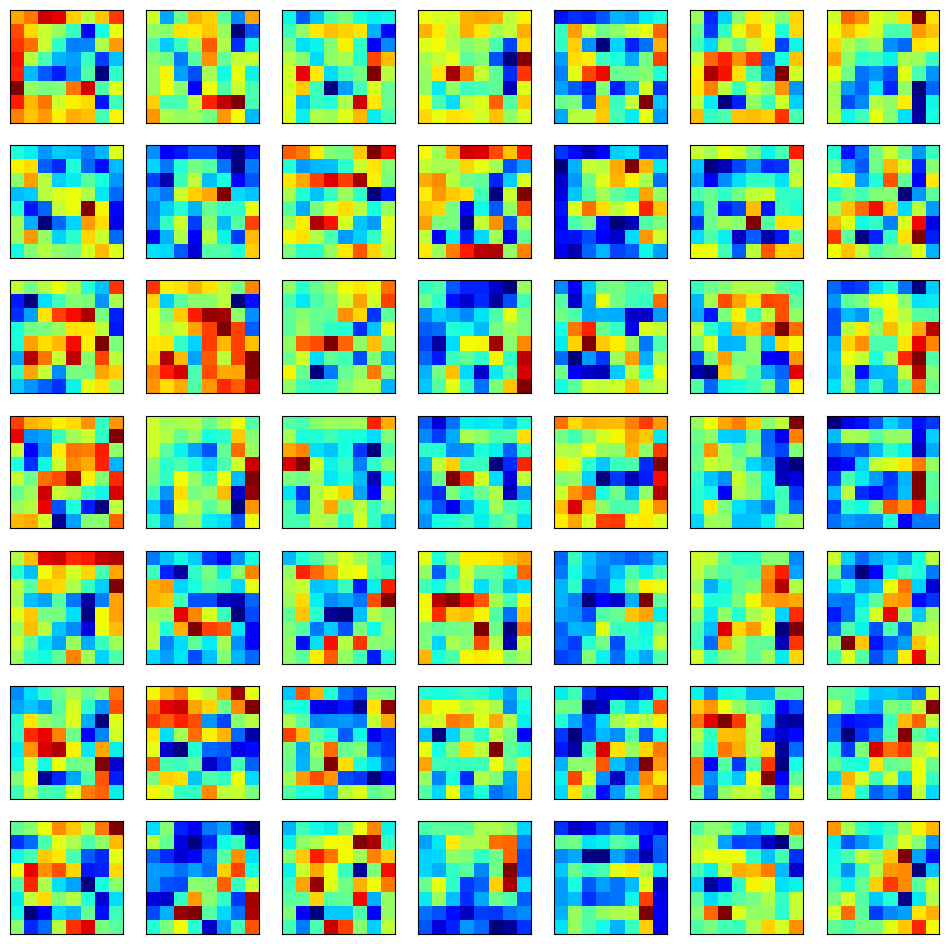

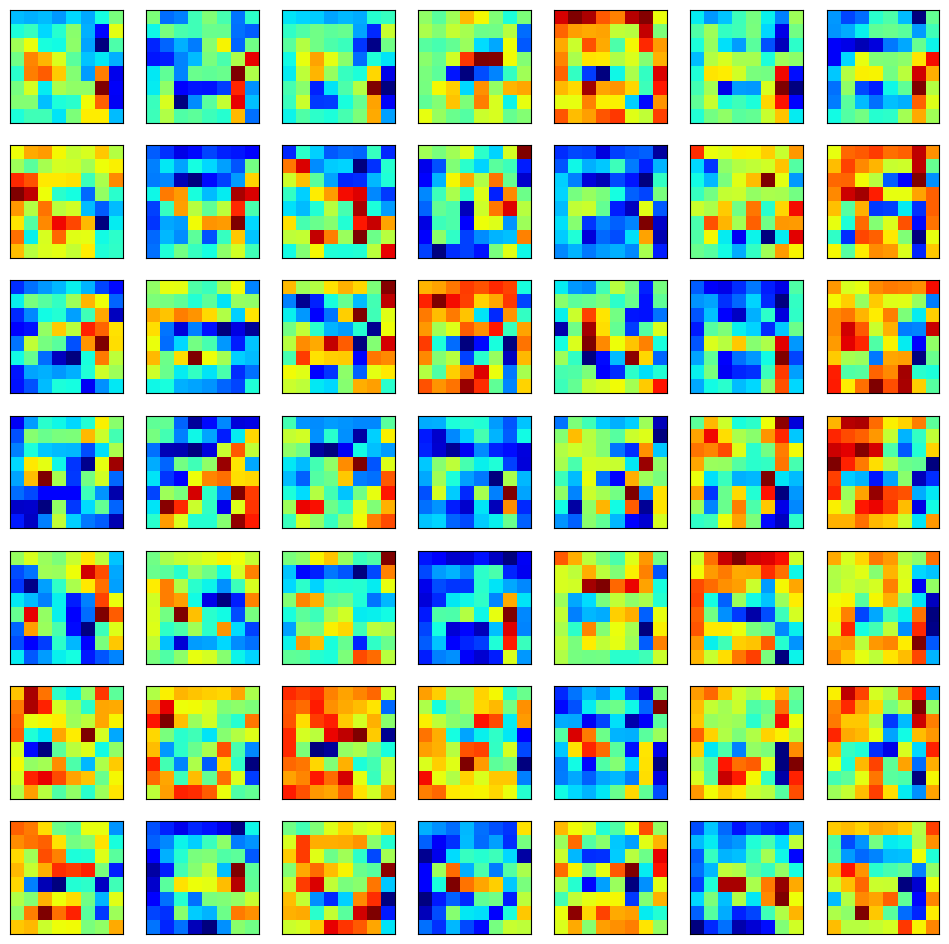

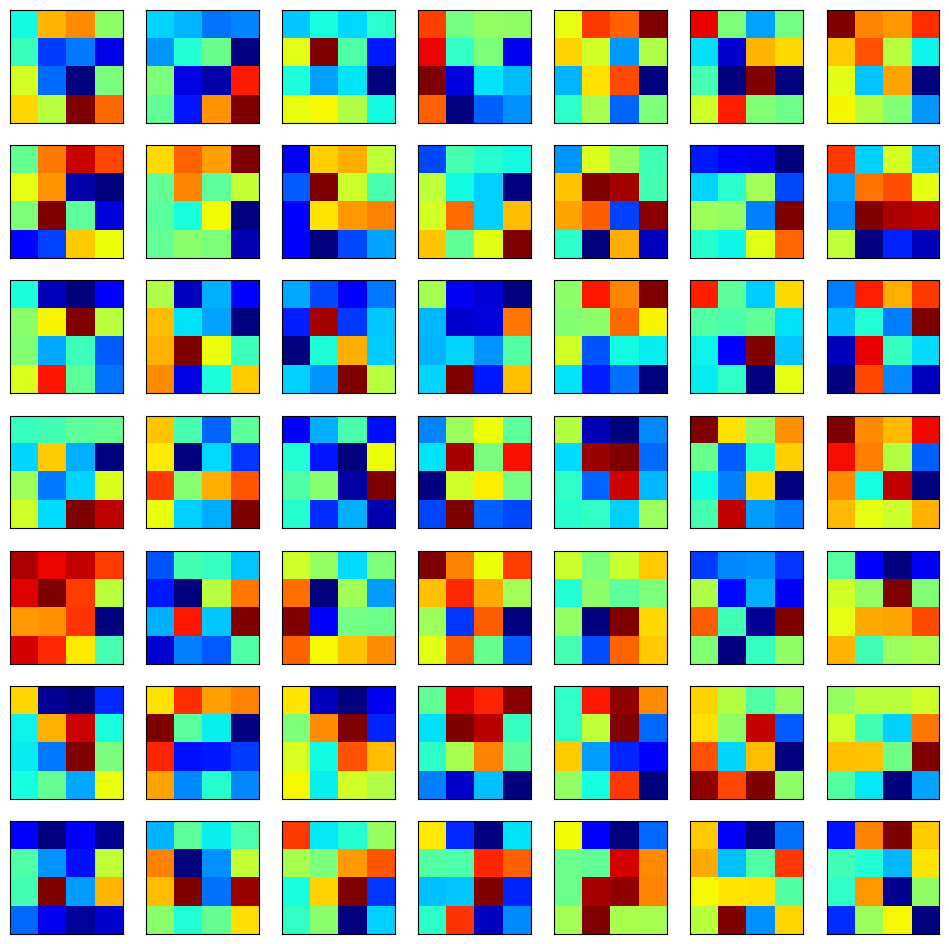

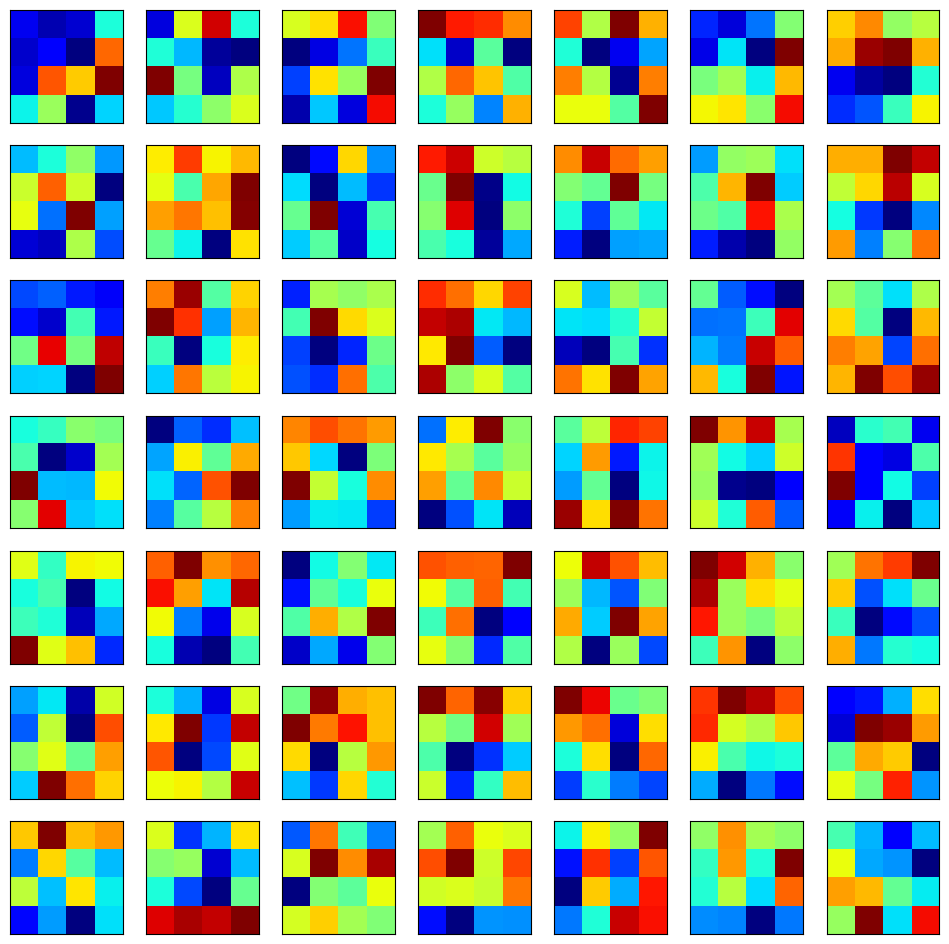

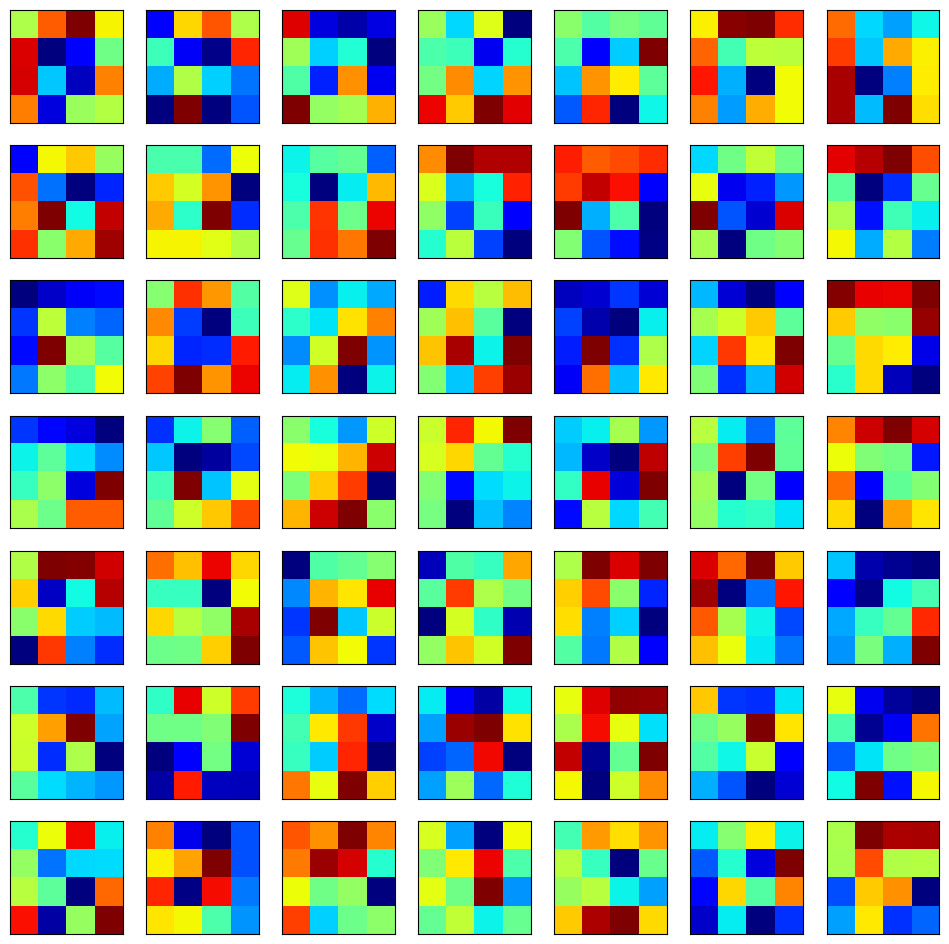

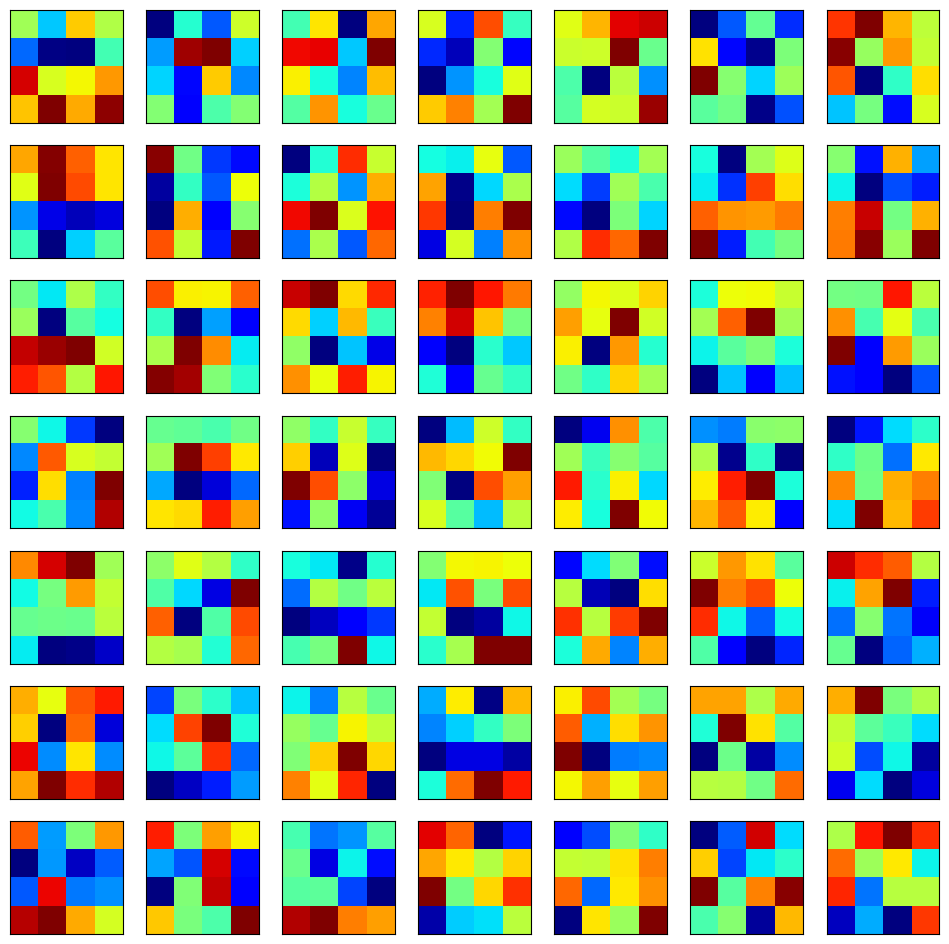

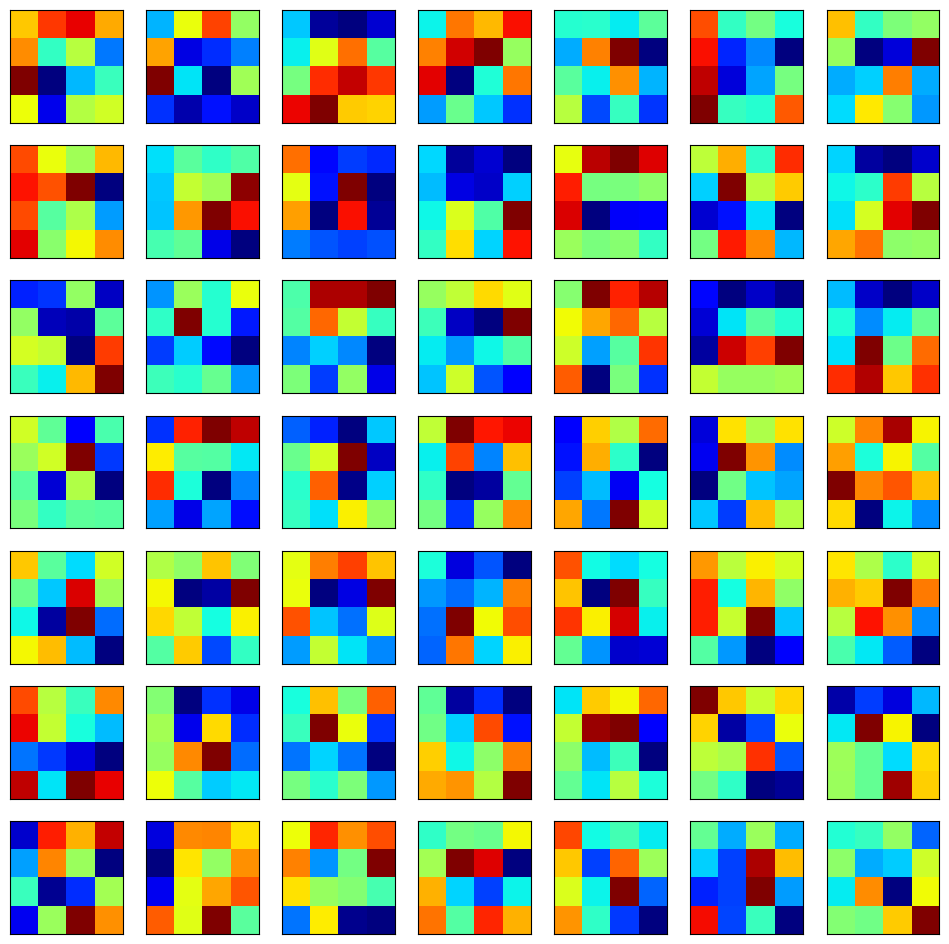

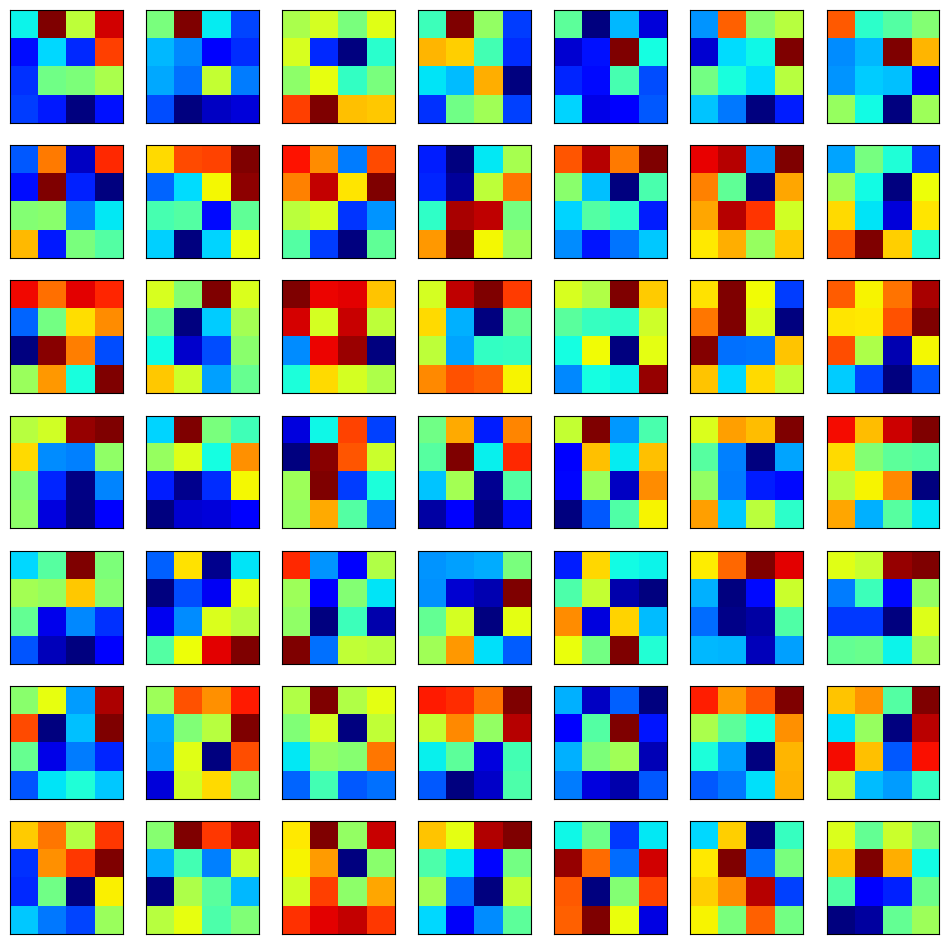

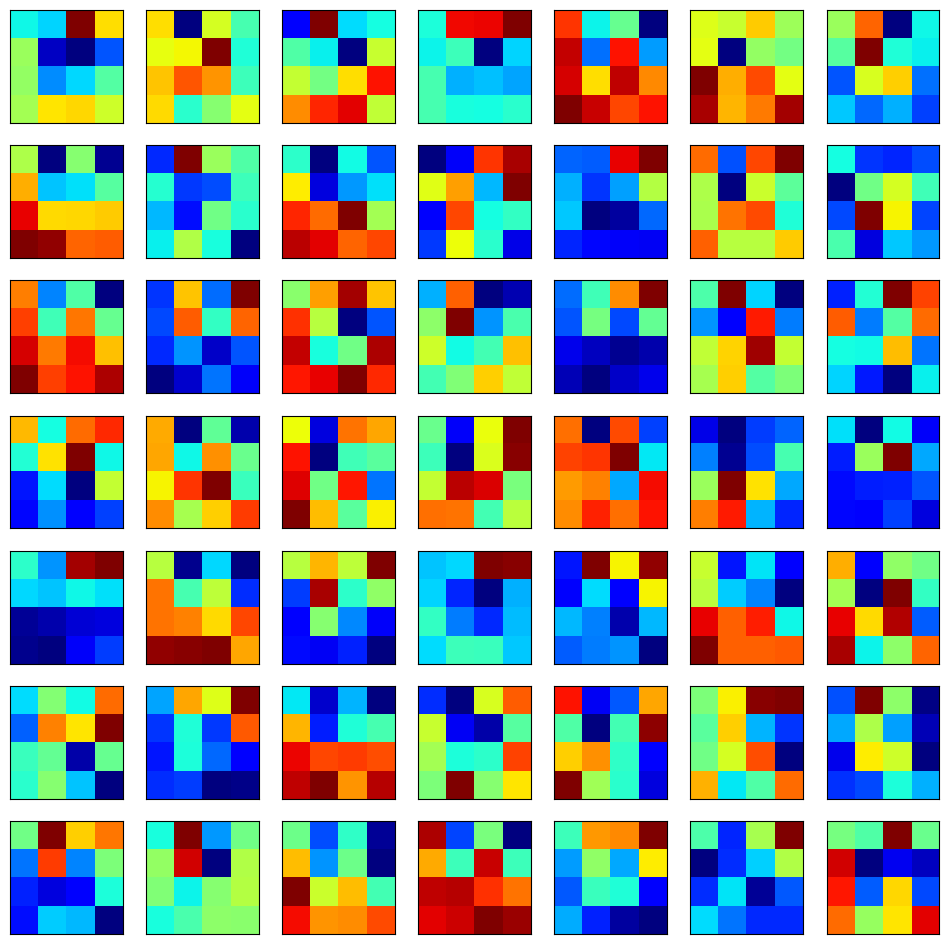

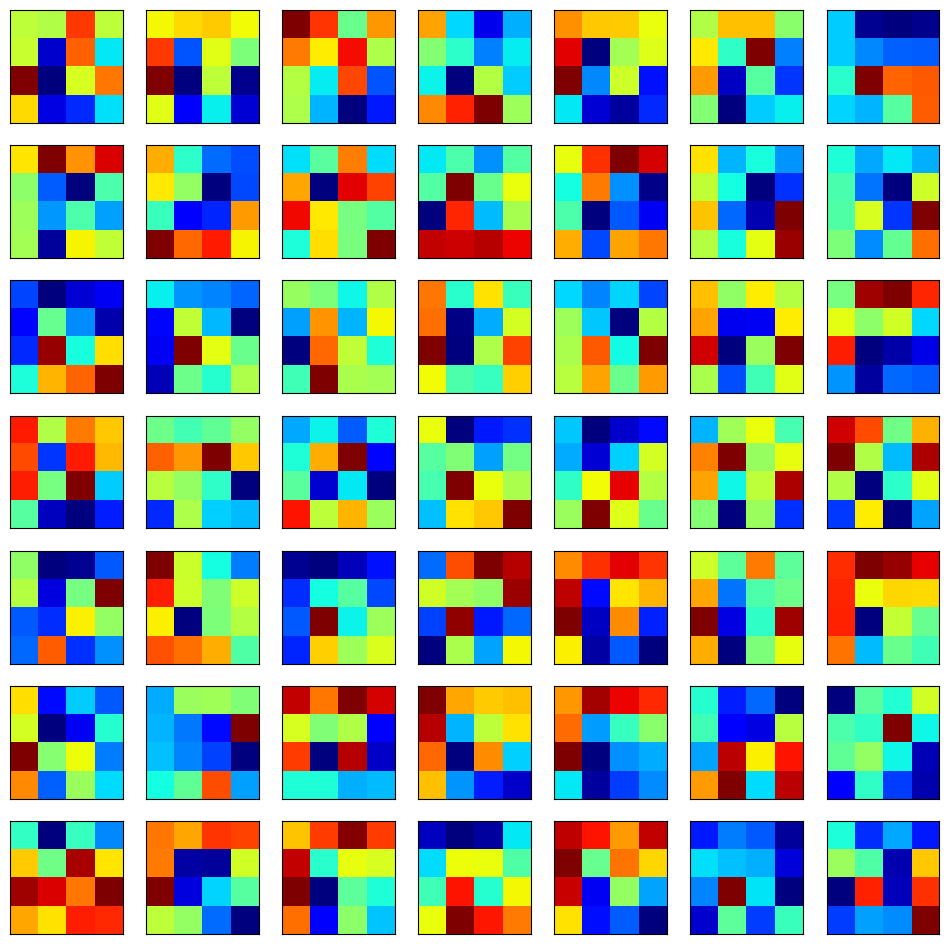

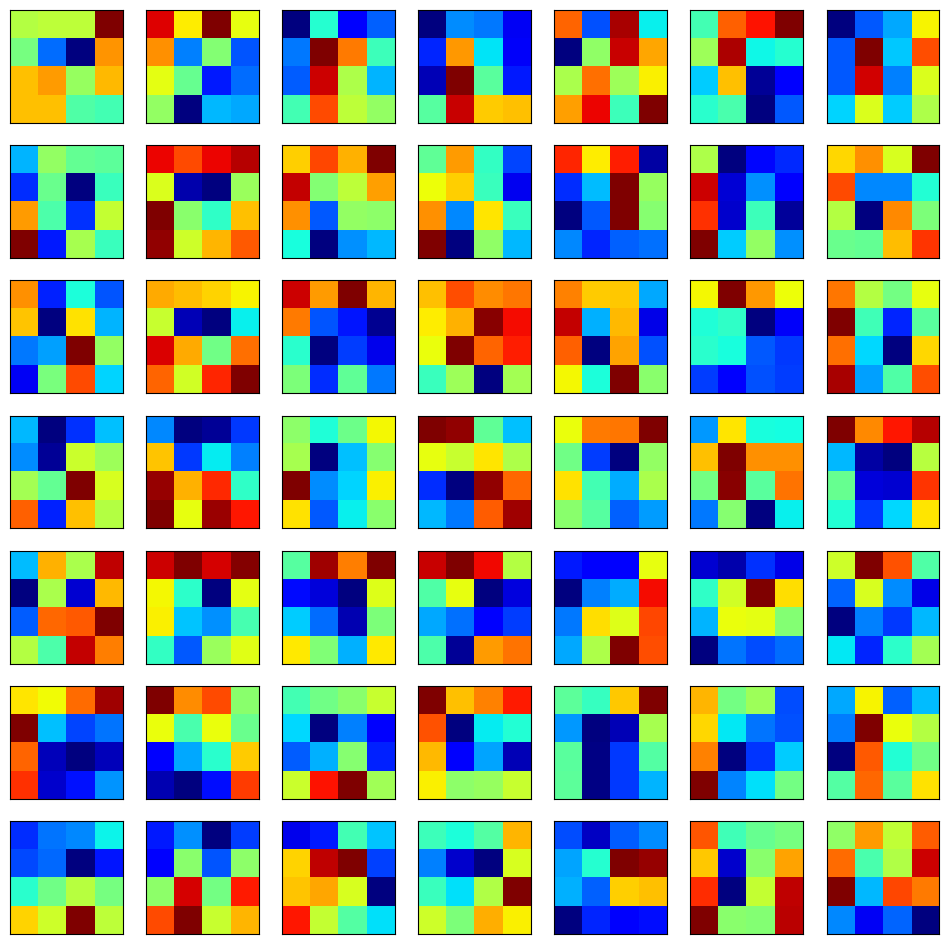

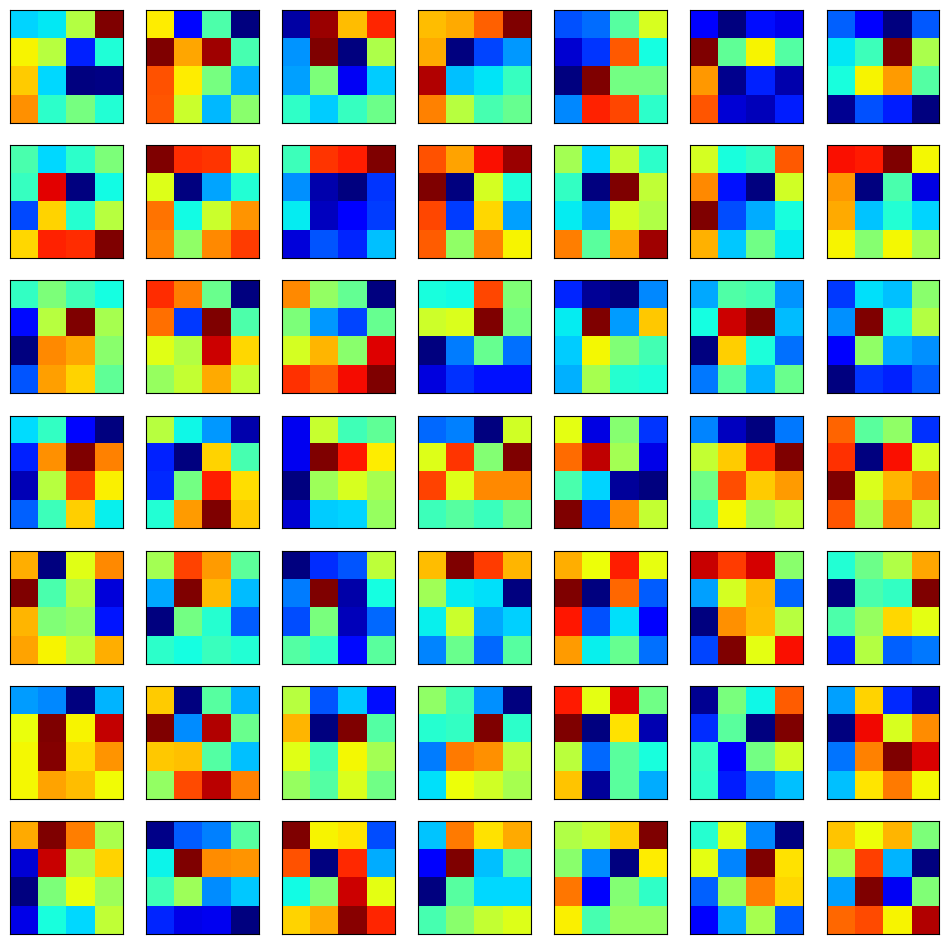

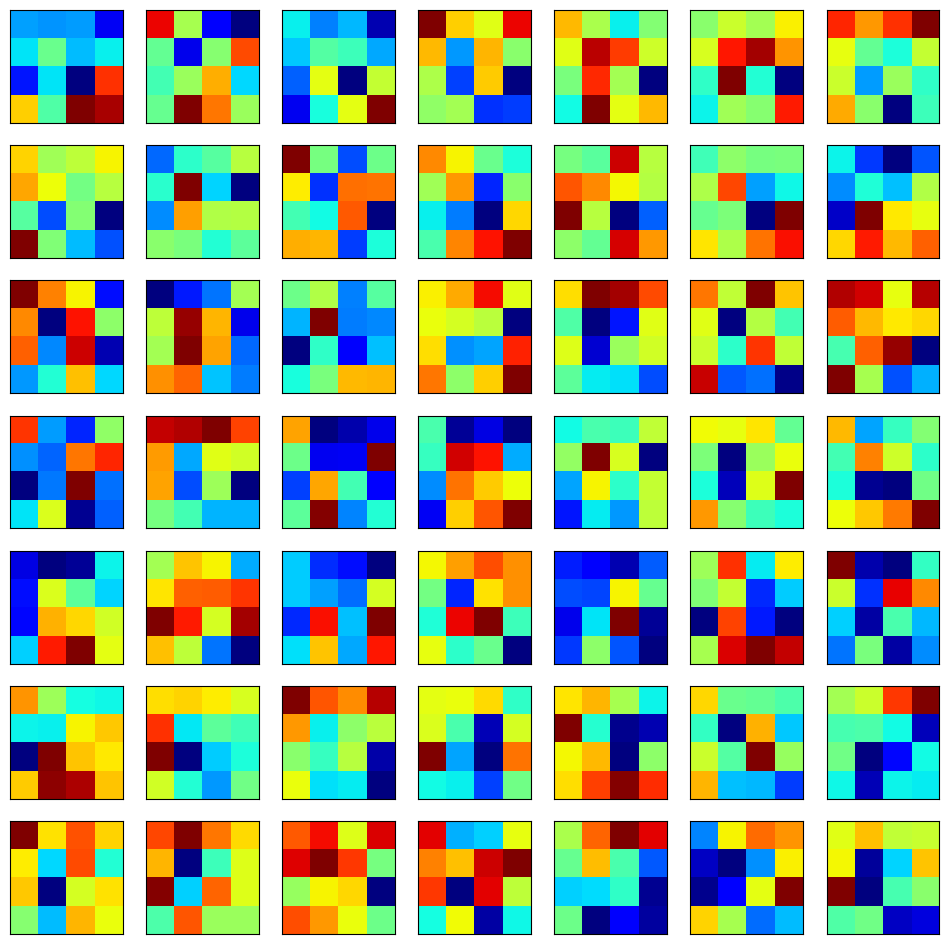

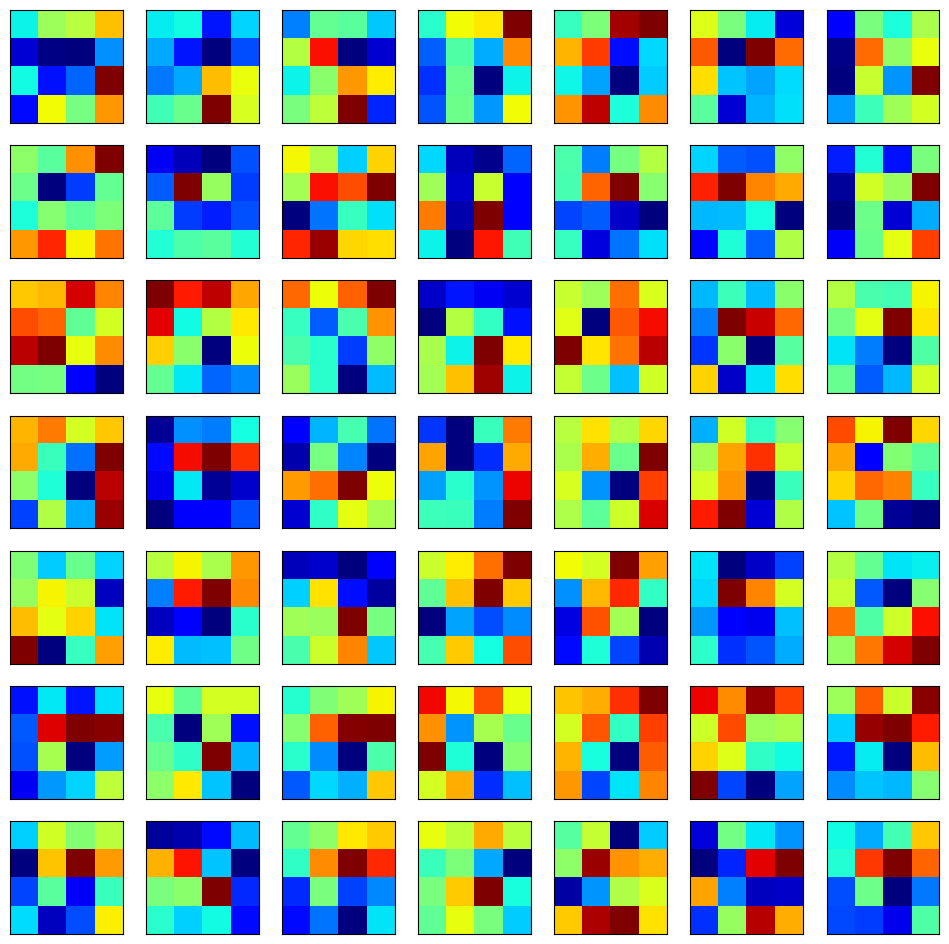

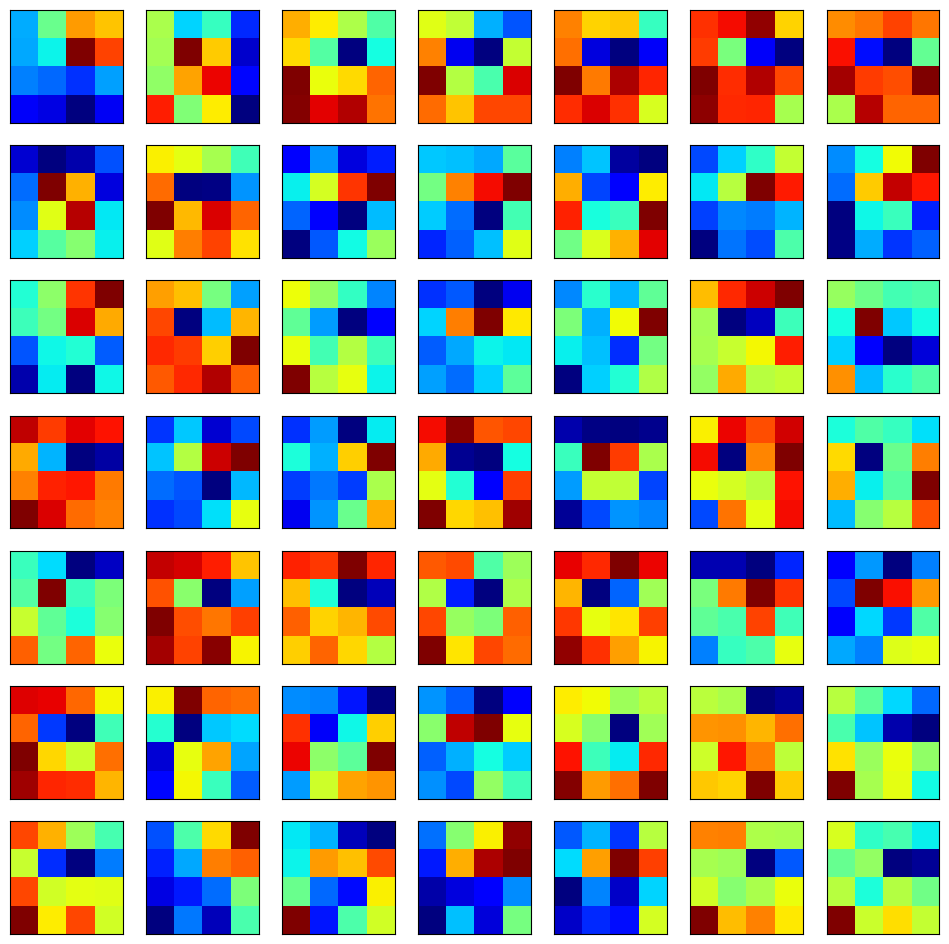

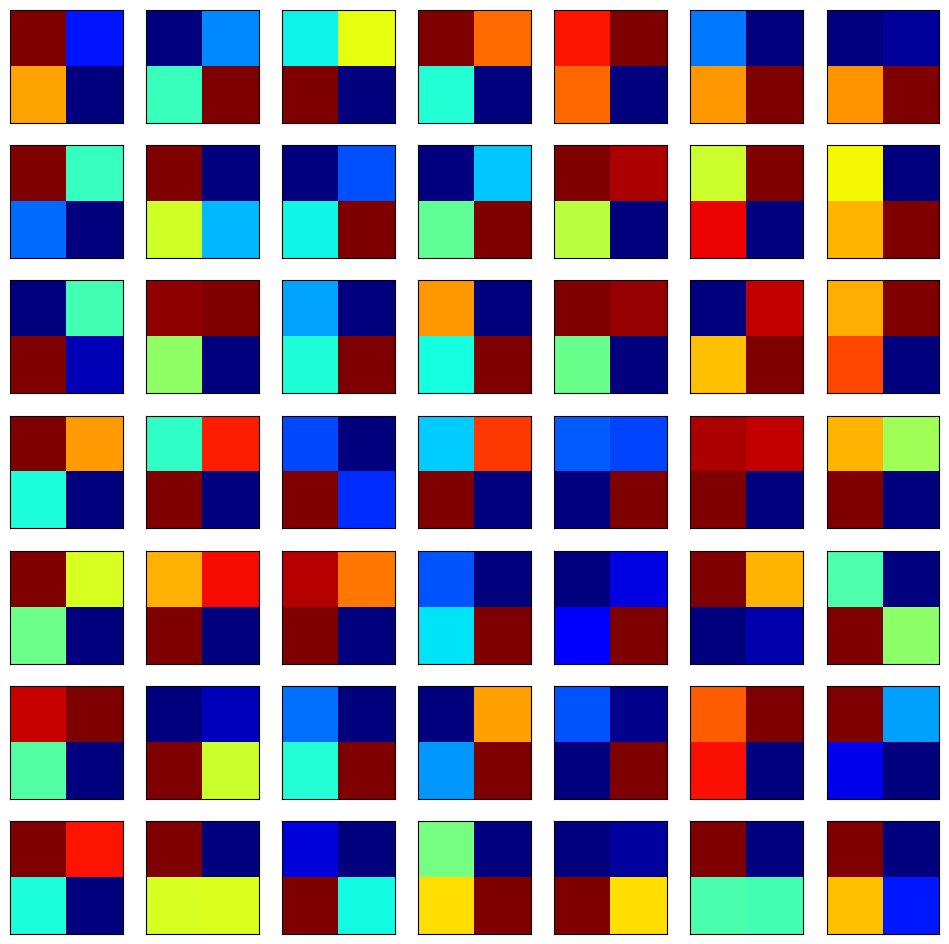

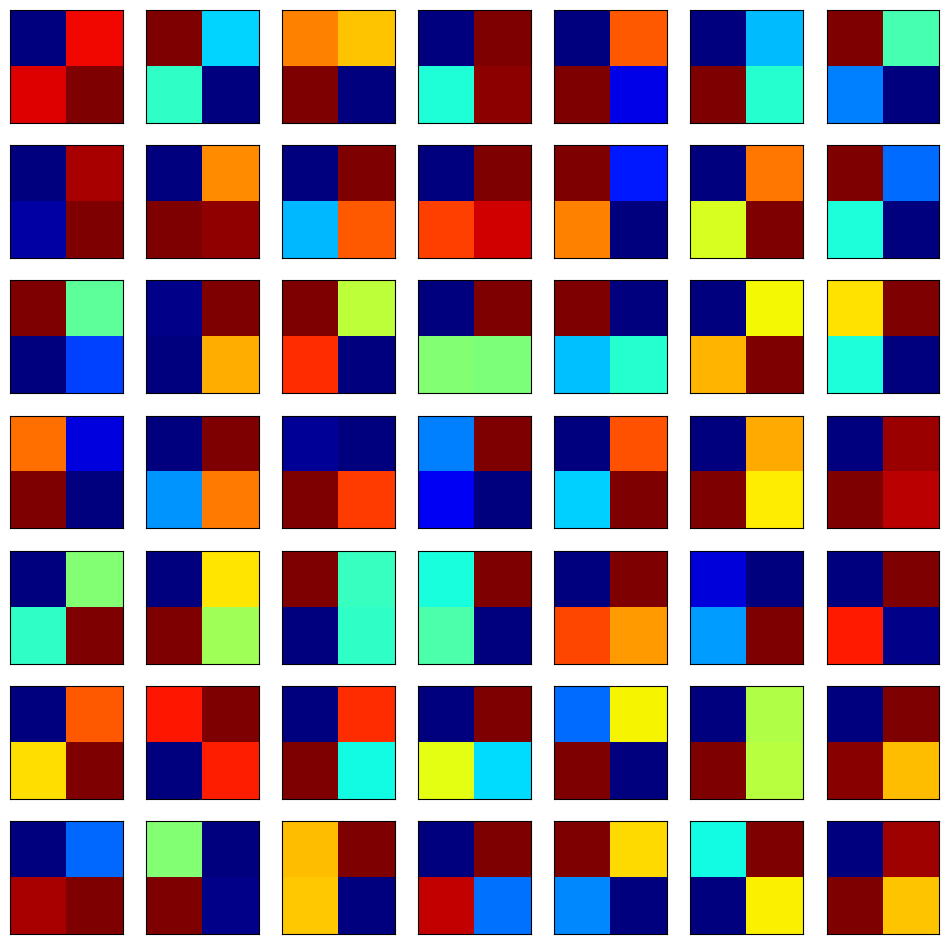

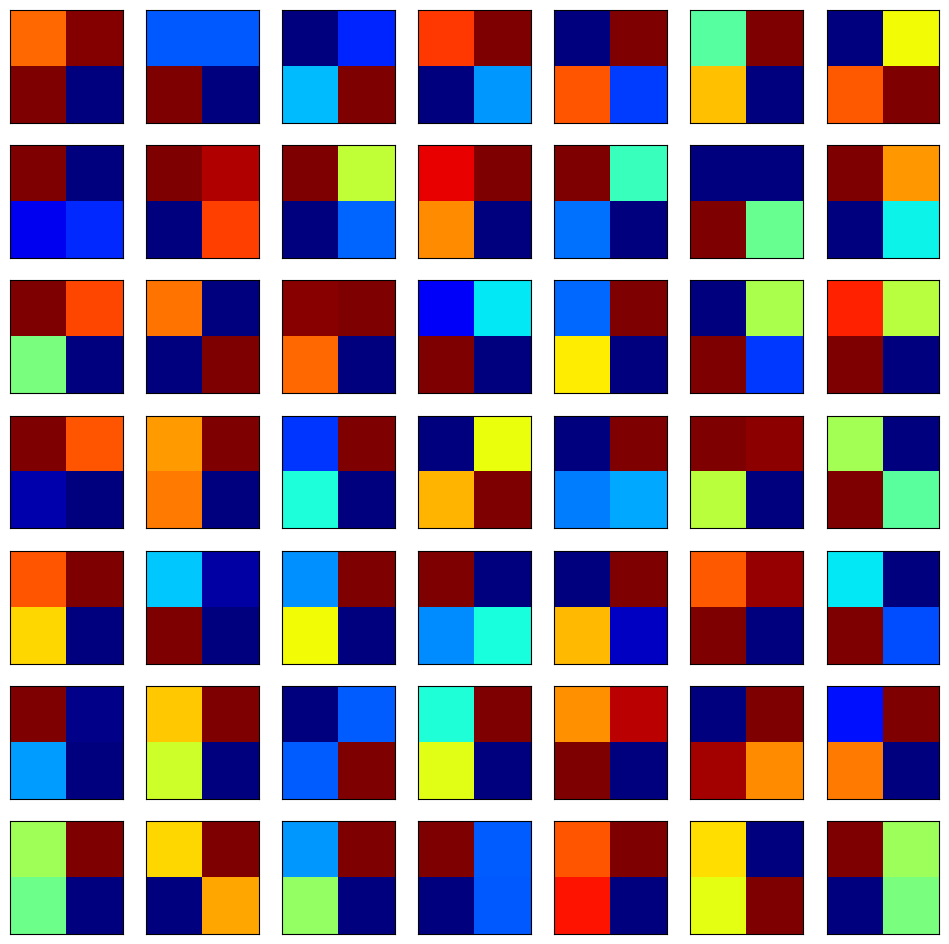

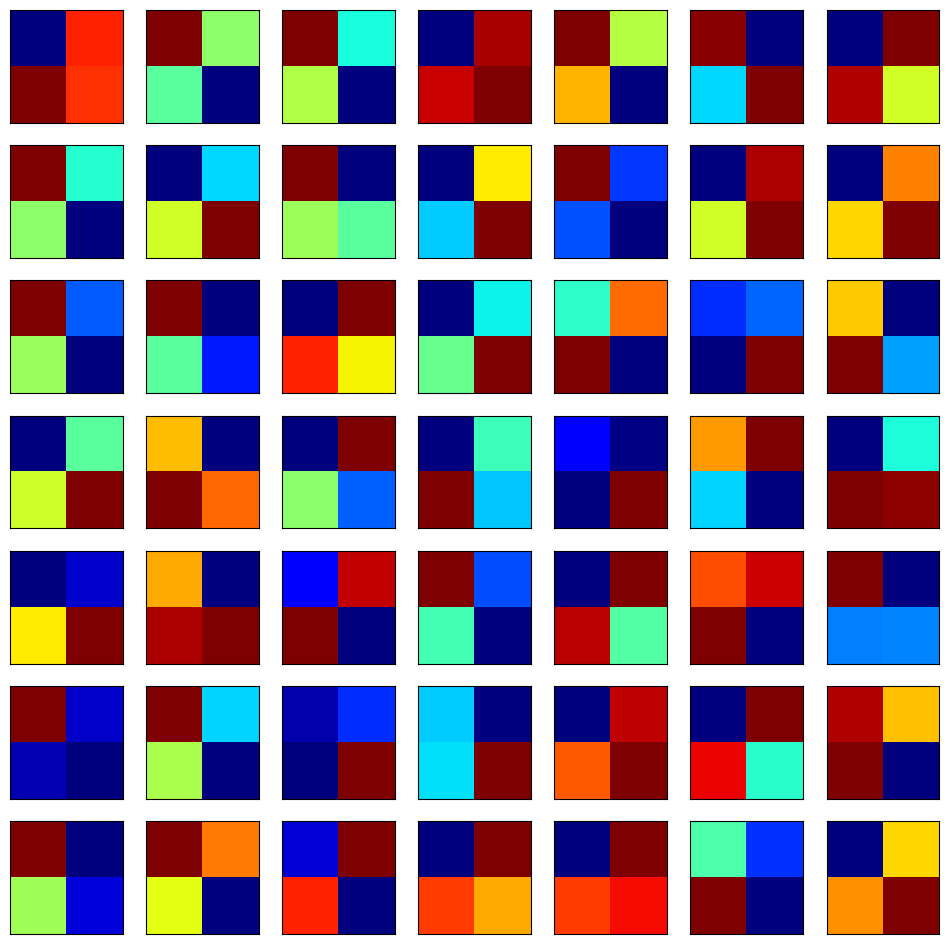

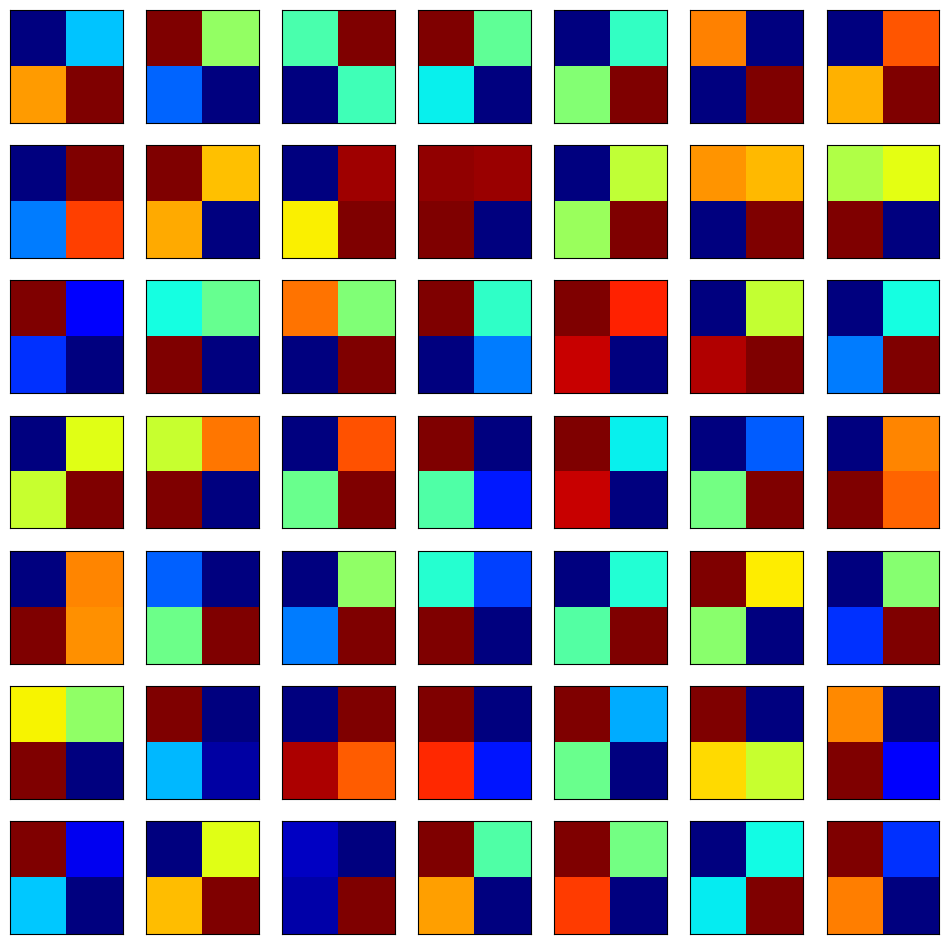

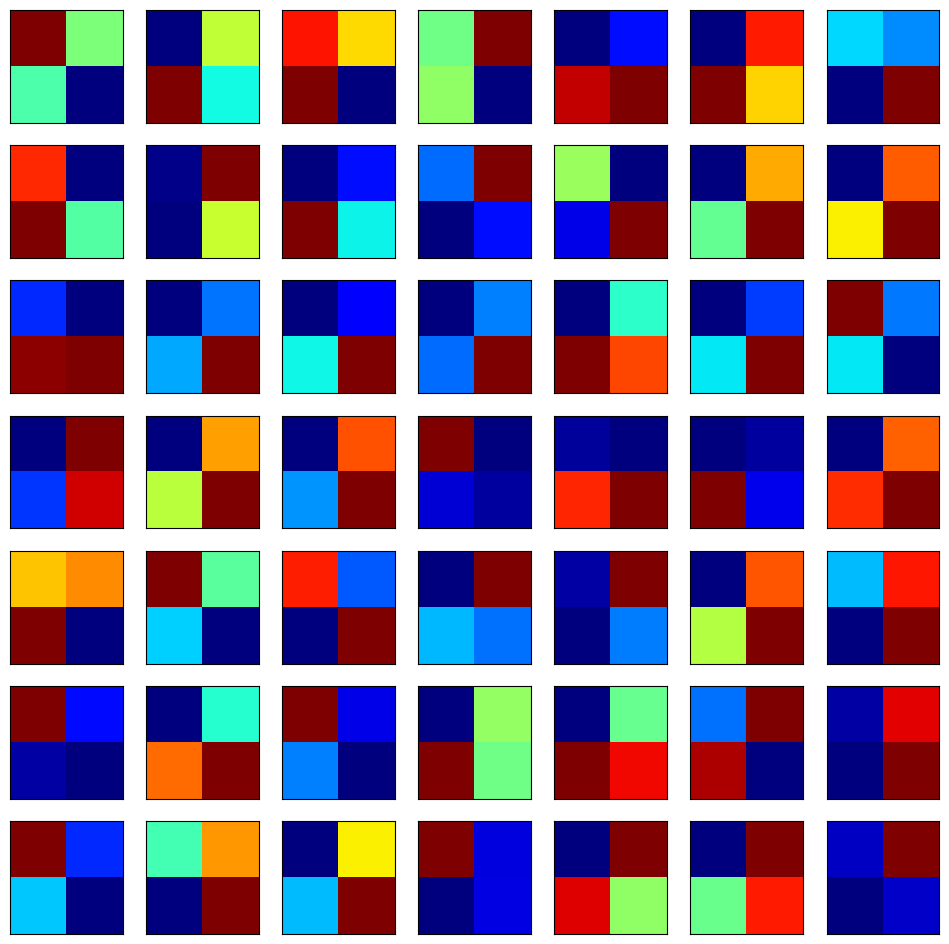

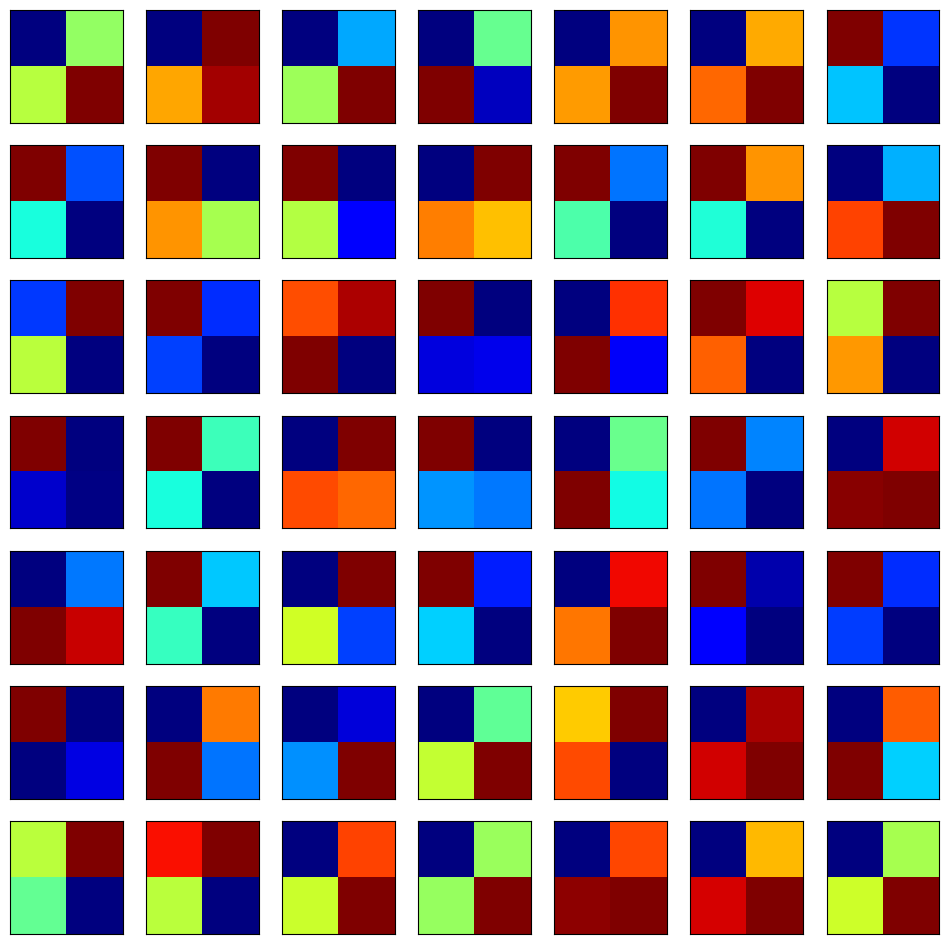

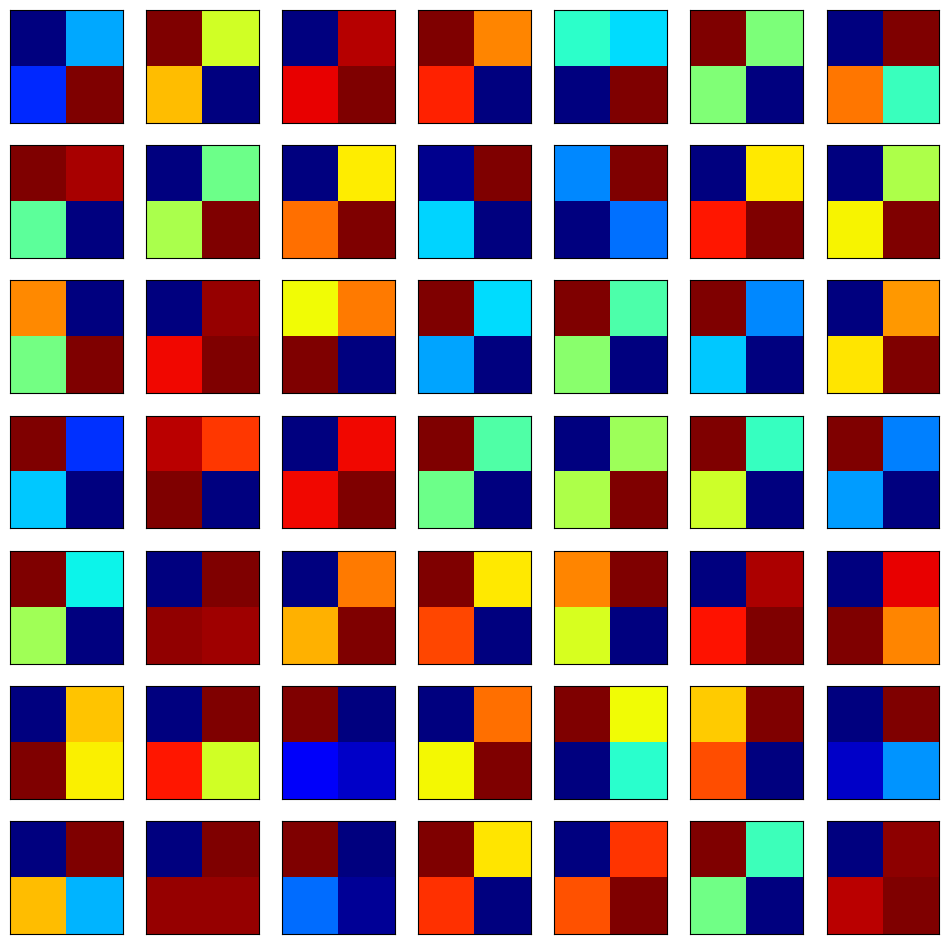

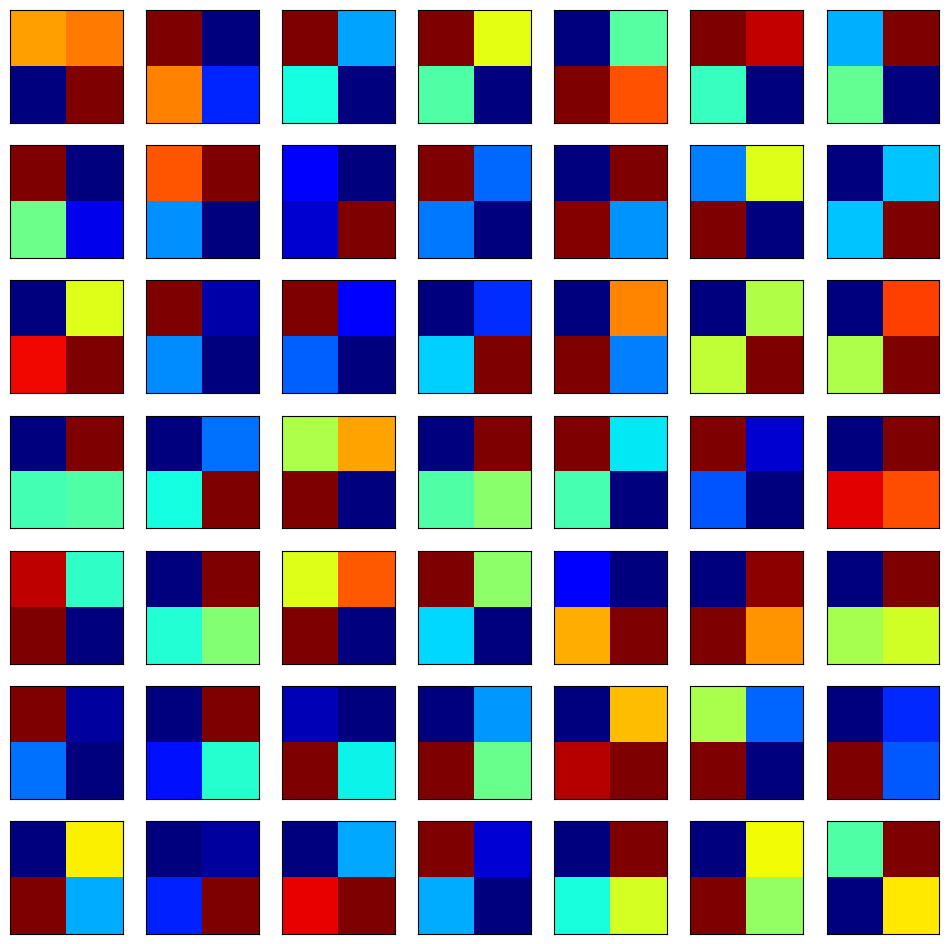

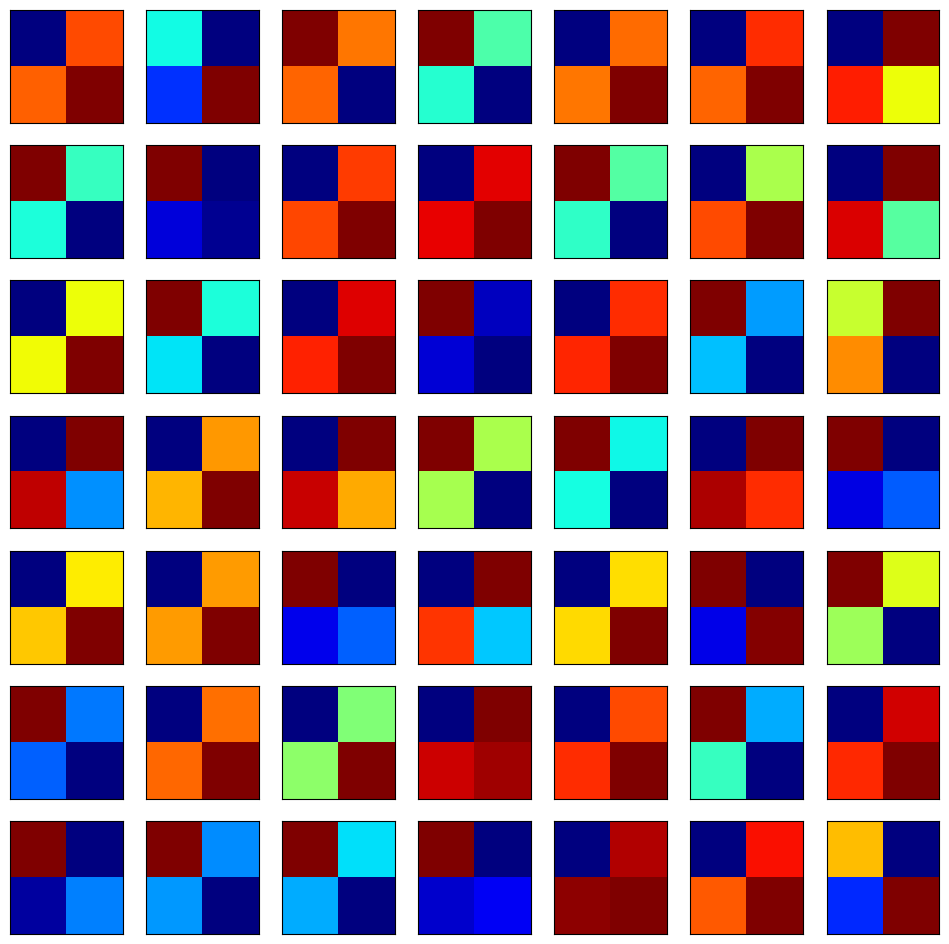

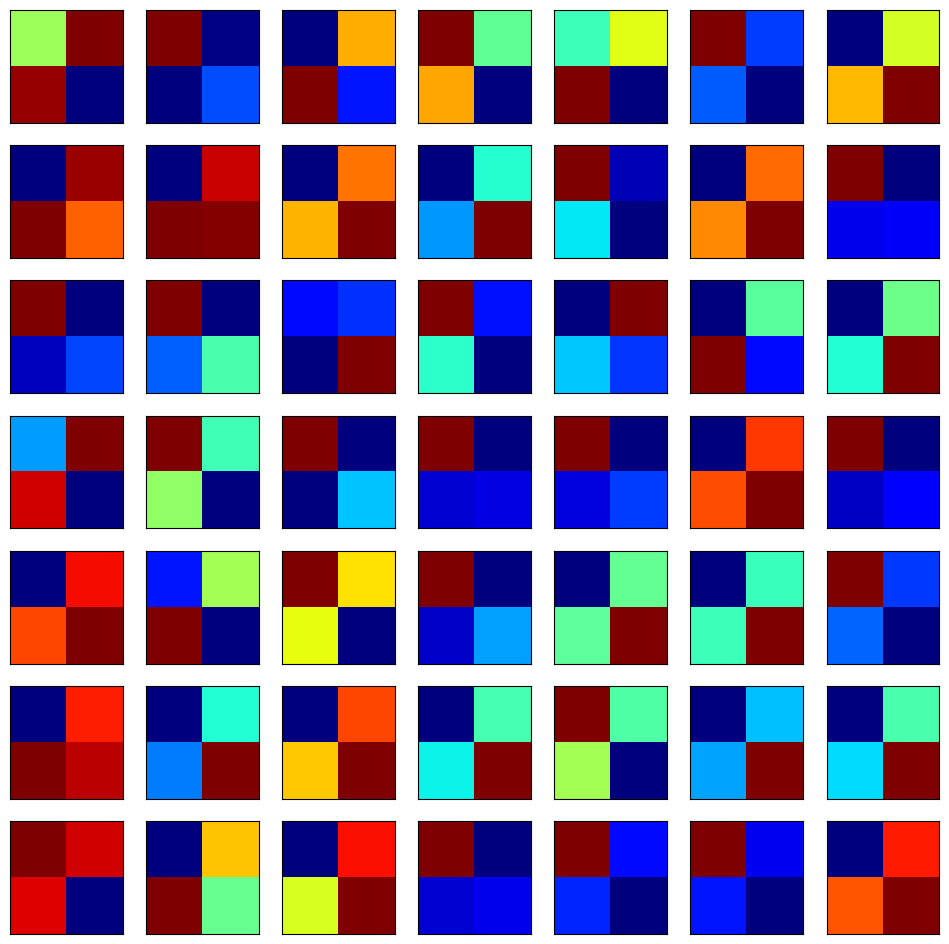

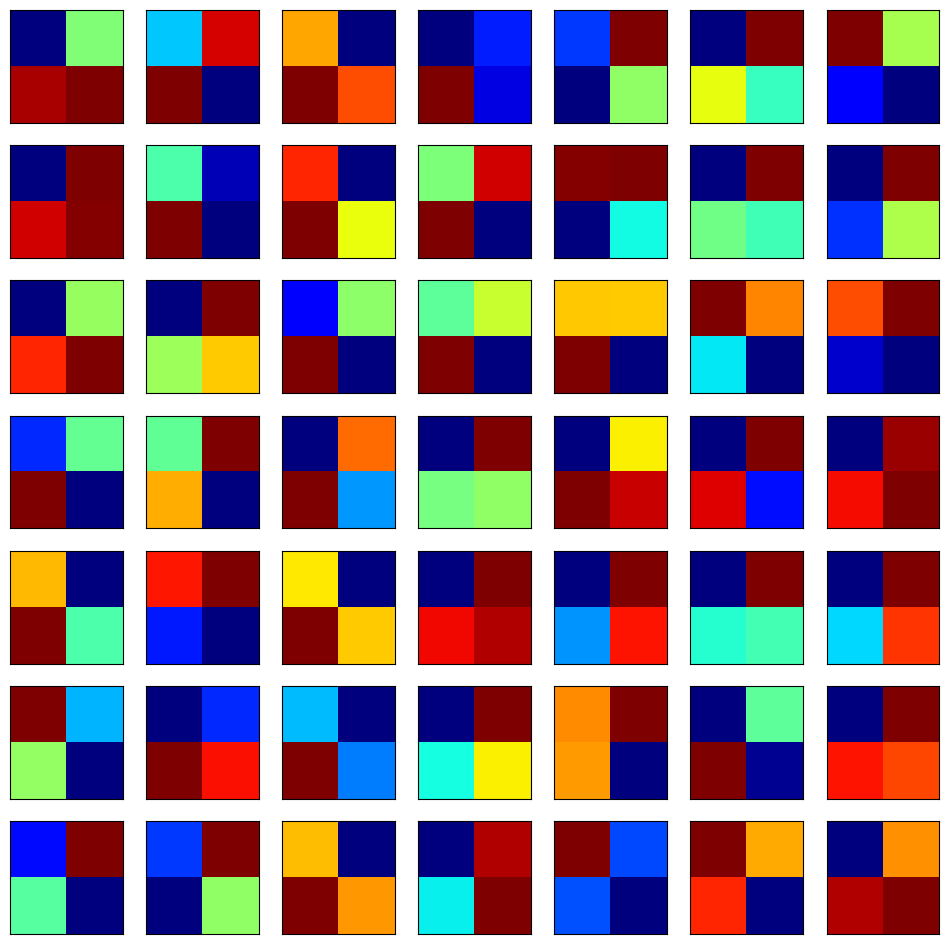

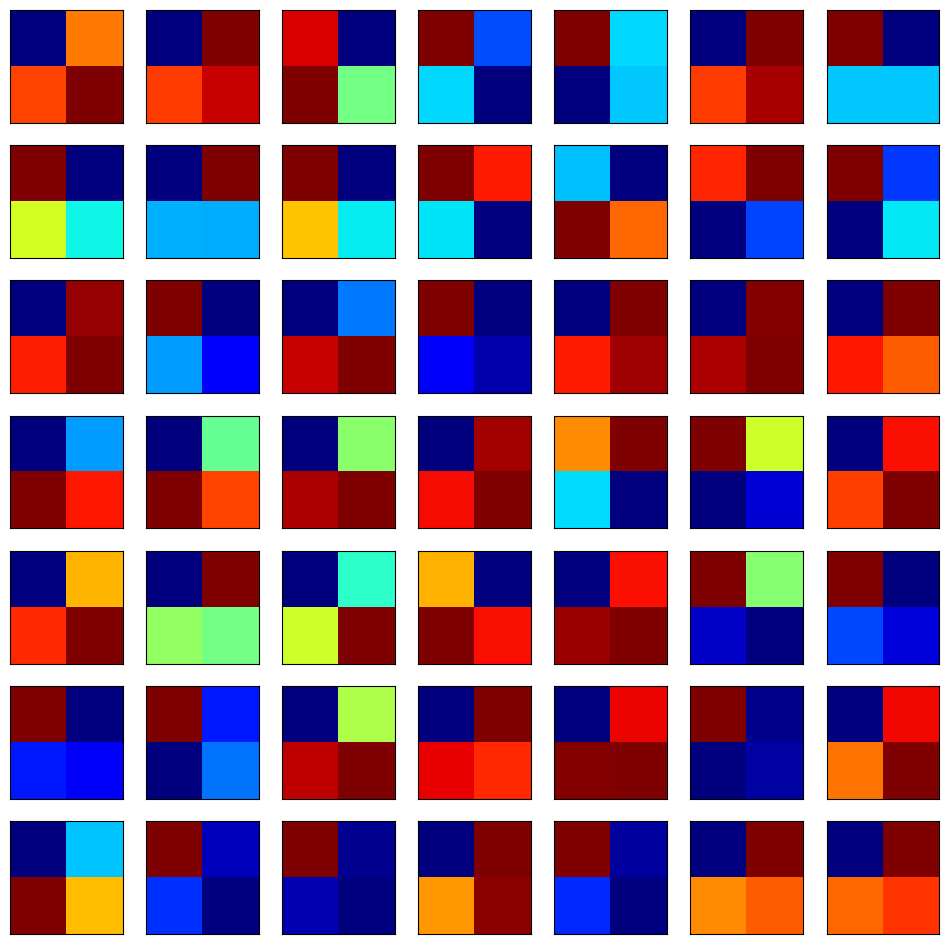

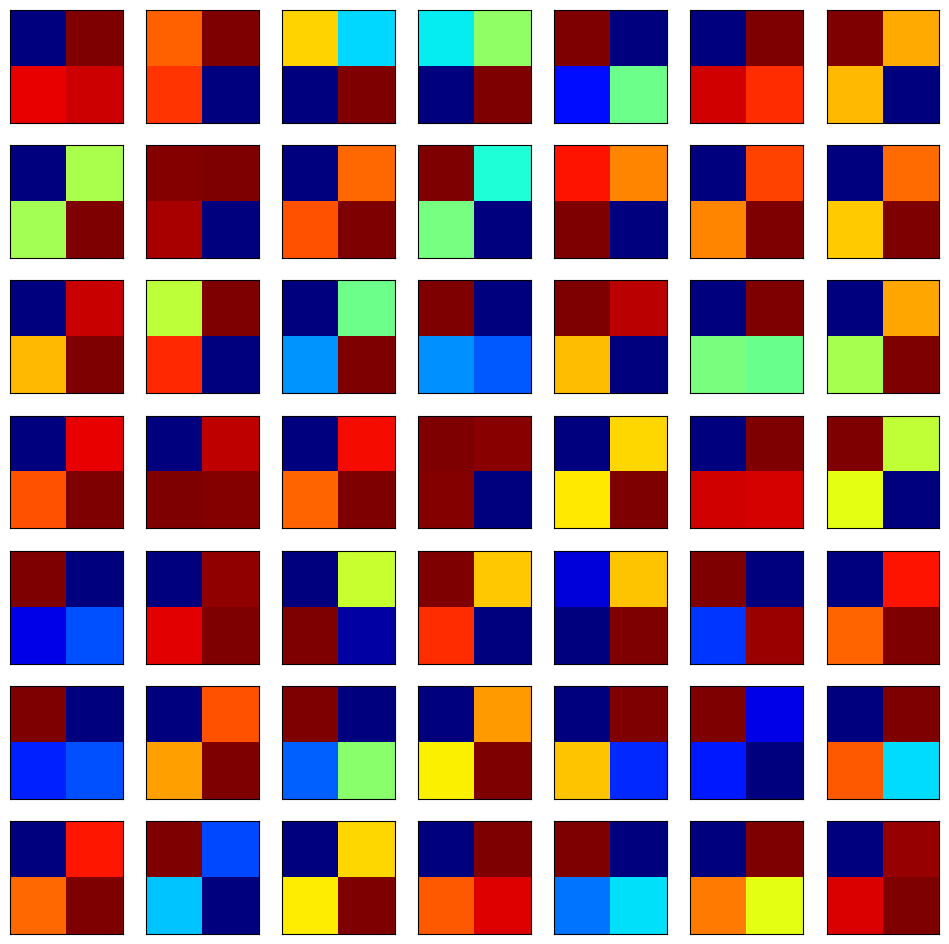

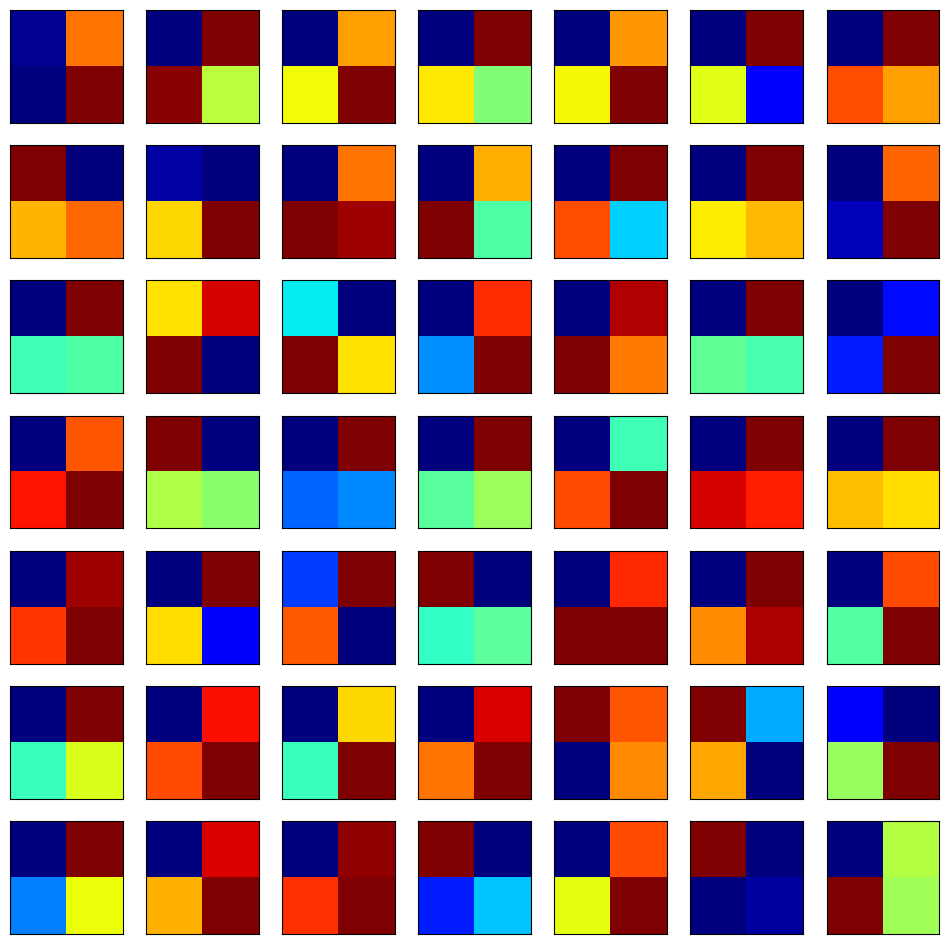

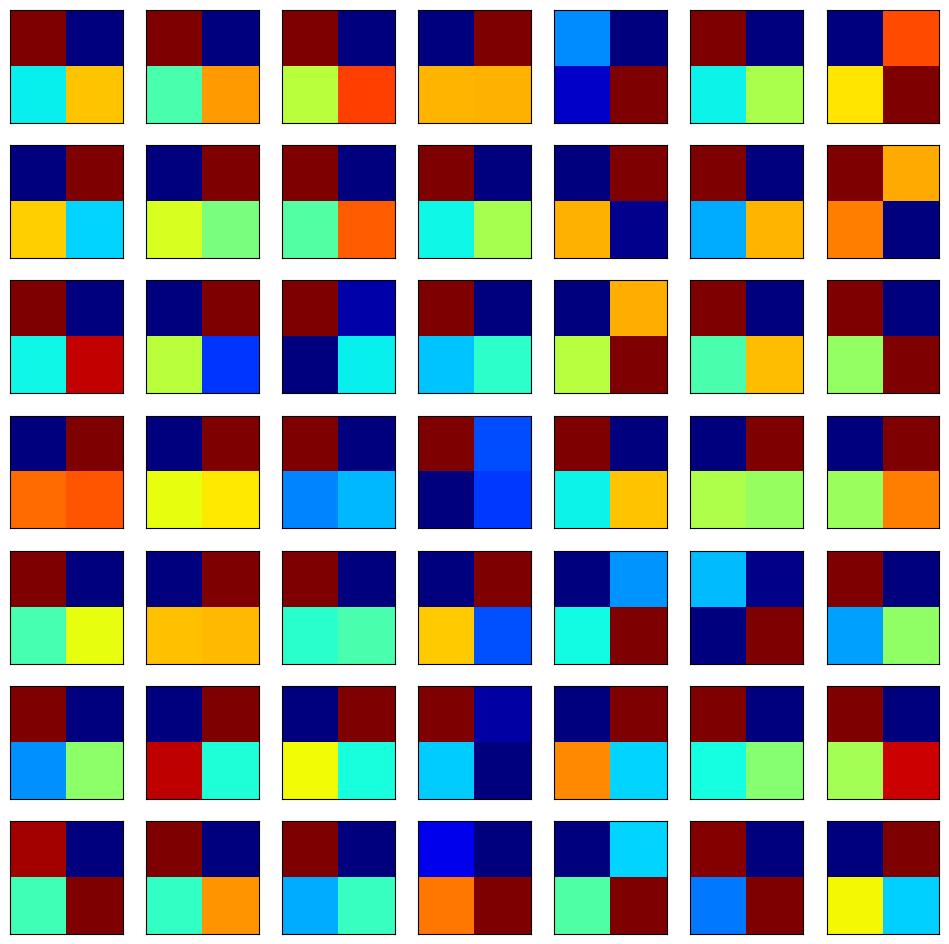

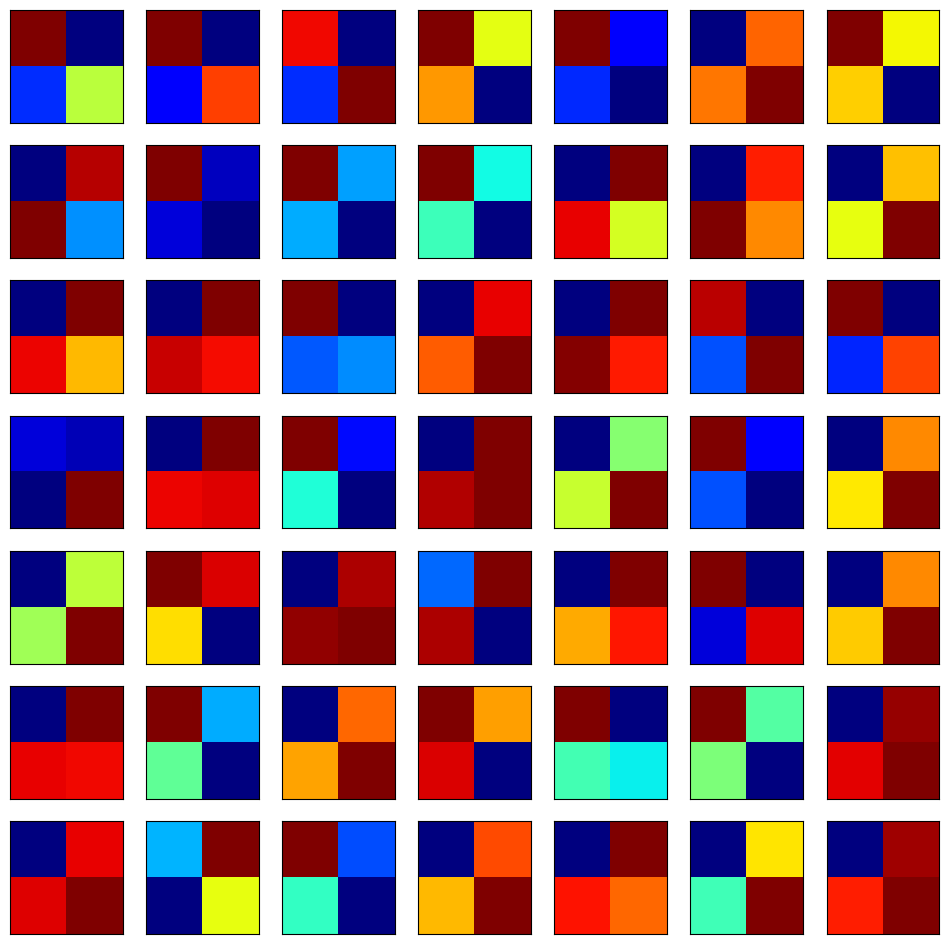

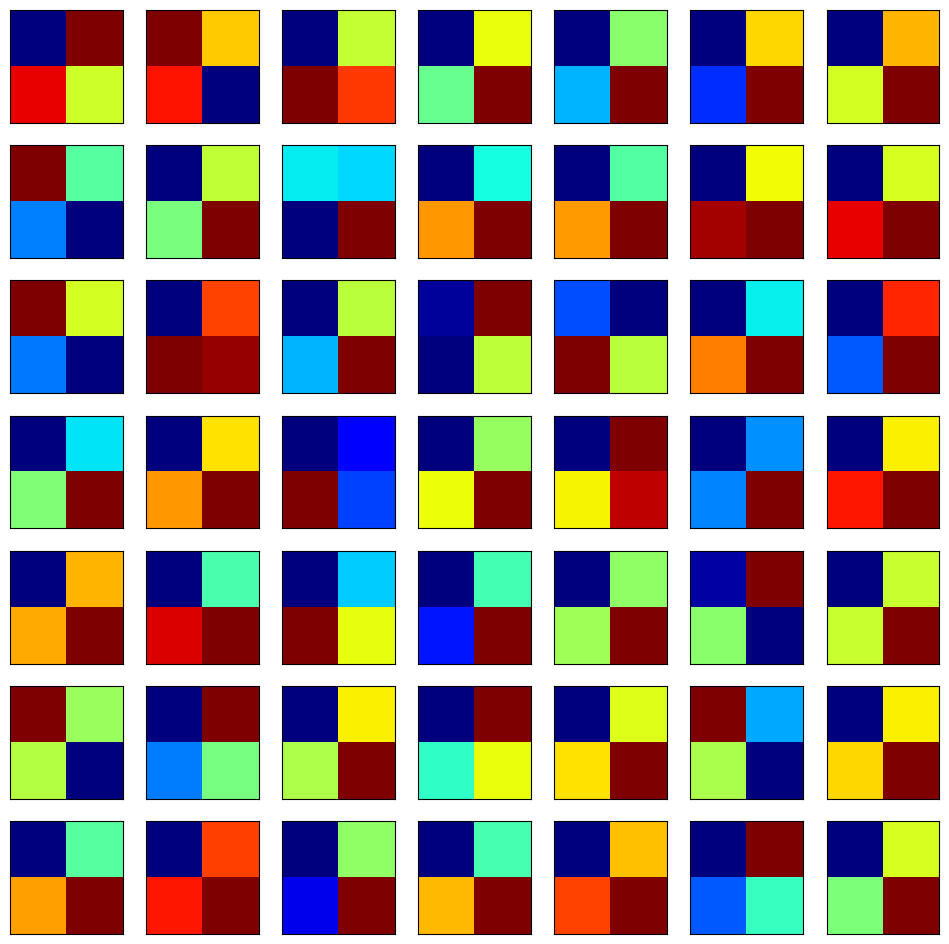

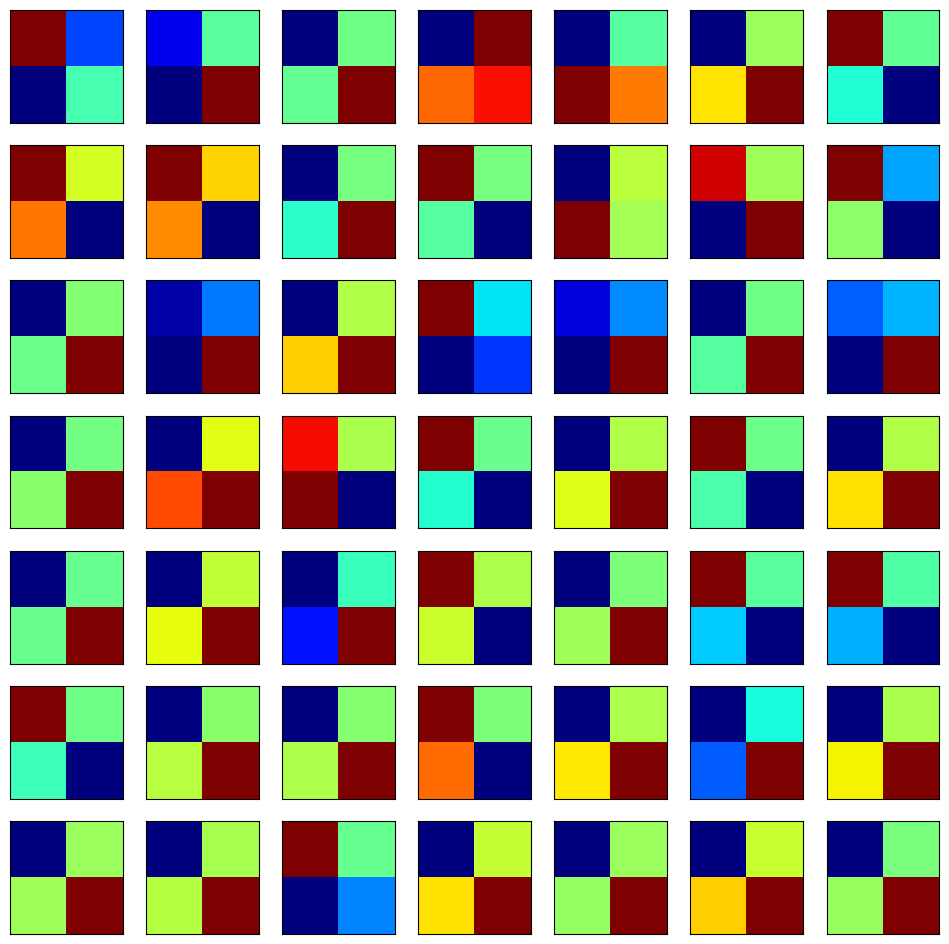

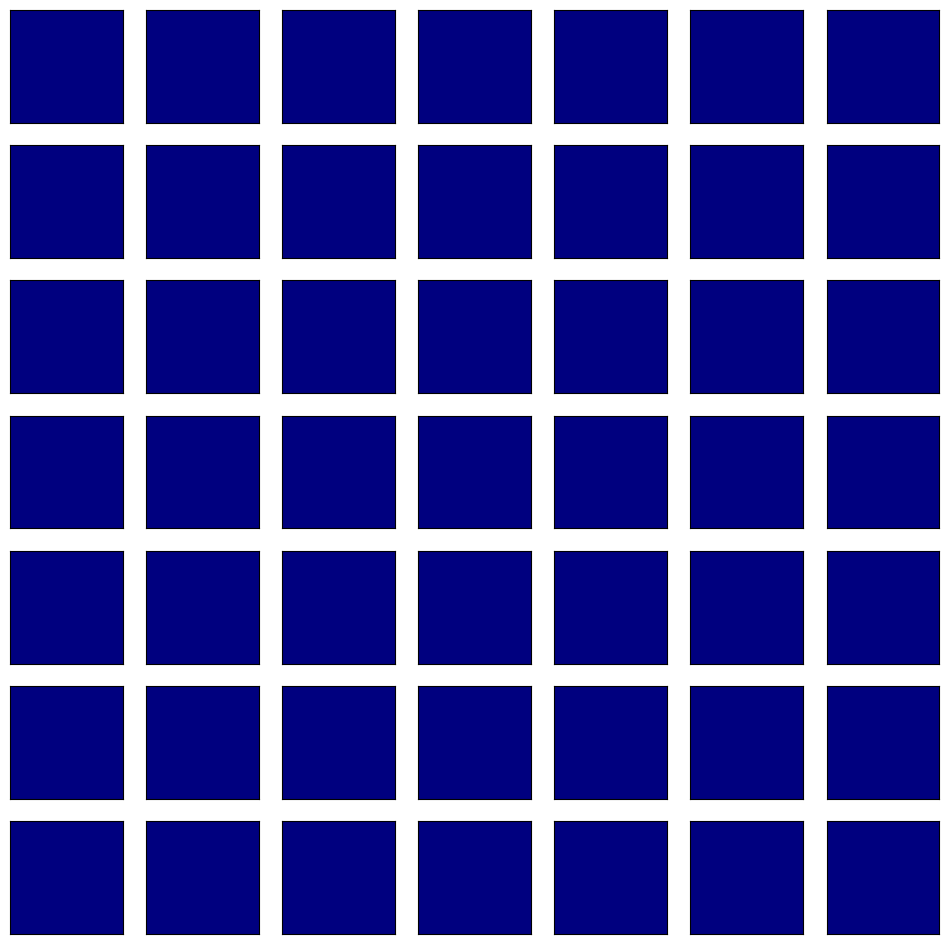

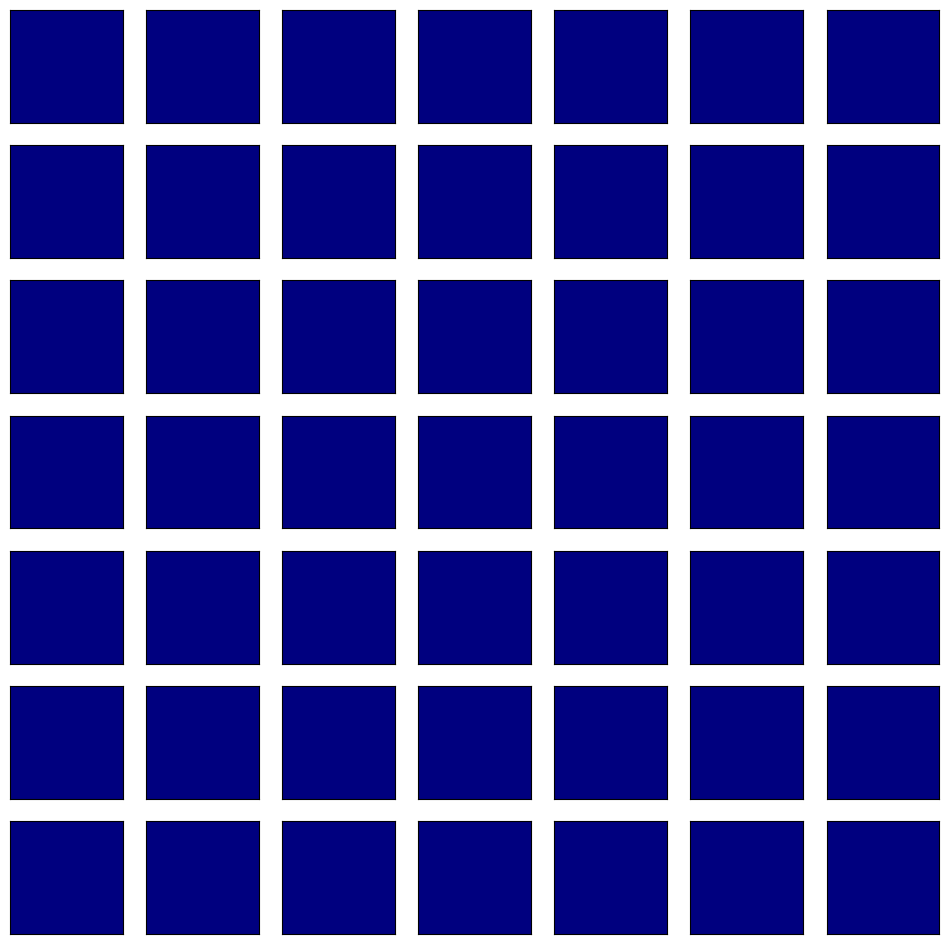

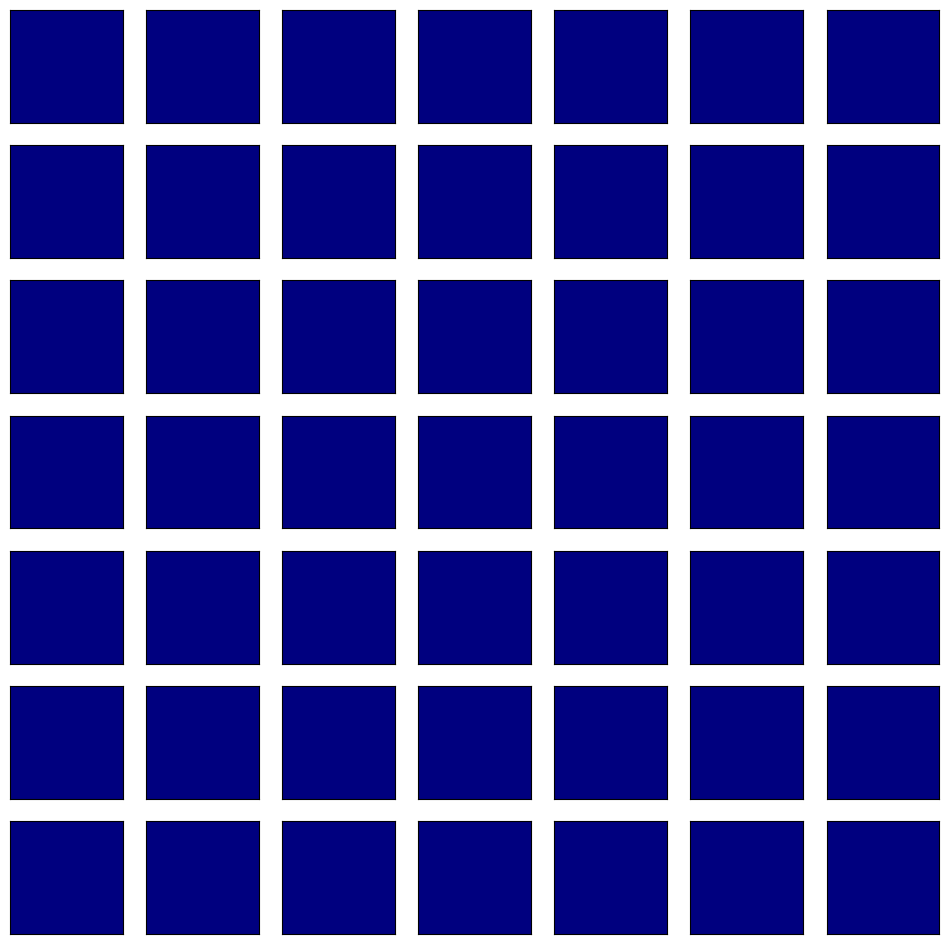

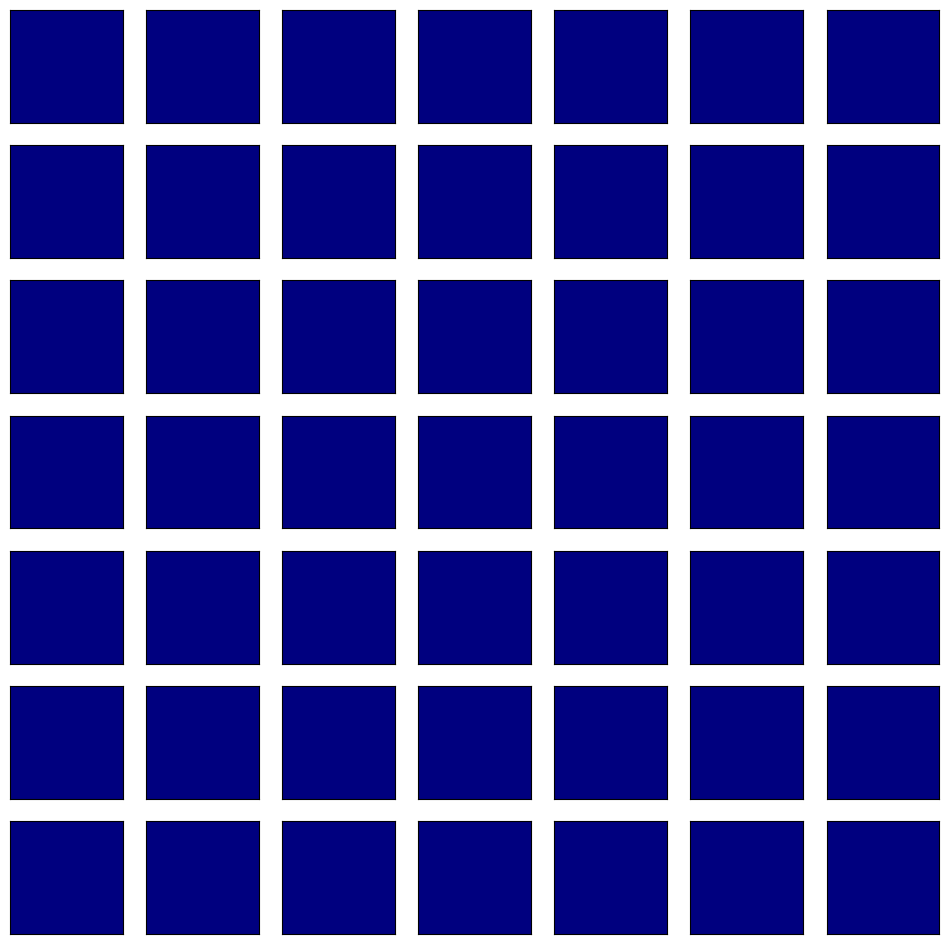

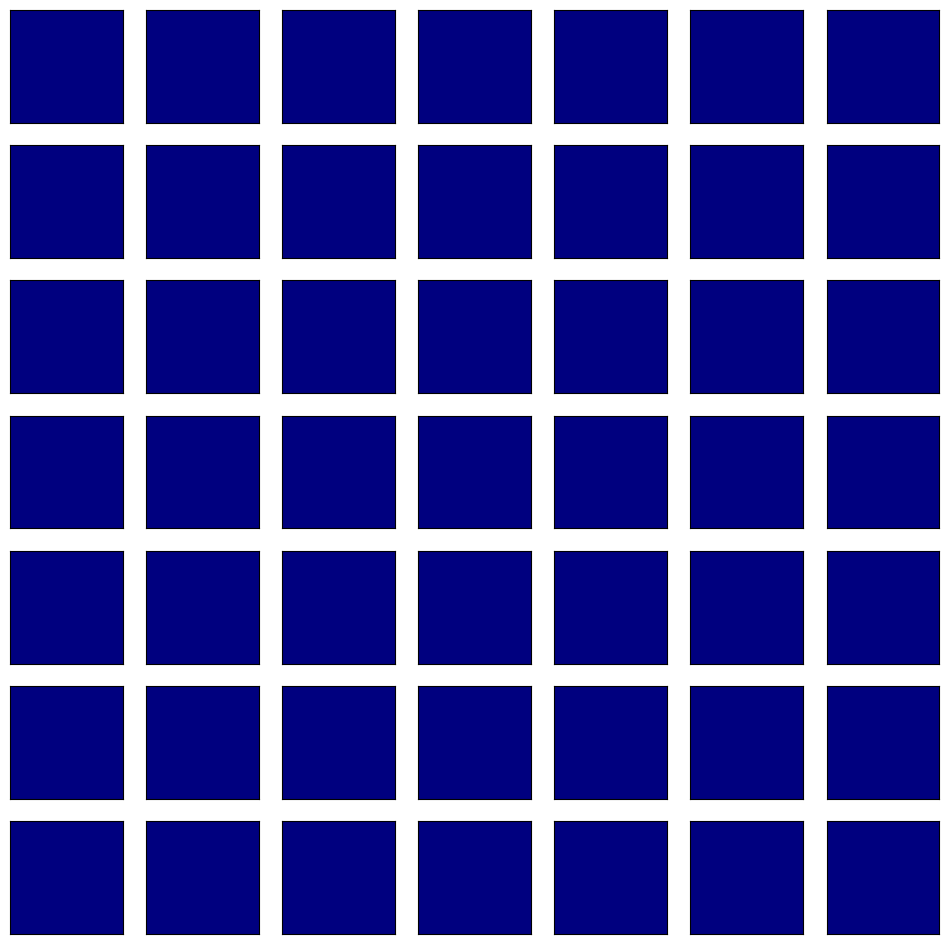

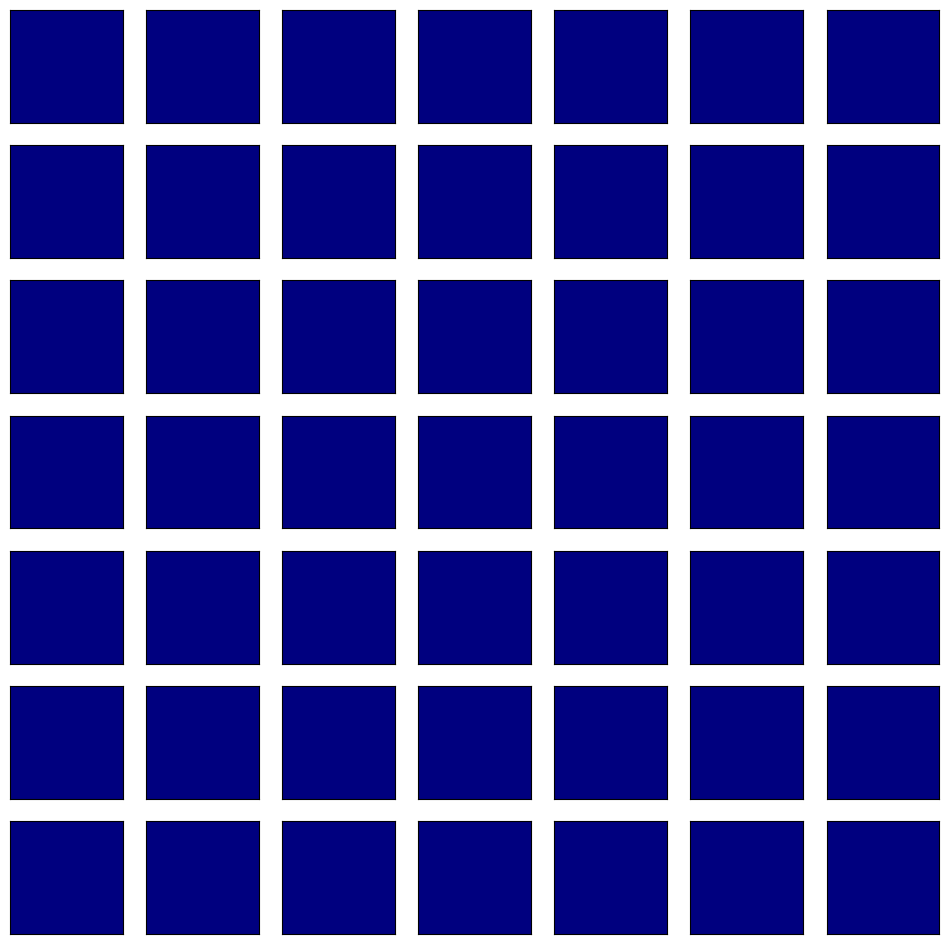

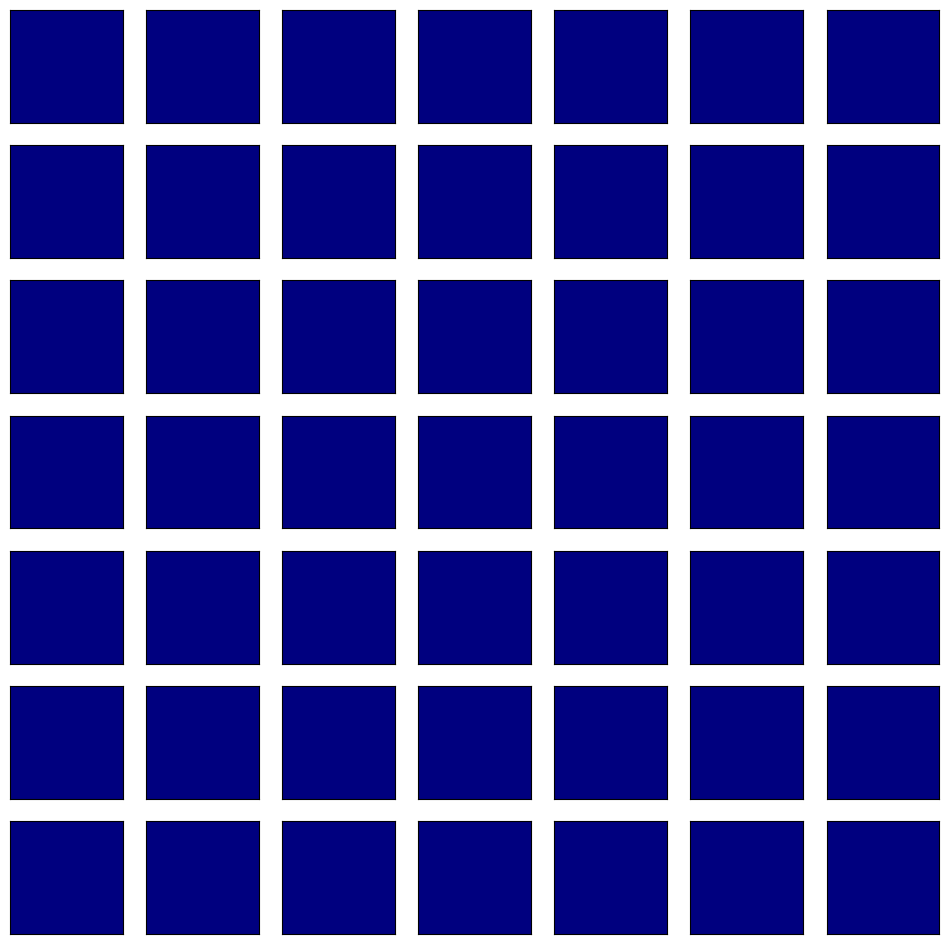

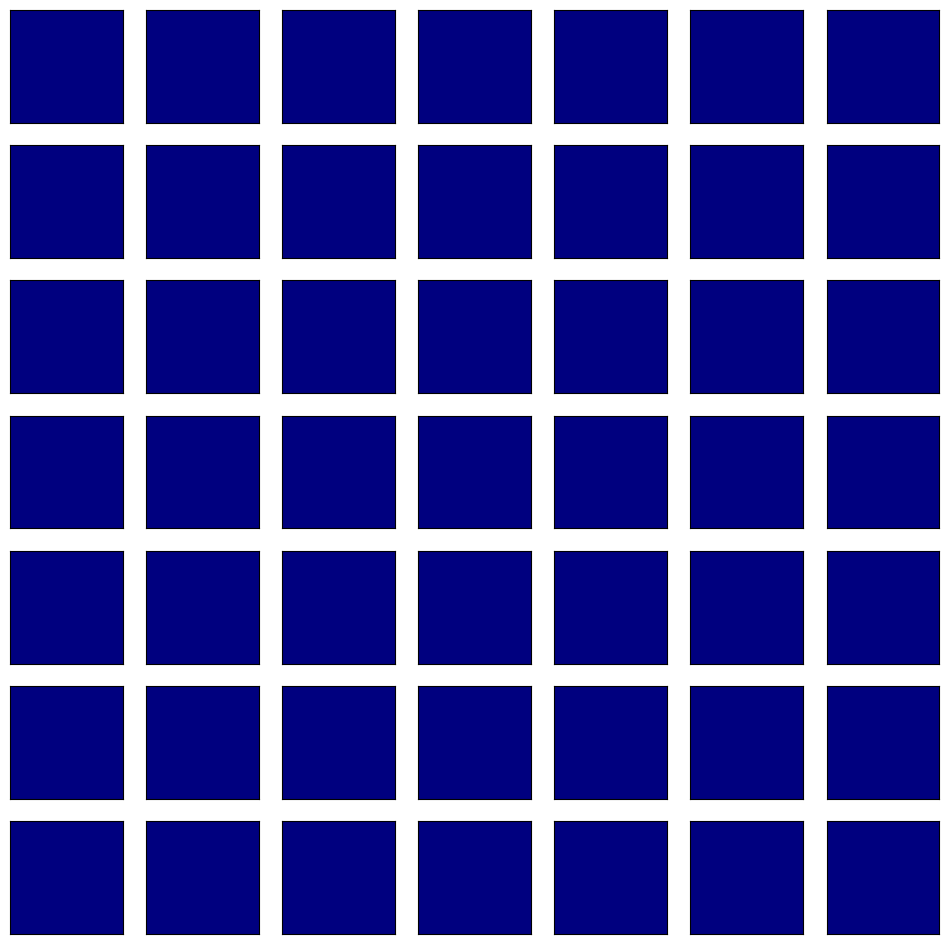

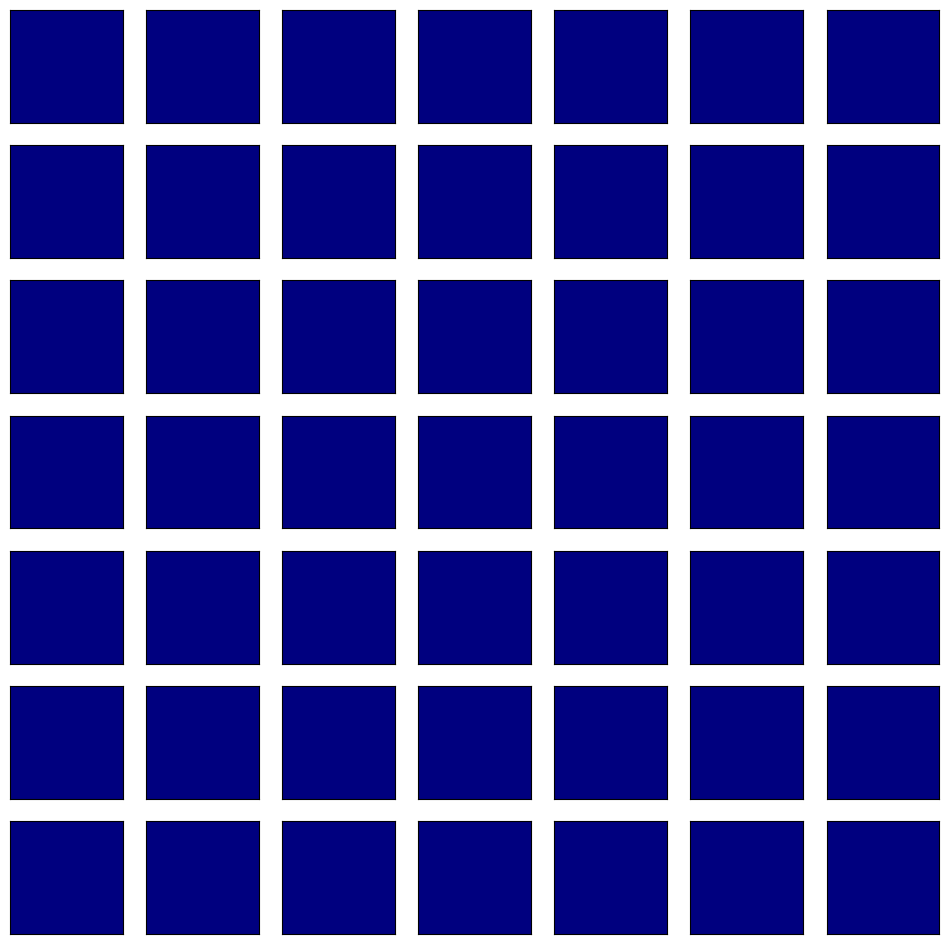

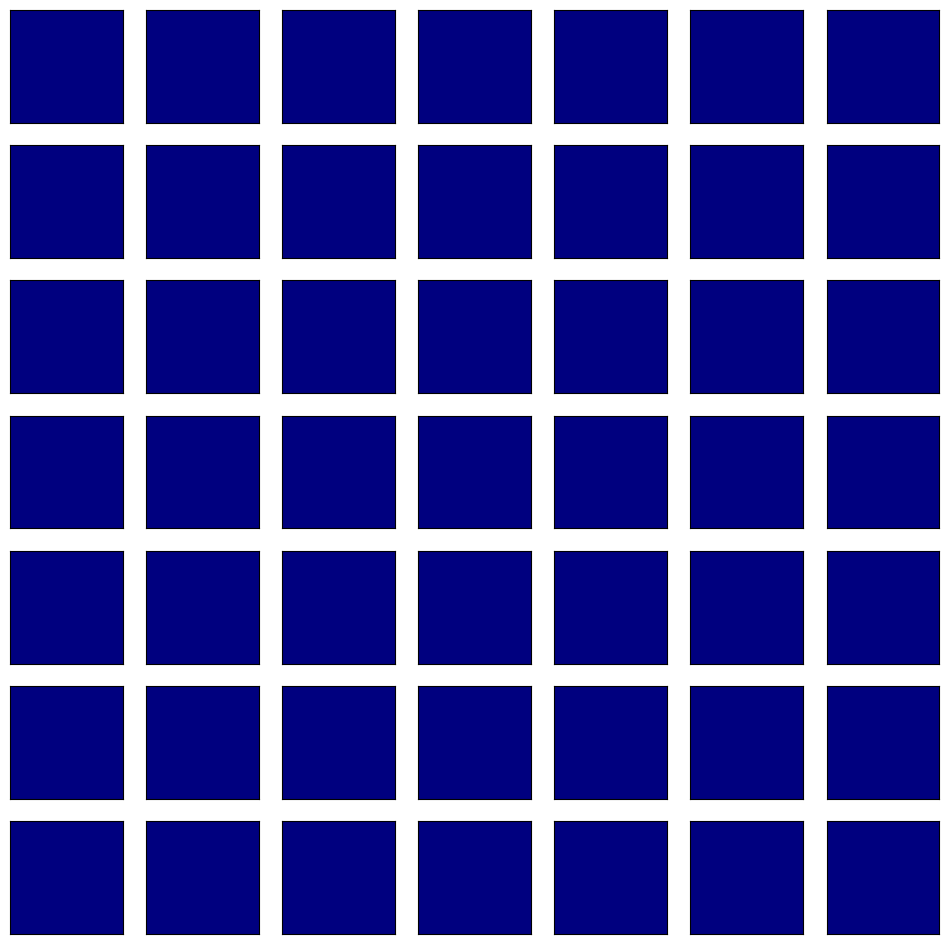

In [ ]:
conv_layer_index_PS1B = []

for i, layer in enumerate(model_PS1B.layers):
  if 'Conv2D' in layer.__class__.__name__ or 'Convolution2D' in layer.__class__.__name__:
    conv_layer_index_PS1B.append(i)

print(len(conv_layer_index_PS1B))

# Broad Feature Maps for PS1B
outputs = [model_PS1B.layers[i].output for i in conv_layer_index_PS1B]
model_short_PS1B = Model(inputs = model_PS1B.inputs, outputs = outputs)

img = np.expand_dims(X_train_base[img_index], axis=0)

feature_output = model_short_PS1B.predict(img)

rows = int(math.sqrt(len(conv_layer_index_PS1B)))
columns = rows

for ftr in feature_output:
  fig = plt.figure(figsize = (12, 12))
  for i in range(1, columns*rows+1):
    fig = plt.subplot(rows, columns, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(ftr[0, :, :, i-1], cmap = 'jet')

  plt.show()

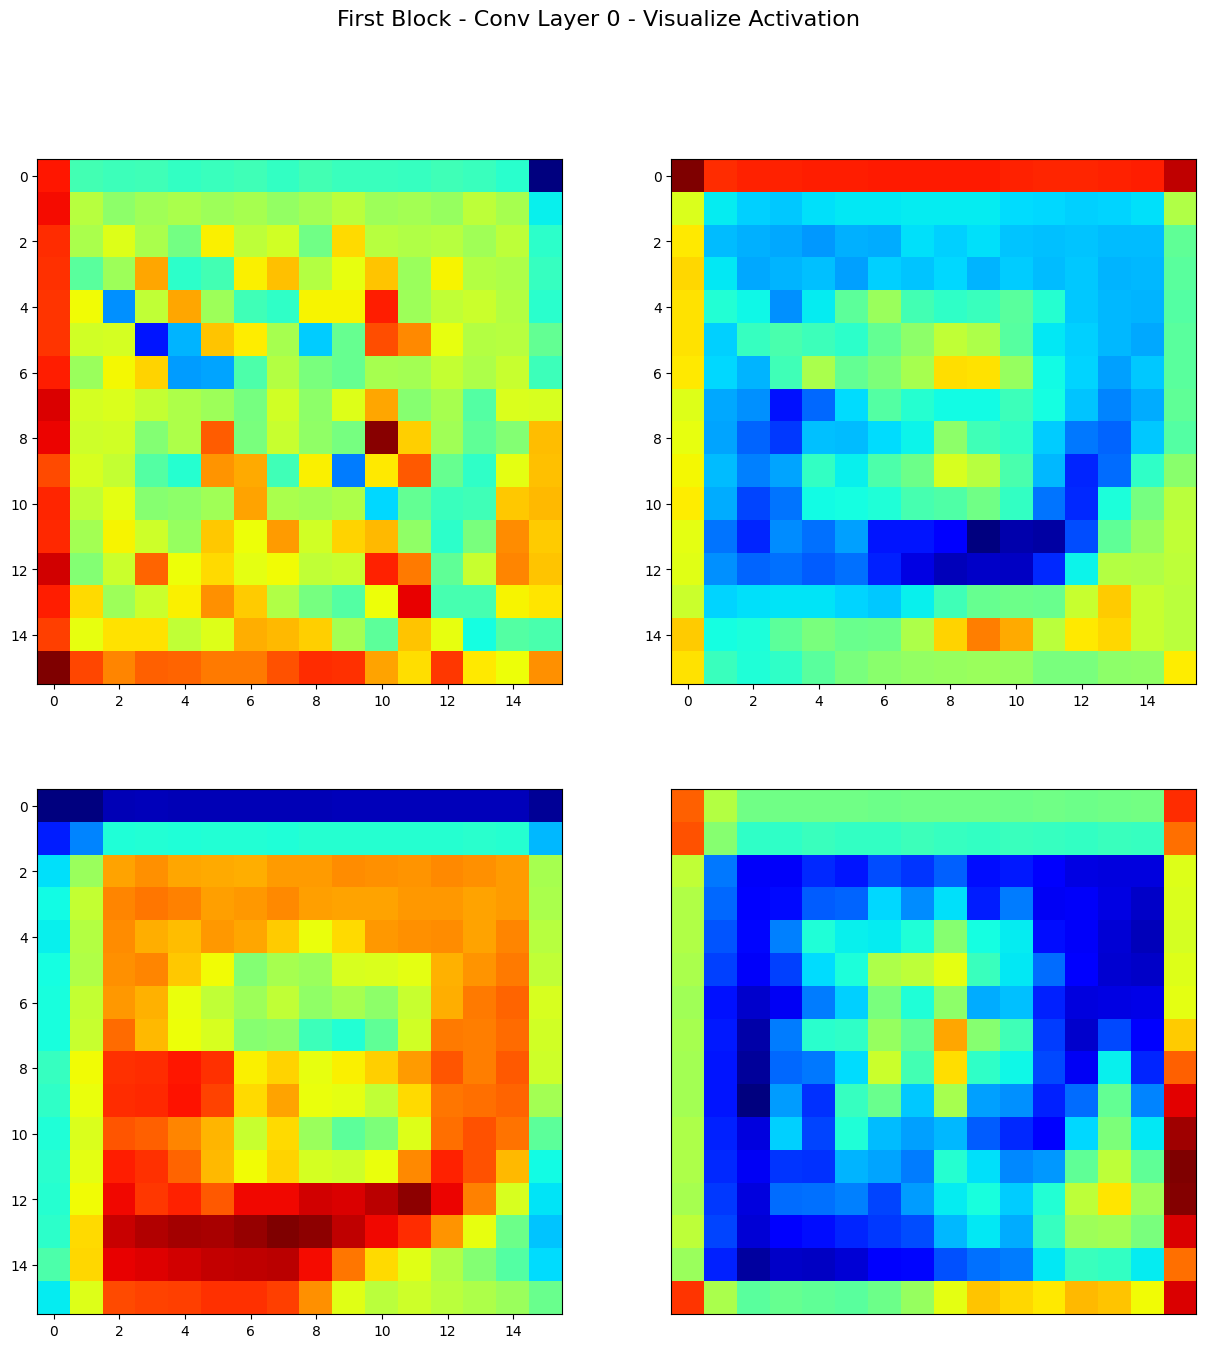

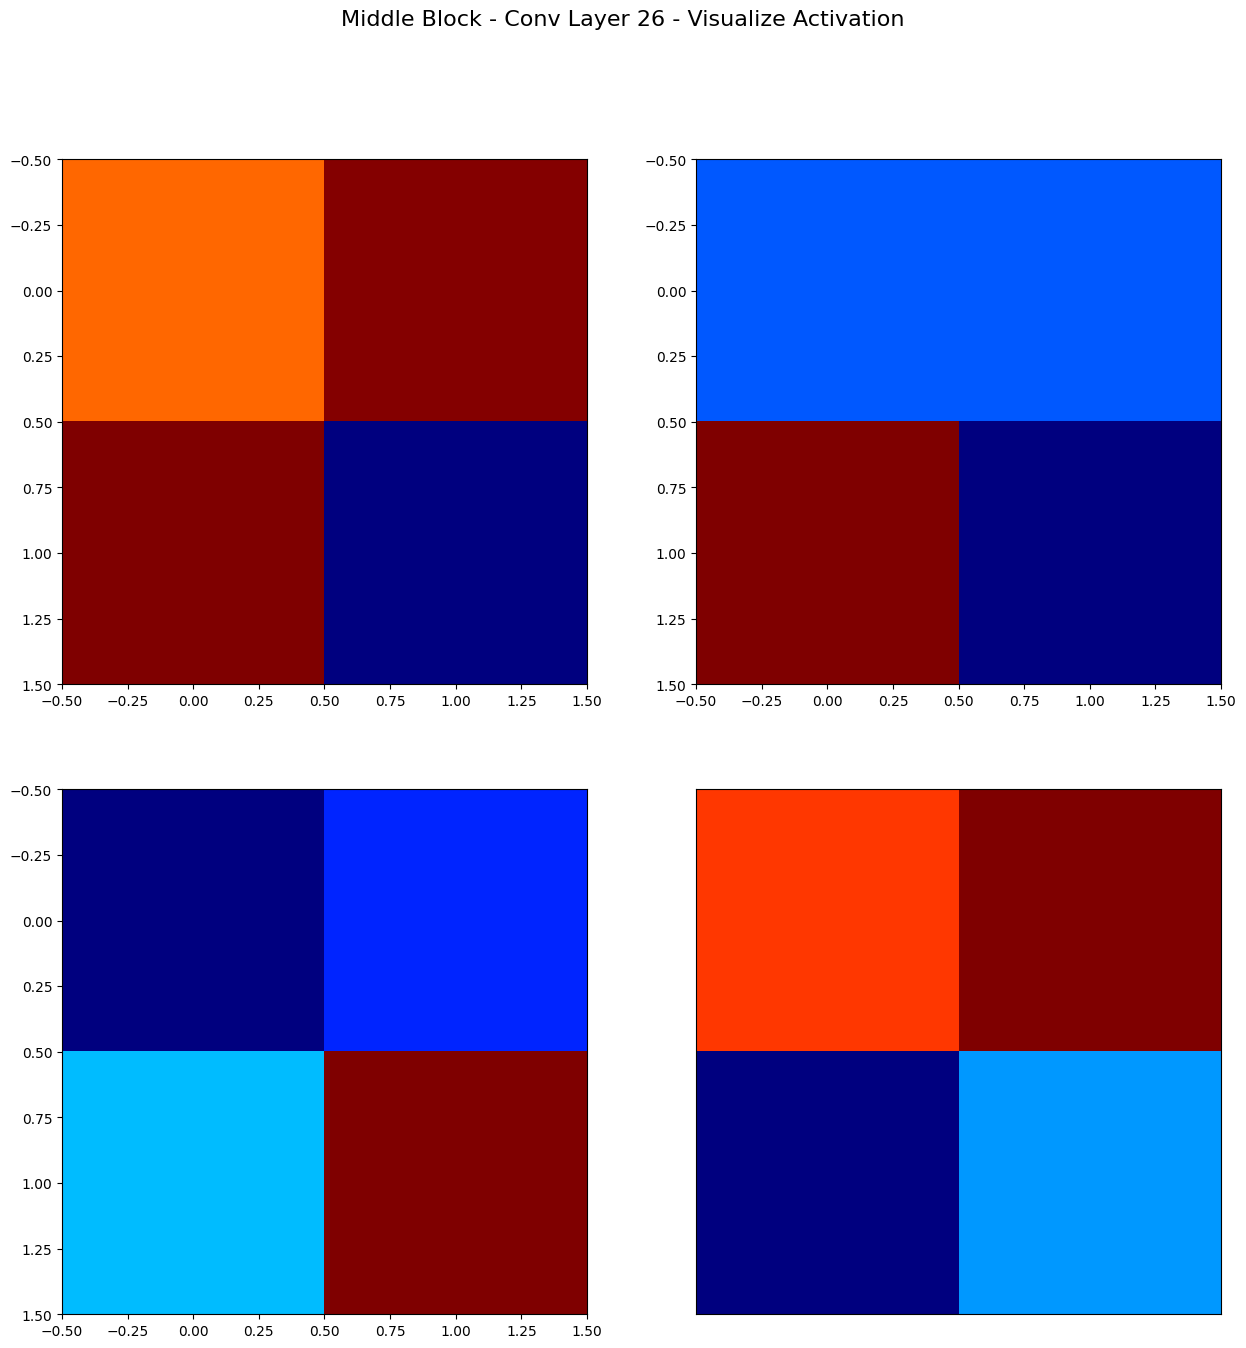

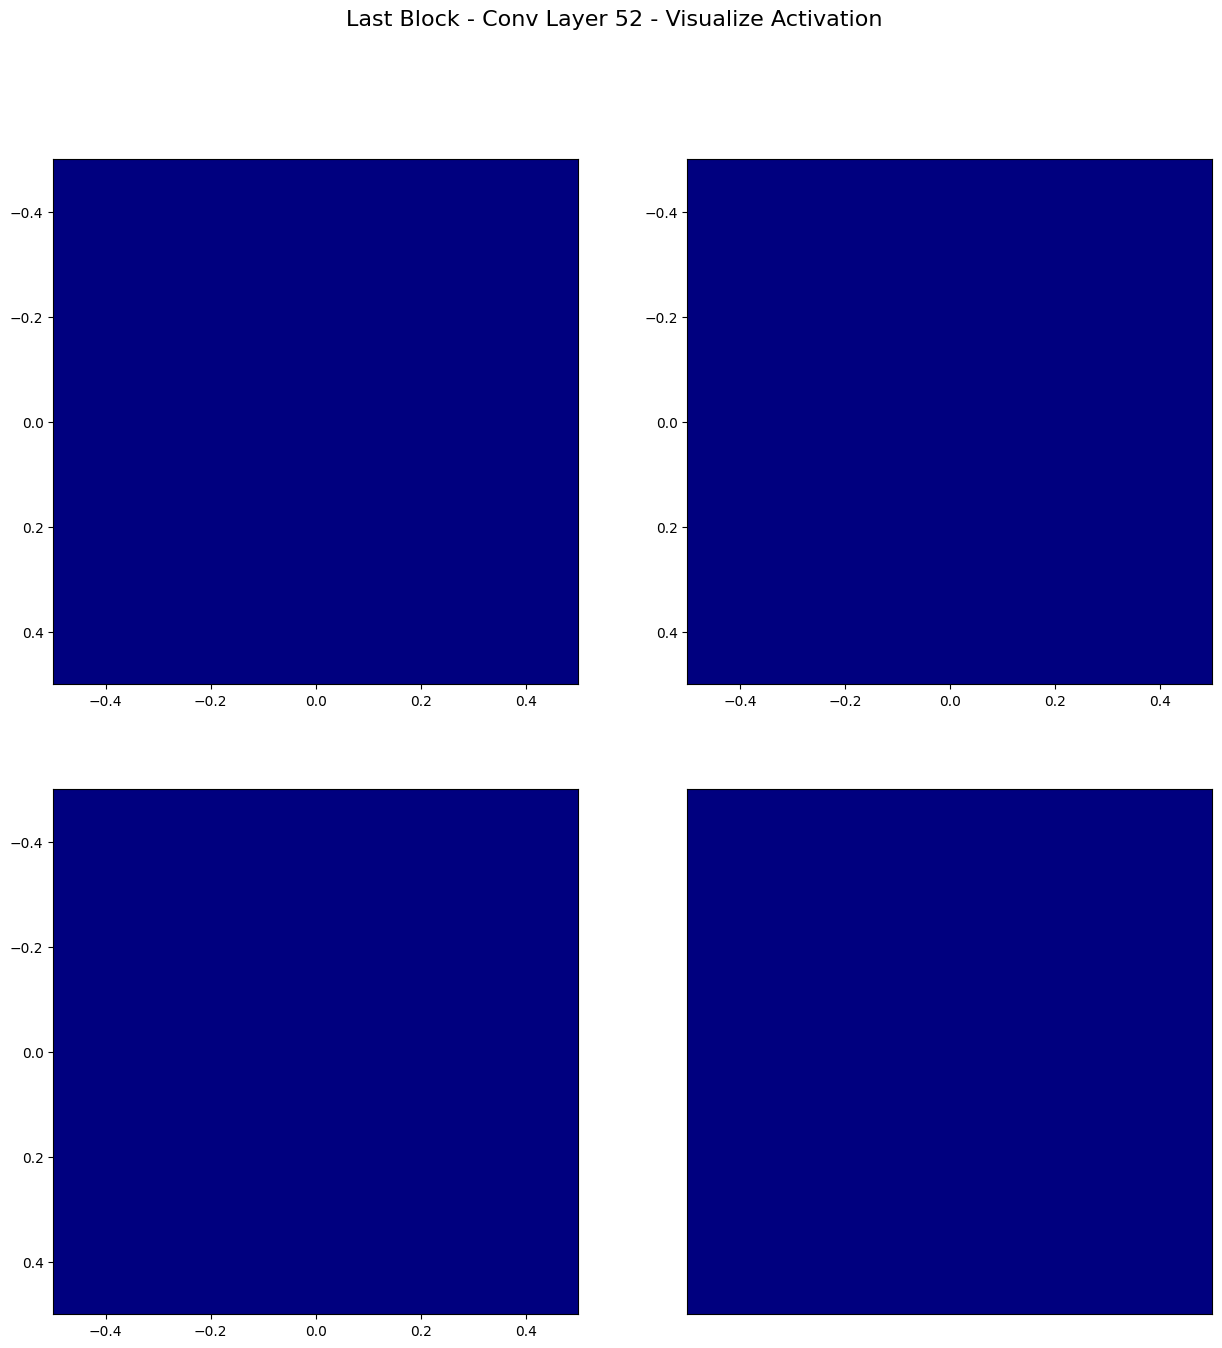

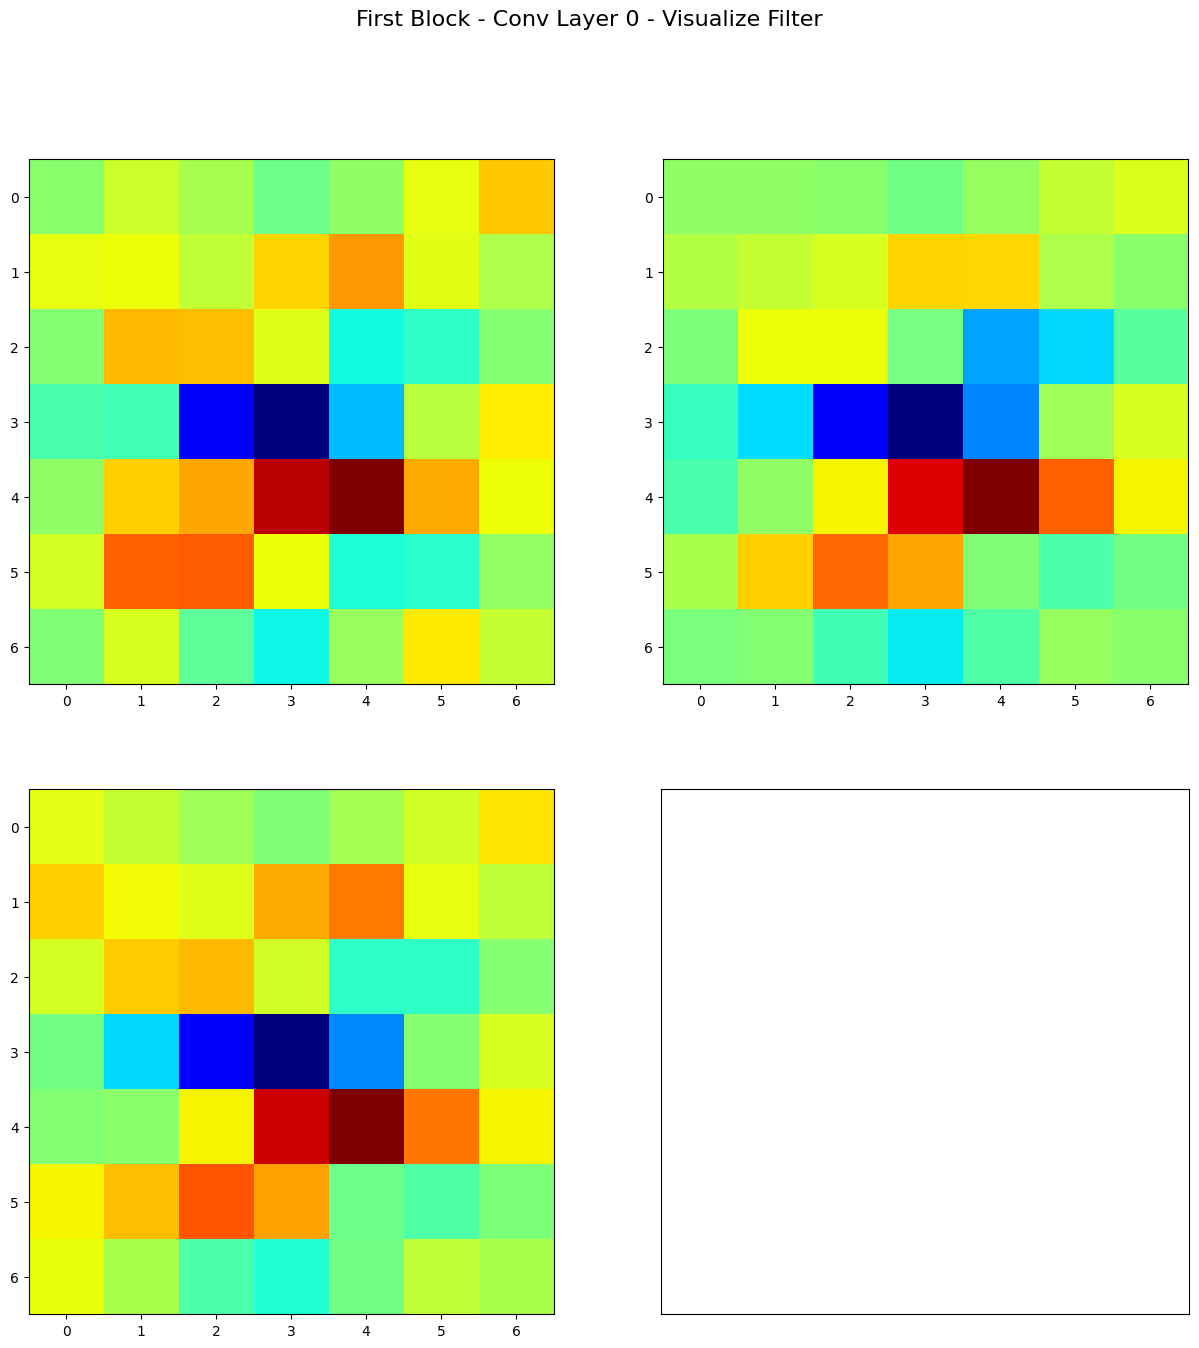

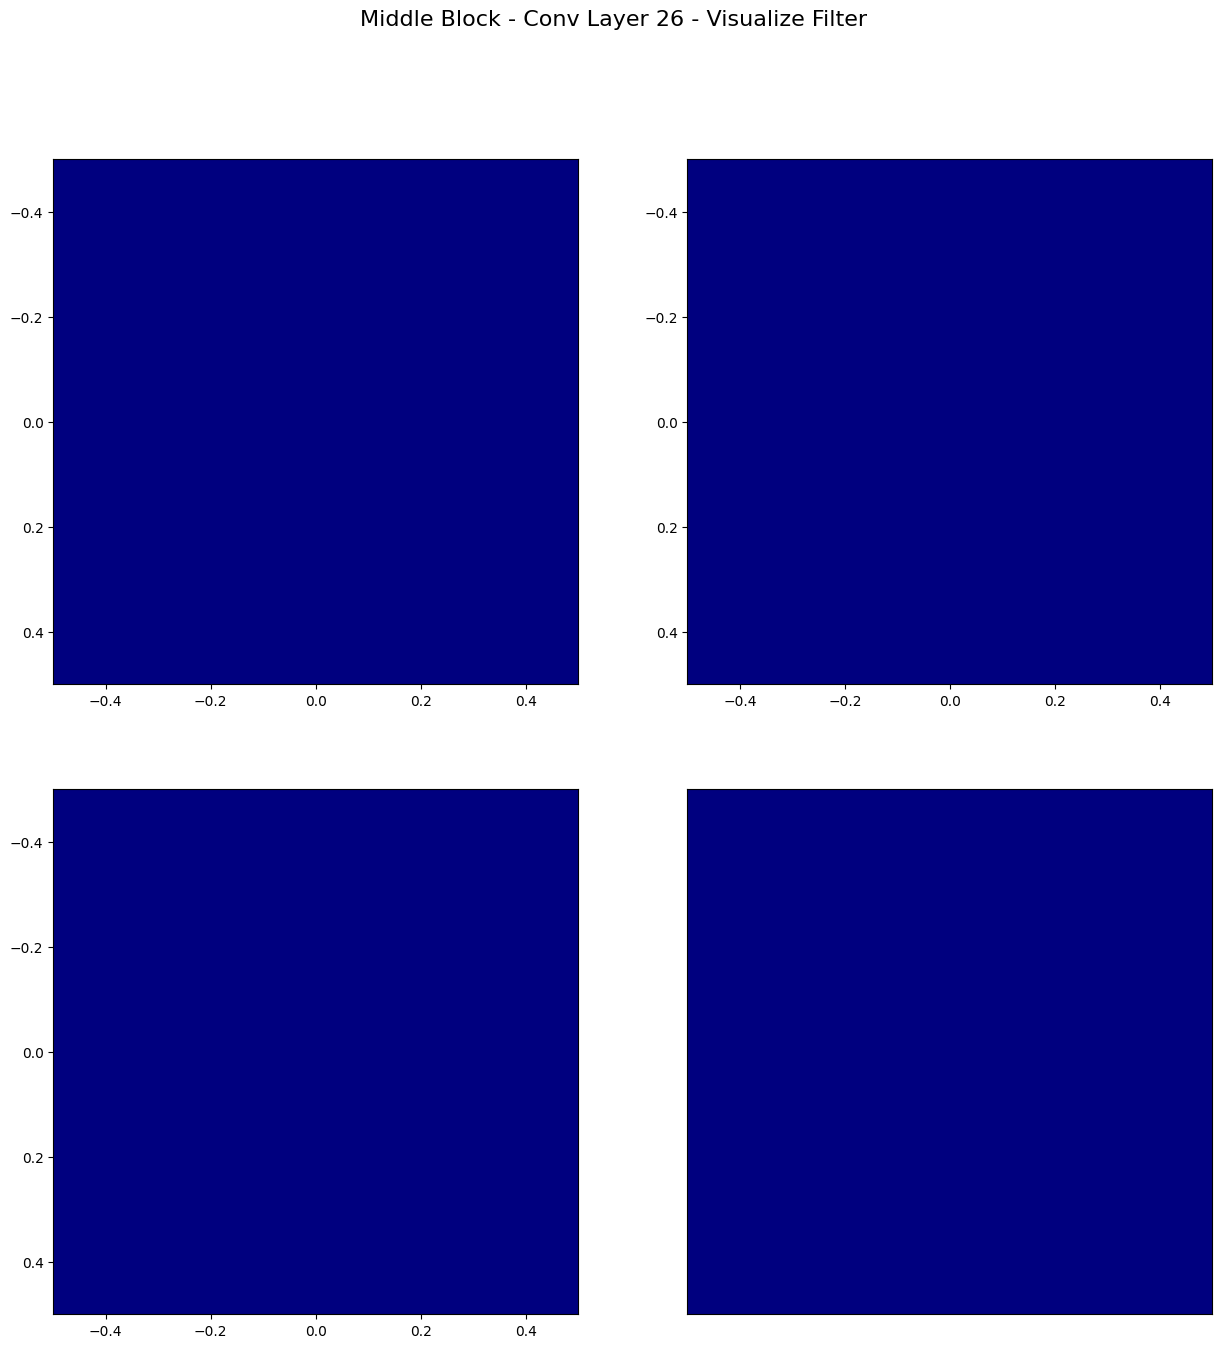

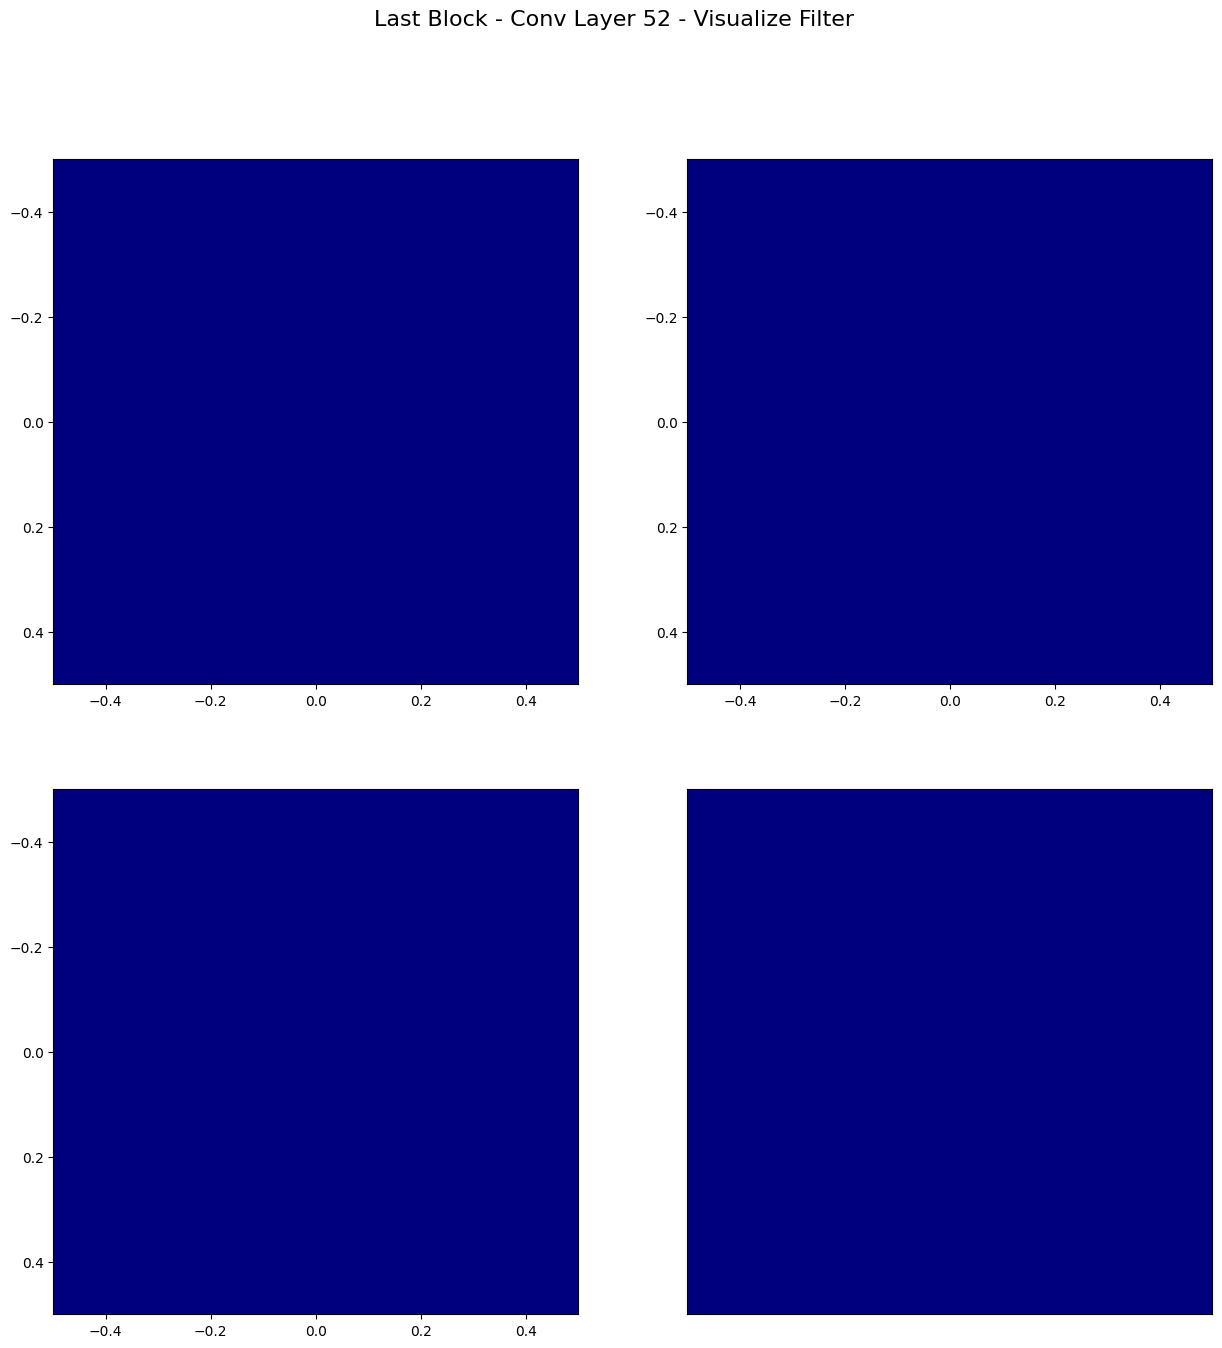

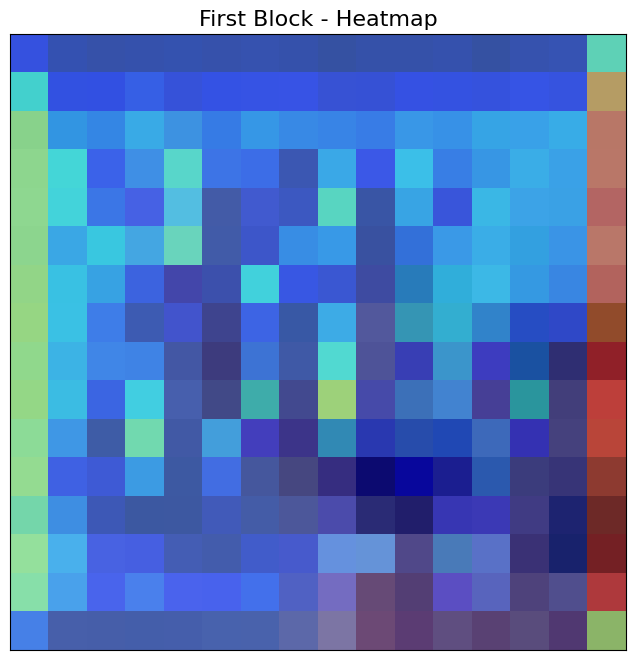

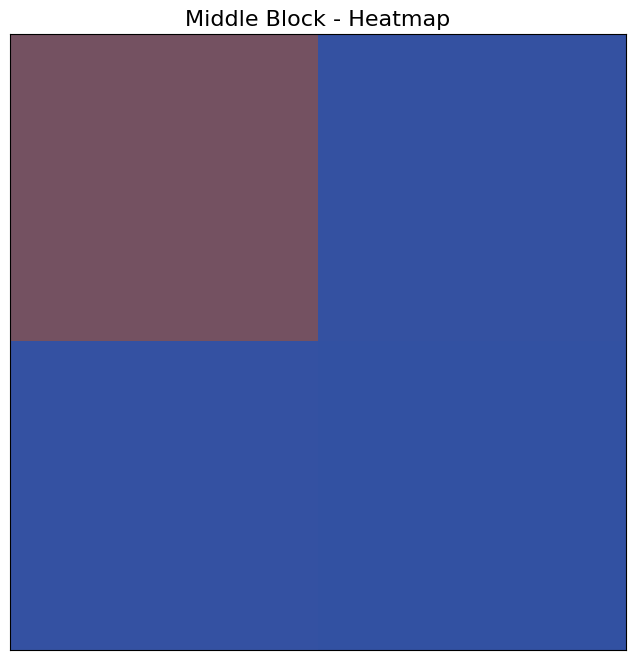

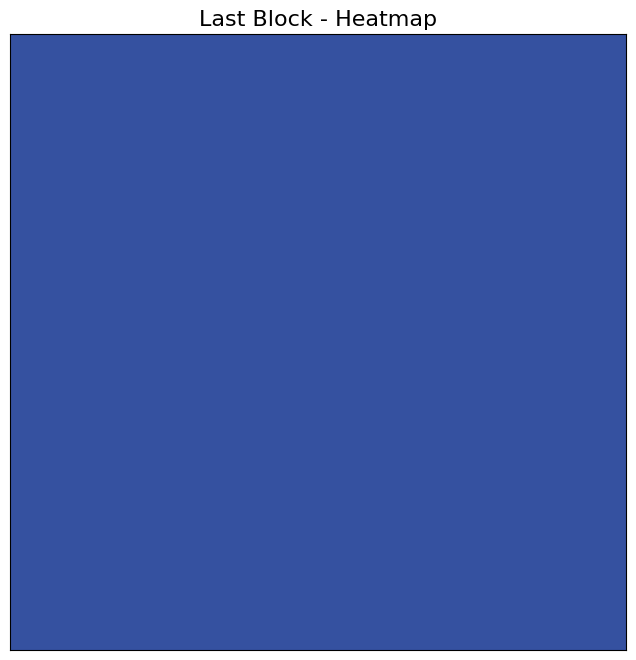

In [ ]:
first_layer = 0
mid_layer = len(conv_layer_index_PS1B)//2
last_layer = len(conv_layer_index_PS1B)-1

visualize_activation(model_PS1B, first_layer, X_train_base, img_index, "First Block")
visualize_activation(model_PS1B, mid_layer, X_train_base, img_index, "Middle Block")
visualize_activation(model_PS1B, last_layer, X_train_base, img_index, "Last Block")

visualize_filter_channels(model_PS1B, first_layer, get_num_filters(model_PS1B, first_layer), get_filter_size(model_PS1B, first_layer), "First Block")
visualize_filter_channels(model_PS1B, mid_layer, get_num_filters(model_PS1B, mid_layer), get_filter_size(model_PS1B, mid_layer), "Middle Block")
visualize_filter_channels(model_PS1B, last_layer, get_num_filters(model_PS1B, last_layer), get_filter_size(model_PS1B, last_layer), "Last Block")

heatmap_first = generate_class_activation_heatmap(model_PS1B, first_layer, X_train_base,  img_index)
heatmap_mid = generate_class_activation_heatmap(model_PS1B, mid_layer, X_train_base, img_index)
heatmap_last = generate_class_activation_heatmap(model_PS1B, last_layer, X_train_base, img_index)
show_heatmap(heatmap_first, X_train_base, img_index, "First Block")
show_heatmap(heatmap_mid, X_train_base, img_index, "Middle Block")
show_heatmap(heatmap_last, X_train_base, img_index, "Last Block")